The deadline for this homework is on **07.06.2022 16:00**. After completing the exercises, you should

1. Download this file into your computer (`File` $\to$ `Download .ipynb`)

2. Download the python files (`.py`) (*if there are any attached to the homework that you need to complete*). 

3. Compress the above files (`.zip` `.rar`) and name the compressed file in the following way *HWx_NameSurname* (for example `HW6_AnunAzganun.zip`)

4. Send the compressed file to this email address `fast.1991.ml@gmail.com` with subject **ML6**

**Note**

* if you do not follow any of the above conditions, your homework will not be graded.

* you do not need to send any dataset files or helper scripts that I provide with your homework (since I already have them).

* you need to write the code for the exercises yourself; you can use ``built-in functions``, ``numpy``, ``pandas``
and ``matplotlib``. Use of other libraries or packages (e.g., scikit-learn) will result in points deducted.

# Kaggle Competition on Mashtots Dataset

In this homework, you do not need to implement any algorithm from scratch, instead you will try to create an algorithm in order to classify Armenian handwritten characters. Do the following steps in order to get started:

* Visit [the page of the competition](https://www.kaggle.com/c/mashtots-dataset/overview) and press "Join Competition"

* You will need to sign in to kaggle if you have an account already and if you don't, you will need to create one

* After signing in you will need to accept the rules of the competition by pressing "I understand and accept" 

* Go to the "Data" tab, read about the dataset and then download the dataset files

* Upload the dataset into Google Drive, so that you can access it from Colab

* At this point you should be able to start your experiments.

# Mounting Google Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/kaggle/Train

/content/drive/MyDrive/kaggle/Train


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Plot style
plt.rcParams['figure.figsize'] = (12.0, 8.0)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Data Processing

If you have noticed, the training data consists of raw images, which means that we need to process those images and construct a dataset (pd.DataFrame or np.array) where each row will be an image vector and the last column will be its corresponding label. Complete the missing parts of the code snippet below in order to construct the dataset.

In [ ]:
os.chdir('/content/drive/MyDrive/kaggle/Train')
root_dir = 'Train'

# getting the list of folder names (label encodings)
sub_folders = os.listdir(root_dir)

# empty list for the data
train = []

# going over the folders
for sub_folder in sub_folders[:39]:
  print('Doing: ',sub_folder)
  images = os.listdir(os.path.join(root_dir, sub_folder))
  
  for image_name in images:
    
    image = np.array(cv2.imread(os.path.join(root_dir, sub_folder,image_name),cv2.IMREAD_GRAYSCALE))
    feature_vector = image.flatten()
    
    train.append([*feature_vector, int(sub_folder)])
  print('Done: ',sub_folder)

# train = pd.DataFrame(train)

In [ ]:
for sub_folder in sub_folders[39:]:
  print('Doing: ',sub_folder)
  # getting the list of image names in each folder
  images = os.listdir(os.path.join(root_dir, sub_folder))

  for image_name in images:

    image = np.array(cv2.imread(os.path.join(root_dir, sub_folder,image_name),cv2.IMREAD_GRAYSCALE))
    feature_vector = image.flatten()
  
    train.append([*feature_vector, int(sub_folder)])
  print('Done: ',sub_folder)

train = pd.DataFrame(train)

In [ ]:
train.to_csv('/content/drive/MyDrive/kaggle')

Have a look the resulting data data

It's a good idea to save the processed dataset in your Drive, so that you don't need go through the above process every time.

## Constructing a Validation set

Since you do not have a separate labeled test data for validation, you should construct (put aside) your own validation set from the whole training data, in order to choose good models.
You are free to decide how much data you will use for what purposes, but remember to use data wisely.

In [ ]:
os.chdir('/content/drive/MyDrive/kaggle')
data = pd.read_csv('dataT.csv')

y = data.pop('4096')
X_train,X_val,y_train,y_val = train_test_split(data.values, y.values, test_size = 0.1, random_state = 42)
del data

In [ ]:
n_estimators = [20,50,100] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [20,40,50] # maximum number of levels allowed in each decision tree
min_samples_split = [100,300] # minimum sample number to split a node
# min_samples_leaf = [1,] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

# 'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(X_train, y_train)
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

NameError: ignored

In [ ]:
params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [40, 200, 500],
    'n_estimators': [100, 200, 300, 600]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_val, y_val)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [ ]:
model = RandomForestClassifier(max_depth=100,min_samples_split=50)
model.fit(X_train,y_train)
pred = model.predict(X_val)
accuracy_score(y_val,pred)

0.2873251498715387

In [ ]:
save1 = pred.copy()

## Modelling

Perform experiments with different algorithms that we have learned and choose a good algorithm for final evaluation.

In [ ]:
import numpy as np
!pip install visualkeras
import visualkeras as vk # 
import pandas as pd
import tensorflow as tf
import seaborn as sn
import os
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# os.chdir('/content/drive/MyDrive/kaggle')
# data = pd.read_csv('dataT.csv')

X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size = 0.15, random_state = 42)

X_train = X_train.values
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values

X_train = X_train.reshape((X_train.shape[0],64,64,1))
X_val = X_val.reshape((X_val.shape[0],64,64,1))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=78)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=78)


In [ ]:
model = Sequential()

model.add(Conv2D(16, (5, 5), input_shape=(64, 64, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(16, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(78, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 16)        416       
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 16)        6416      
                                                                 
 batch_normalization_1 (Batc  (None, 56, 56, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 16)       0         
 )                                                               
                                                        

In [ ]:
# vk.layered_view(model)

In [ ]:
best_loss_checkpoint = ModelCheckpoint(
    filepath="/content/drive/MyDrive//kaggle/check",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="/content/drive/MyDrive//kaggle/check",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val), 
    epochs=12, 
    batch_size=80, 
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/12
745/745 [==============================] - 26s 17ms/step - loss: 2.1890 - accuracy: 0.4323 - val_loss: 1.2301 - val_accuracy: 0.6572
Epoch 2/12
745/745 [==============================] - 11s 14ms/step - loss: 0.9713 - accuracy: 0.7200 - val_loss: 0.9712 - val_accuracy: 0.7330
Epoch 3/12
745/745 [==============================] - 10s 13ms/step - loss: 0.6836 - accuracy: 0.7965 - val_loss: 0.8421 - val_accuracy: 0.7642
Epoch 4/12
745/745 [==============================] - 10s 13ms/step - loss: 0.5036 - accuracy: 0.8436 - val_loss: 0.8205 - val_accuracy: 0.7805
Epoch 5/12
745/745 [==============================] - 10s 14ms/step - loss: 0.3938 - accuracy: 0.8737 - val_loss: 0.8889 - val_accuracy: 0.7736
Epoch 6/12
745/745 [==============================] - 11s 15ms/step - loss: 0.3161 - accuracy: 0.8972 - val_loss: 0.8973 - val_accuracy: 0.7861
Epoch 7/12
745/745 [==============================] - 10s 14ms/step - loss: 0.2652 - accuracy: 0.9125 - val_loss: 0.9291 - val_accuracy:

In [ ]:
# print(y_val[:10])
# print(y_pred[:10])

## Generating predictions

At this stage you should have good performing model that you want to test on kaggle.

In [ ]:
# del data
del X_train
del X_val
del y_train
del y_val

In [ ]:
os.chdir('/content/drive/MyDrive/kaggle')

In [ ]:
test = pd.read_csv('new_test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,4,0,0,0,0,0,0,0,...,0,0,3,0,0,2,0,1,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = test.values
test = test.reshape((test.shape[0],64,64,1))

In [ ]:
a = test[0].reshape((64,64))

In [ ]:
a = predictions[0]

In [ ]:
np.argmax(a)

67

In [ ]:
np.argmax(predictions[6])

13

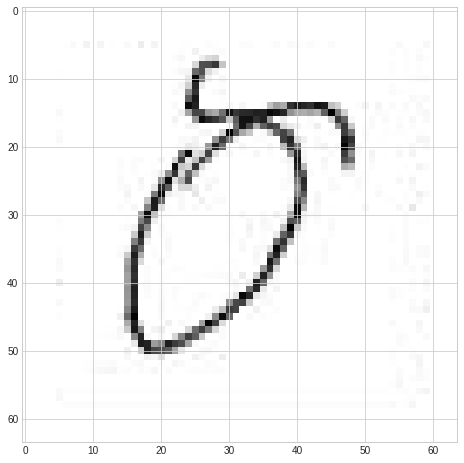

In [ ]:
plt.imshow(test[6].reshape((64,64)))

(50000, 78)

In [ ]:
submission_df

,Id,Category
0,1,62
1,2,25
2,3,36
3,4,37
4,5,36
...,...,...
49995,49996,35
49996,49997,36
49997,49998,36
49998,49999,33


In [1]:
a = '''63 29 18 29 18 18 13 18  4 18 70 67 19 62 20 18 31 51 18 45 18 54 58 72
  6 71  4 18 18 18 18 18 44 25 68 18 20 12 18 38 75  6 40 63 32 18 18 60
 18 18 26 18 55  0 45 18 29 18 18 18 61 24 29 33 36 66 18 55  4  6 70 18
 12 18 18 18  4 59 62 67 22 38 49 60 38 18 55 48 18 18 36 29 48 42 65 60
 38 22 26 18 18  0 24 63 32 63 19 10 12 32 12 18 67 67 18  6 18 67 12  4
 18 65 27 18 29  6 18 67 18 19  6  5  6 55 67 18 18 62 12 61 51 32  6 12
 24 58  5 10 75 22 38 66  0 38 28  5 26 31 18 44 44 19 31  8 38 11 43 22
 75 35 18 48 18 18 56 29 64 18 38  5 39 18  5  5 18  4 18 18 49 59 67 18
  1 20 39 62 18 24 18 18 60 18 72 18 28 38 39 18 18 68  6 73  4 63 10 38
 18 61 50 24 60 52 50 45 45 18 70 18 63 75 18 44 18 18 18 38 61  7 50 18
 18 40  0 63 67 68 18 18 40  2 39 22 68 37 20 67  6 11 60 29 74 15 54 18
  9 18  9 45 33 18 18 67  7 31 18 71 36 64 31 18 18 67 57  9 18 50 38 59
  6 68  7 26 38 18 38 48 39 72 12 31 18 50 18 38 18 39 18 18 18 18  3 50
 36  6 33  6 43  6 29 12 33 18 24 29 15 29 18 40 18 67 18 70 33  2 37 18
  7 18 38 18 38 24  4 71 57 18 42 18  5 60  4 18 24 59 74 15  5 18 18 18
  6 18 29 63 70 19 32  7 60 76 18 67  6 49 40 62 18 38 31 40 28 18 22 69
  6 61 18 18 18 39 28 62 36 18 56  8 65 55 18 18 18 63 57 16 18 71 57 38
 48 14 18  4  4 18 63 18 18 22 22 31 38 75 18 50 60 18 53 18 35 18 59 57
 61  3  7 77 14  6  5 18 24 67 38 33 60 18 45  6  4  7 28 18 24 35 36 29
 18  6 38 46  5  6  4 11 42 54 38  9 26 77 71 24 54 59 18 18 18 62 14 63
 29  1 38 66 12 18  6  6 70 18 18 63 20 18 60 18 18 38 18  0 18 18 11 18
  6 18 62  8 64 41 19 73  2 31  7 63 42 36 18  4 55 26 28 18 62 40 50  6
 24 11  6 18 19 70 51 22 38 19 34 18 32 18 55  6 18 52 35 25 59 63 57  5
 24  6 63 34  0 18 18 18 67 18 18 50 58 34 27 18 18 18 51 18 45 65 18 10
 18 70 53 18 18 14  5 39 26 38 18 32 11 18 14 18 32 18 27  0 42 17 29 18
 18  7 61 18 18  6 38 18 17 62 18 35  7 38 24 70 52 51 47 22 62 18 18 24
 16  3 18 33  5 38 18 18 27 37 22 18  7 15 29 32 24 18 77 28  5 18 18 70
  0 24  6 72 18  3 34 31 62 18 31 18 24 10 46 18 67 18  4 18  6  5 46 24
 54  1  6 52 14 65 18 18 53 18 67 18 67 63 18 77 15 18 42  4 38 35 53 31
  6 40 38 51 18 58 38 18  7 49 62 71 63  5 12  6 42 18 65  6 12 18 18 25
  2 61 29 24 15 44 63  5  6  5 66 22  6 55 51 18 67 32 63 52 26 18  5 76
 52  5 18 18 52 16 22 66  6  4 46 65 38 29 18 24 67 29 64 49 48 32 18 28
 49 33 29 28 75 63 54 18 18 72 64  5 65  6 63 18 60 47 60 63 46 18 18 38
 15 55 75 29 62 32 54  6  6 39 52  6 63 67 18 24 24 38 18 38 63 38 61 18
 67 18  5 68 57 69 18 18 18 31  6 11 18 18 29 18 71 38 18 18  4 18 62 67
 27 22 24  4 18  9  4 12 37 61  6 18 18 70 18 18 63  5 29 23  4 18 18  5
 44 18 18 19 57 18 63 44 32 18  3 18  6 24 18  4 63  9  4 62 35 26 21 63
 67 53 25 36  5 38 40 18 38 15 38 42 51 22 57 18 61 64 15  5 68 26 71 22
 43 38 47 38 18  6 76 52 28 38 62 18 22 18 22 16 45 45 26 27 46 54 52  6
  7 67 54 65 62 38 51 19 18 22 24 16 18 66 18  6 18 55  7 18  6 63 26 28
 62 67 70  9 38 48 29 63 18 18 18 31 48  4 38  5 32  6 12 31 18 13 63 39
 18 62 13 18 37 27  2  7 68 68 62 33 34 55 36 14 39 63 43 18 18 53 18 27
  6 18 52 38 74 33 61 37 38 18 22  4 20 18 18 11 25  5 56 49 11 18 62 18
 63 68 63 45 66 18 24 29 60 22 12  6 64 18 18  6 34 59 24 61 15  6  5 62
 67 31 38  5 18 67 18 34 62 34 17  2 52 75 30 37 17 67 18 18 38 50 29 67
 28 33 44 24 18 18  8 58 18 18 10 18 18 18 18  3 18 62 12  5 18 47 44 63
  9 57  6  4  0 30 18 18 47 31 68 19 22 54 18 63 30 39 24 43 18 67 18 43
 49 18 18 18 33 18 18  6 54 40 62 18 18 41 38 18  4  3 62 38 50 32  6 12
 18  4 48 18 18 39 11 18 18 38 44 24 40 29  4 63 18 23 63 24 18 20 18 18
  9  4 31 19 38 32 41 45  9 13 18  5 18 64 64 55 57 24  5 26 18 24 36 45
 32  6 18 68 29 70  5  5 65 15 34 18 10 40 62  5 44  6 18 18 40  6 64 59
 67 22 76  4 70 18  0  7 33  3 18 18 66 18 48 62 31 38 12 51 77 61 18 11
 60  6  6 75 18  6 51  2 62  0 39 18 18 55 18 18 63 18  6 46 22 18 21 18
 18 55 18 71 18  5 67 33 68 59 32 38  4 12 18 18 31 51 32 18 18 26 18 33
 18 37 55 75 63 22 72 65 63 76 59 18 18 53 18 52 64 18 75 18 63 24 38 61
 24  0 23 15 50 46 69 18 24 54 18 63  0 15 18  5 57 29 18 18  5 65 51 65
 58 46  4 18 18  6 34 63  6 36 50 56 63 11 39 18 72 68 18 24 18 63 59 39
 75  5 24 18  6 63  2 18 18  4 25 19 55 63 18 65 43 18 38 38 38 68 18 18
  0 67 18 68 43 45 25  0 18 70  5  8 18  6 67 34 37 49 18 18 18 63 57 30
 51 17 18 55 61 45 38  6 15 18 18  5 18 18 37 31 18 18 18 63 31 18 25 48
 18 68 64 20 18 11 38 53  4 18 70 18 15 15 35 52 71  6 18 18 18  6 18 18
  6 60  6 14 18 18 33 25 39 18 68 18 11 63  2 32 66 18 67 64  5 26 72 66
 24 27  4 18 75 33 27 39 18 53 38  6  5  0 62 11 11 62 39 58  9 10 12 18
  7  4  6 63 42 51 18 18 38 33 55 63 39 33 38  4 18 18 22 38  0 18  6 18
 24 24  6  4 18 65 18  4 59 75 29 10 28 23 12 60  5 68  3 18  5 20 18 23
 12 18 59 18 67  7 66  9 67 70 74 64  4 54 18 54 24 18 18  6 31 17 18 18
 20 67 18 52 18 11 18 20 65 24 37 63  6 18 49 18 26  6 18 18 68 62 68 48
 18 27 18 18 18 29 18  6 18  6 15 18 18  7 75 59 45 18 55 63 63 10  6 47
 63 60 16 63 18  2 35 26 45 38 40 70 43 18 50 69 18 24  5  4 37 56 37  1
 18 18 18 18  6  6 38 32  6 42  6 18 18  6 60 66 77 53  4 45  6 18 18 18
 18 18 59 69 26 75 38 57 52 50 26 65 18 12 18 18 52 29 18 67 18 17 65 56
 18 63  6  1 27 63 18 18 67 18 18  5 38 18 18 61 18 45 31 64 37 28 22 19
 64  5 18 25 72 38 16 68 15  4 23 53 60 18  6 18 65  9 18 18 38 12 20 18
 63  0 59 27 20  6 63 38 18 54 15 18  6 24 31 18 76 44  7 59 22 71 45  6
 39 16 17 18  5  6 18 18  3 27 64 25 63 52 18 18 38 18 22 18 18 38 51 18
 66 66 40 65 22 18 22 66 39 49 46 24 18 26 76 18 18 22  4 57 38 29 18 31
 24 18 41 18 70 18 68 24 45 53 37 69 18 18 18 18  5  5 18 38 39 18 59 34
 57 63 43 18 12 38  1 50 27 18  1 50 18 56  6 19  6 70  3 18 18  6 67 58
 19 59 67 18  4 19 59 63 18 72 62 75 18 53 18 70 12  6 75 39 12 18 24 15
 18 28 53 11 67 12 18 38 18 68 20 18 18 18 31 45 59 18 18 18  3 16 22 18
  4 18  6 10 18  5 32 18 18  5 40 34 75 58 18 68 18 63 18 59 76 60 38 18
  0 36 29 18 67 68 18 31 45  6 38  6 66 29  6 58 62 18 18 63 10 56 18 54
  6 41 42  6 67 18 30 56 67 30 18  4 18 18 18 63 52 61 18 18 18  5 31 18
 13  6 18 60 34 31 21 18 27 37 24 31 64  5 18 62 67 68 63 38  6 63 41 18
  1 55 43 20  5 18 48 18 28 39 18 28 20  6 29 18  0 72 33 43 34 27 12 24
 18 11 38 67 70  6 64 44 18 18 56 49  6 18 18 22 18  6 18 54 18 76 65 24
 68  6 12 37 18 42 18 29 38 68 18 39 14 18 18 48 18 18  6 12 63  7 45 29
 26 22 18  4 64 19  6  6 50 24 15 57 31 51 18 18 18 18 18 28 68 18  4 74
 38 48 18 18  5 18 59 18 34 59 18 38 59  2 75 61 18 48 18 22 62 18 11 77
 75 56 63 54 18 29 18 27 62  3 18 23 54 68 63 18 24  6  0  6 18 45 40 11
 18 11  4 56 38 18 18  6  2 39 51 18 38 24 31 12 18 24 36 63 18 59 13 39
 49 18 18 57  5 18 18 18 35  0 32  4 18  3 24 14 12 18 26 26 18 67 43 59
 27 21 18 18  6 18 18 18 18 33 18 22  4 15 18 45 40  3 18  5  5 18 18 18
 70 36  6 38 32 28  5 18 18 18 58 18  6 67 18 50 22  6  6 22 67 46 44 46
 66 12 26 18 18 77  1 23 18  6 18 18 49 67 24 65  6  6 18 73 71 24 18 18
 38  6 22 24 46 51  6  6  4 67 18 13  5 39 36 13 18 67 71 18 54  6 60 27
 18 64  6 18 75 43  5 18 18 52 24 18 59  6 38 22 63 62  6  6 24 55 37 18
 55 22 22  5 69  7 29 42 18 31 61  6 26 18  6 42  6 12 29 29 18 18 20 18
 27 18 70  4  6  6 18 18 22 11 46 33 38 18 17 39 18 15 18 18 18 24 71  4
 18 18 20  4 37 59 28 62 29 54  5 18 18 71 59 18 61 55  5 59  0 48 24  6
  4 18 62  5 15 58 18 29 18 18 64 62 18 38 18 18 18 68 18 18 69 18 51 38
 18 18 68  4 63 18 43 20 18 46 18 61 61 26 25 19 18 57 48  5 29 38 77 18
 55 18 77  6 18 77 66 16 18 62 18 18 43 61 18 38 18 18 18  0 20 14 20 73
 56 71 24  7  5 19  6 26  6  6 18 39  5 18  4 22 11 22 24 57 44 18  7 47
 65 33 18  5 18 18  0 18 18 18  7 18  5 18 33 53 18 18 72 38 65 26 59 23
 63 33 38 18 18 14 41 38 18 18 65 50 18 63 33  5 18 75  0 18 16 18 18 62
 63  0 63 15 18  5  6 24  4 69 18 64  6 26 62 18 18 12 18 37 18  5 38 56
 17 52 58 14 37 11 15 24 39 31 64 18 18 16 65  6 67 60 28 72  0 38 18 67
 37  5 54 29 18 25 18  6 52 63 38 29 12 18 59 18  5 18 58 73 55 29  6 18
 63 52 18 56 18 26 18 20 56 52 17 18 18 13 45 28 34 38 24 38 39 55 46 70
 18 18 50  5 18 67 37  6 32 48 28 10 47  5 58 67 55 14 18 18 18 43  1  0
 18 18  8 18  4 18 67 43 63 64  6 18 18 18 20 18 61  6 68 48 18 22 38 38
 12 63  9 18 15 29 34 75 18 18 24 64 18 18 18 10 77 67  0 38 15 39 18 19
  5 38  6 51 18 31 43 15 38 31  6 31 18 18  6 18 65 73 36 57 21  4  6 18
 63  9 63  5 26 18 38 53 55 59  1 55 46 18 63 31 18 18 63 38 18 18 34 38
  6 18 15 25 38 28 29 32 62 75 38 52  4 29 40 58 14 39 44 18 67 67  5 68
 63 18 18 32 50 58 44 24 18 63 18 38 15  4 45 24 64 29 77 38 63 29 40 44
 18 18 44 63 38 29 68 33 50 12 63  6 63 70  5 32 18  6 18 70 39 45 18 62
 67  5  9 38 48 39 22 18  3 58  4 61 18 71 18 18 57 77 12 37 52  6 18 67
 18 18 18 18 45 18 62 18 66 50 68 18 17 35 62 28 57 18 44 59 18 18 42 38
  4 62 30 18 18 38 54 68 18 31 18 63 18 63 18 50 18 76 18 52 38 18 18 31
  5  6 33 63  0 22  4 39 76 15 18  5 18 18 18  6 48 49 18  4 38 54  4 25
 43 48 37 18 18  6  1 31 59 10 18 18 18 11 18 22 77 26 29  4 36  6 34 13
 53 32 63 54 38 18  6 45 68 18  2 18  1  0 77 22 48  7 38 49 54  9 34 64
  4 34 56  6 59 67  5 49  4 43 36 18 52 14  6  3 19 76 39 18 62 29 18 18
 18  7 18 27 18 17 31 75 39 26  6 18 18  4 18  6 63 58 48 18 24 15 63 18
 18 57  6  5 25 18  6 28 22 40 18  6 39 31 18 30  6 50  7 18 41 70 60 18
 28 76 51 75  6 37 12 52 18  6 26 18 64 18 24 18 18 40  5 18 24 43 75 60
 18  6 18 45 67  1 29 16 18  6 29 35 50 45 62 32 60 67 13 67 31 18  5 25
 15  7 18  6 52 56 76 61 25 22  0 68 18 36  5 18 54 30 38 18 12 38 67 63
 51  4 18 37 21  6  6 31 62 44 38  5 18  5  4 38 70 26  6 38 67 70 24 61
 63 18 52  6 29 18 28 18 70 18 12 67 18 72  2  5 26 18  6 63 18  6 24  9
 38 38 62  7  6 18 18 18 18 50 58 24  4 62 28  6 38  7 67 18 38  6 75 38
 55 26 18  4  4 63 43 59 28 29 24 62  7 38 71 67 58  8  6 62  5 18 38 18
 63 46  0  5 49  3 18 10 34 31 18 13 57 73 39 37 67 14 18 64 61 38 59 69
 31 18 67 16 33  5 18 18 49 22 18 18 38 18 55 18 49 45 10 45 22 18 62  6
 12 31 29 12 77 18 51 18 31  6 23 36 59 18 28  6 18 18 42  6 24  6 18 53
 17 68  5 62 63 37 49  6 18 31 24 49 29 70 50 72 64 18  7 18 18 43 62 27
 47 48 22  4 18 34 18 18 70 38 44  6 29 70 16 27 18 21 15  5 11 39  6 17
 44 33 50 18 10 63 38 19 70 32 18 67 24 37 29  0 18 62 48 67 57  6 18 49
 18 70 55  1  4 38 63 18  0 43 18 38  4 18  4 18 43 67 63 18 39 22 46 55
 18 22 22 29 50 17 67 49 39 29 38  6 70  5 38 31 19 26 18 18 24 76 36 14
  6 76  1 18 35 19 58  6 18 70 13  6 15 63 54 18 63  6 18 18  0 64 18 38
 18 18 29 33 22 18  1 11 29 18  6  5 18 18 18 71 27 18 23 18 29 32 41 63
  2 17 68 63  7 18 29 26 18 63 18 18 68 18 31  4 54  5 67 10  5 18 38 47
 18 19 36 18 18 30 62 74 50 73 18  6 39  4 19 18 18 33 18 22 63 38 18 18
 20 18 18 70 54 18 58 18 39 55 75 18 24 42 18 38 12 18 67 75 29 24 18 18
  3 24 63 59 50 32 18 29 11 18 18 75 71 18  2 46 62  5 18 18  5  4  4 18
 52 18 18 19 61 18  4 40 37 37 67 18 64  6 19  3 32 15 36 33 18 58 36  4
 18 18 18  9 70  5 70 55 18 34 18 67 58 62 18 14 18 75 18 68 67  6 18 18
 18 67 27 63  3 18 64  4  6 15 18 18 67  6  0 51 30 18 61 23  5 67 54 76
 38  5 20  3 29 18 35 44  7 20 18 18 63  5 34 36 18 18 17 18 18 19 24 18
  6 18 18 18  6  6 67 18 33 66  6 26  6 65 26 29 18 36  6 18 18 38 18 18
 18 31 38 29 49 33 18 37  4 18 18 29  5 24 49 39 25  6 18 67 18 45 16 42
 44 51 18  0 71  4 63 18 26  4 18 36  6 59 38 63 38  6 58 18 38 28  6 26
 18 53  6 18 18 18 58 20 18  6 24 50 18 22 18 20  5  6 34 18  5 50 17 24
  6 29 44 22 59 54 27 18 52  4 24  9 64 74 27 18 18 18  4  6 19 18  4 63
 59 18 39 18 18  5 18 18 18  5 68 18 18 18 22 12 38 54 18 53 15 22  5 15
 61 61 75 70 39 38 10 64 15 24 18 37 18  6  2 54 76 54 29 28 18 66 55 47
 29 18 31 11 64 18  7 62 67  7 18 18 29 67 22 38 15 24 76  7  6 18 43 20
 32 65 63 26 23 62 29 42 12 15 59 18 55 39  5 76 18 18 63 74 18 70 29 32
 37 54 67 18 68  5  4 18 19  4 29  6 18 67 18 18 18 16 30 46 43 11 38 18
 67 27 49 70 27 24 18 51 62 18 18 18 31 18 29 38 29 18 18 20 18 11 63  0
 38 38 18 18 18  6  6  6  5 18 67  5 33 54  0 40 18  2 18 24 18 18 18  6
 39 17 18 29 18  6 65 67  6 18 11 60 11 18 37 53 15 47 45 18  6 18 19  6
 56 38 62 54 29  6 55 18 46 18 22 18 11 70 50 21 15 40 18 22 38 18 18 26
  6 63 18 18 18 67 18 29 19 64 12 18 61 26 12 70 18 18 55  4 63 18 38 38
  1  6  1 46 22 61 66 68 69 63 15 52 18 26 26 30 52  5  6 62  5 40 71 18
 38 67 18 18 18  5 38 67 18 15  6  6 67 68  4 62 19 18 15 39 18 71 10 63
 18 22  6  6 18 63 37 40 18 18 37 26  2 17 28 18 12  4 45 20  6  9 18 62
 43  5 45 57 73 38 26  6 19 18  5 63 17 44 43  8 54 11 18 18 53 18 68 18
 18 62 52 18 38 18  2  3 18 18 20 35 74  7 18  6 44 18 38 18 18 18  5 28
 18 54 73 35 18 30 18 18 29 65 27 18 15  6 18 77 27 22 36 64 20 18 17 30
 17  9 56 67 18 31 40 10 18 18 23 18 50 18 45  5 63 77 50 18 56 44 12 68
 18 26  9 26 63 24  0 18  9  4 67  4  6 10 68 43  5 10 64 18 18 55 57 41
  6 59 32 53 15 18 18 20  7 38  6  0 24 18 18 75 44  5 18 18 22  4 51 40
 18 60 13  5 38 56  4  5 30 18  6 38 38 29 18  8 22  5  0 65 38 24  6 30
 18 40 24 18  4 29 58 43  6 50 24 37 18 18 18 54 29 54 38 51 18 38  6 49
 18 63 26  4 10 36 18 44 46 33 18 44 49 70 18 53 18  5  5 12 11  4 18 18
  7 76 18 49 18 24 18 18 18 63  6 30 18 27 67  0 59 18  7 19 17 60 18  4
 26 24 18 31 33  6 18 61 71 62 38  6 18 62 24 18 63  5 27 13 18 19 76 29
 39  6 63 18 12 22  4 67  0 24 45 69 16 76 73 52 18 14 38 37  6 57 14 70
 53 20  4 35 27  7 63  1 18 38  5  6 40  6 23 18 46 67 18 11 12 63 18 62
 22 53 18 44 18 18  4 19 43 26 39  7 59 38 39 52 18 18 22 67 18 67 18 67
  6 70 51 18 39 18 18 15 18  5 43 17  6 18 11 18 29 46 18 24 38  6 65 18
 49 64  6 18 10  6 77  4  6 40 12 36 62 32  6 38 61 44 18  6 37 41 22  5
 66 18 18 28 18 20 38 77  5 18 18 67 32 73 58 38 54 52  4 18  6 35 18 44
 18 34  6 18 29 62 46 35  5 40  0  5 18 76 37 19 18  0 38 18 18  5 44 18
 18  6  7 18 12 49 39 18 22 22 10 21 76  6 67 37  4 77 22  7 39 40 35 42
 45  6 18 29 67 11  6 38 18 64  5 64  3 18 56 18 20  8 11 12 23 27 15 18
 18 40 67 18 67  6 62 29 46 31  6 22 18 18 19  7  6  4 38 18 34 31 67 38
  5 52 67  4 18 18 18 18 18  9  4 18 50 36  7  5 18 26 45 57 18 18  4 68
  9 11  1  6 19  6 18 57  4 62 43  5 70 59  6 13 53 18 70 21 49 15 58 29
 63 19 21  4 18 38 12 33  6 45 18 38  6 76 21  6 43 70 11 18  2 29 36 75
 61 18 14 63 18 70 39 11 40 15 75 10 18 18 47 23 18 55 38 42 36 46 22 18
 67 56 47 18 63 18  4 31 22 31 71 26 18 18 37 59  6 22  5 13 32 63 18 33
 62 68 70 67 63 61  6 27 72 70 63 53 55 18 18  1 26 60 56 49 77 18  0 18
  5  5  4 75 18  6 18 18 70 18 44  0 57  6 15 39 67 18  0 18 18 48 18 75
 18 18  6 63 18 63 68 18 31  7 61 52 18 24 24 18  6 38 62 70 74  7 49 36
 14 18 48 17 47  6 65  1 45 17  5 62 26 30 65 38 17 50 18 26 18 41 18 18
 24 18 38 60 44 18 18  5 18 26  8 13 20 62 59 22 68 70 31  4 38 60 18  6
 52 11  7  4  9 62 23 72 31 23  6 51 18 55 38 18 18  4 63  0 62 20  7 18
 18 65 76 39  4 18 63  0 26 18 52  1 18 30 35 31 18 68 18 67 18 18 14 18
 63  4  6  5 62  7 70  5 18 68 18  6 67 18 24 15 24 18 34  5 36  9 72 19
 68 18  4 56 18 52 70 62  9 10  4 67  6 18 15 41 22  8 62 18 19 42 75 18
 52 62 38 64 52 52 50 24 15 58 38 11  6 29 59 39 18  9 69 48 26 61 18 67
 33 18 18 49 28 29 52  0 65 44 24  6 10 52 18 18 17 12 70  0 68 60 77 18
 18 67 18 18 18 18 29 18 43 64  6 15 70 24 61 18 67 39 33 63 31  6 18  4
 46 18 26 29 18 18 18  4  4 19 45 63 48 37 18 68 44  6 67  7 21  6 30 61
 76 51 18 18 55 38  6  7 18 18  7 12 18 67 19  1 21 57 15 25 24 56 60  6
 65 18  6 69 72 18  0 18 10 24 35 29 12 18  4 12 12 18 18 52 18 20 52  7
 38 17 47  6 62  9 29 28 50 64 18 50 18 18 18 63 18 18 28 18 10 60  6 17
 18 18 33 18 55 18 70 18  6 38 38 18 26 18  5  6 18 16 18 18 54  4 18 18
 28 20 18 61 47 18 12 68 29 67 47 12 27  6 37 22 18 65 67 64 45 64 12  6
  6 18 18 46 73  2 47 31 36  4 67 34  6 11 28 50 37 26  4 55 62  5 18 19
 11 26 18 68 39 67 18  6 56 39 40 18 39 23 24 13 75 43 21  6 12 36  4 58
 33 66 38 39 18 59 18 18 51 57 68 55  1 18 28 75 71 38 18 76 11 18 29 55
 18 32 38  0 57 18  6 63 63 72 75 61 44 62 18 39 59 63 18  1 18 18 38 35
 77 22 18 37 65  6 18 61 18 18 47 39 52 18 18 18  6 29 18 68 50 18  6 18
 26 18 31 19  9  6 38 18  8 49  4  4 49  1 18 29 18 29 18 30 57 75 64 18
 18 22 18 27 23 39 49 76 54  6 55 21 39 18 38 18 61  4  6 10 18 18 64 29
 18 18 24 15 18 18 39  6 26 68 18 45 24  4  3 18 67 18 18 16 18 60 32 18
 38 23  5  5  6 63 18 18 18 18 18 43 24 18 18 68 67 32 18 18 15 16 38 12
 20 65 18 43 13 18 18 32 38  6 65  6 36 24  9  6 47 61 63  0 71 18 18 26
 18 18 18  6 18 40 18 29 29 18  4  4 18 64 18 64 28 22 23 18 18 63  6 34
  9  4 24 32 15 54 63 46 42  6  4  7 70 37 18 12 28 24 18 50  6 18 31 18
 10 18 18 32 63 12 22 77 59  1 11 18  4 60 67 48 22 23 18 48 56 19 18 18
 18 18  6 12 18 31 65 15 69 14 63 26  6 53 18  1 32 44 67 38 18 18 38 59
 26 18 29 54 18 76 18 76 38 19 25 70 63  6  2 18 29 67 22 31 24  5 44 59
 29 75 67 31  5 32 38 59  6 22  6 62 32 11 67 18 37 18 18  4 18 19 18 22
  4 73 18 18  6 22  2 18 18 18 56 18 18 18 31  4 18 16 24 18  4 24  5 57
 18 18 10 62 18 22  4 58 18 52 55 35 39 18 67 61 10 75 63 47 18 32 50 18
 63 39 38 17 12 18 66 18 18 38 38 38 18 65 49 63 18 61 18 36 13 18 26 49
 38 70  6 67 18 18 11 44 18 36 28 29 18  2 58 31 18 67 34 18 66 52 63 65
 39 38 29 62 22 18  7 67 63 18 18  6 64 20 62 68 31 38 71  6  6 38 18 18
 38 50 12 15 74 44  5 18 16 18 52 18 18 43 18 61 32  4 18 67 61 18 48 12
 76  6 18  2 18 45 21  6  5  6 15 63 67 18 24 38 24 22 30 18  3  4 18 33
 38 18 26  9 21 18  3  4  6 29 56 18 22 18  7 18 18 69 18 18 54 61 30 76
 24 63 11 67 18 18 28 34 18 12 18 18 26 22 57 22  4 36 18 58 44  4 18 36
 18  6 64 18 18  0 18 18 18 18 29 18  6 52 62 68 24 64 19 18 25 18 45 18
 24 18 18 20 24 18 63 68 55 22 18 28 18 29 26  4 68 18 18 18 65 29 31  0
 18 15 18 28 13 68 18 18 31 18 18 24 39  4  6 18 67  6 19 73 18 63 29 18
 59 18  6 56  5  6 11 47 18  5 54 24 18 11  5 29  5  6 18 18  5 28 33 35
 18 18 64 12 18 68 35  4 24 18 14 66 18 24 18 32 18 68 18 33 18 18 63 24
 77 67  6 12 33 51 38 64 15 76  6 37 32  9 18 38 67 18 18 40 73 18 63  6
  6 18  6 37  4 31 66 60 18 18  6 52 29 24 18 18 18 44  4 59 27 62 18  6
 12  7 24 18 18 15 55 18 59 61 11 40 18 71 67 18 31 65 15 18 18 12 19 70
 18 67  6 63 67 64 32 19 29 26 19 18 18 64 48 18 70  4 42  6 24 18 18 27
  3 18 63 32 18 60 18 58 39 32  7 47 62 54  4 67 65  4  1 64 67 17 53 18
 18 74 77 16 18 56 24 76  6  6 69 39 10 34 58  6  4 18 18 18  1 66  5 44
  0 48 28 18 38 18 18 33 26  6 63 45 18 39  4 61 45 38 18  6 76 49 18 23
 18 21  6  9 38 61 29 63 25 15  7 10 12 43 60 38 64 18 18  3 31 18 17 18
 18 18 36 18 18 38 22 55 54 18 34 18  8 43 17 65 29 63 16 22 48 72 18 49
  5 24 18 40 17 42 56 18 18 18 18 51 24 18 26 47  4 39 18 11 63 18 65 63
 12 11 18 11 18 18 23 18  8 77 46 38 63 40 29 46 58 18  6 67 38 29 18 22
 13 36 57 21 18 32 18  6 46 18 36 64 31  5 22  5 36 18 18 61 50 28 18 18
 67 60 18  5 31 62 30 73 66 46 18 11 38 12 27 18 58 18 18 58 19 51  5 18
  5 49 57  6  4 37 36 66 41 30 15 18 32 55 65 69 67 68 61 18  1 68 18  4
 77 60 18 18 18 26 15 70 18 22 31  2 20 18  4 33 49 21 45 28 33 59 19 31
 18 18 18 45 18 24 24 73  4 63  7 18 18 70 24 38 69 60 54 63 45 31 56 19
 18 52 39  5 22 38 63 52 38 18 10 72 39 14 38 38 44 63 26 25 38 19 24 18
 67  6 66 18 32 68 18 14 18 20 18 24 67 39 63 48 54 75  0 62  6 67 18 35
 29  4 29 42  6 29 54 18 65 73 18 31 60 75 45 18 20 67 24  4 27 31 55  5
 40 50 18 14 18 18  1 72 76 55 18  7  7 17 50  5 52 18  1 18 18 18 18 18
 68  6 54  5  6 58 15 73 22 67 28 27 19 18 31 52 63 18  6  7 24 65 22  6
 67 29  4  4 18 49 45 18  5 38 61 18 24  4 18 15 27 39 67 41 29  5 25 36
 18 12 38 18 18 76 37 18 46 18 63  1 43 18 52 63 18 77 60 18  5 59 48 62
 56 49 18 49 18  6 64 75 67 38 18 18 18 22 18  4 28 43 68 18 18 18 17 39
 18 50 46 24 64 22 72 18 57 21 18 15  4 26 66 10 18  6 18 59 39 18 18 33
 13 45 18 58 18 18 10 63 40 67  6 18  0 70 24 18  5 18 29 21  6 55 37  6
  0 18  5  6 18 63 51 68 18 61 18 18 49 50 51 67 24 18 38 18  6 18 24 23
 67 18  6 29 18 60 18 39 24 57 45 18 18 36 19 18  7 26 38 18  6 22 73 67
 62 18 18 64 67 45 18  6 38  8  7 18 18 53 18 62 18 18 67 62  5 38 32 60
  0 37 65 38  6 18 18 18 18 45 61 71  5 38 18 19  4 45 64 28 18 36 12 24
 64 68 18 63 38 32 67 38 18 18 75 18 58 38 18 18 17 65  9 63  0 18 40 17
  2 62 18 15 18 18  7 48 24  6 15 38 51 37 18 18 75 18  5 18  6  6  4 38
 17 29 18 50  6 38  6 18 18 18 68 18 42 18  6 63 63 15 18  4 50  6 18 43
 54 18 44  4  6 63 38 12  4 28  6 19 19 18 58 24  4 51 54 13  4  6 14 18
 18 19 39 75 18  4 66 18 18 29 18 23 29 21 30 31 18 55 18 18 52 63 76 62
 17 34 18 14 31 26  4 39 18 59 53 60 63 37 18 32 68  2 49 18 18 15 18 62
 64 17 58 35 48  5 18 54 18 31 43 18  6 18 18  6 15 18 70 72 18 22 58  0
 18 38 48 49 68 63 36 18  5 44 34 18 19 22 52 18 18 13  6 45 10 37 29 39
 18 42 18  2  6  1  4  6 18 18 18 18 67 38 18 18 18 18 29 18 18 73  6 18
 12  1 71 60 34 63 18 22 18 22 18 18 72 63 57 18 18 18 30 18 18 18 67 62
 60 18 53 63 52 15 18 68 18 18 18 23 18 18 16 18 51 10 24 24  4 23  4  7
 63 57  0 59 18 18 59 75 18 63 38 18 18 24 18 43 36  5 18 18 67 46 18 67
 61 18 18 18  5 18 71 18 43 67 26 55 18 18 70  4 70 63  6 55  1 12 18 18
 10 50 32 63  6 26  5 30 18 18 65 18  6 18 53 18 32 22 38 28 38 38 44 28
 18 63 29 18 30 17 18 39 58 23 64 18 18  6 24 24 29 26 18 63  6 68 71 12
 60 68  9 30 39 56  8 18 18 42 21 18 18 38  5  4 18 62 18  5  5 22 70 18
 65 12  4 18  4  1 18 27 12 27 62 18 18 76  9  6 11 63 62 22 11 76 54 61
 28 42 29  6  0 64 47 63  6  1 18 75  5  5  7 18  5 16 67 62 39 67 18 18
 18 18 18 68  6 50 26 22 18 11 18  4 39 18  1 18 51  6 70 75 24 29 14 67
 68 58 13 24 18 63  6 56 18 45 38 68 63 54 76 19 19 24 18 30 28 18 18 63
 61 18 24 18 27 48 18  6 11 67 67  4 38 15 17 27 22 42 18 30 18 18  6 18
 39  6 68 10 31  9 27 67 18 18 38 37 18 29  0 18 18  5 44 62 18  1 70 29
 18 18 18 18 62 75 33 14 55 18 18 38 28 18 68 58  6  5 31 44  1  5 51 33
 18  5 74 38 38  5 29 47 22 36 31 63 41 18 62 37  6 66  6 61  6 27 24 63
 44 63 37 44 32 38 18 67 18 26 62 66 61 31  0 50 62 43  7 53 24  8  2 24
  4 50 18 18 39 12 39 45 29 25 36 18 63 40  5 18 49 27 45 24 48 28 22 18
  5 18 31 54 15 18  7 38 18 67  6 34 59 60 18 26 18 22 18 18 50 45 34 41
 40 25 43 37 30 70 63 32 57  7 51  5 63 39 73 42  6 61 70 39  5  4 18 66
 67 18 67 18 18 40 64 40 18 70 45 40  2  6 18 73 31 18 18 24 18 22 18 18
 63 24 68 58 38 10 18 18 24 40  5 18 18 18 43 18 54 64 18 26 45  6 53 18
 58 67  2 33 18  5 18  4 18  4 56 70 67 44 63  0 58  0 18  1 61 22 45 18
 18 66 52 18 25 28  0  6 55 50 24 24 18 18 18 28 18 52 18  4  6 53 18 49
 18 18 22 53 18 18 18  6 22  4 38 16  4  6 72  7 52 18  6 18 25  5 34  6
  6 64 44 29 31 12 42 18 18 44 29 58 15 38 65 17  4 18 30 55 26 18 56 36
 61 18 18 18 12 63 18 58  2 18 18 63 36 18 18  6 12 70 18  4 24 18 29 31
 16 18 54 18 18 18 18 38 18 63 29  6 18  1 49 61 24 49 46 18 48  6 46 18
  5 38 18  5 18 62  6 24 70 75 18 38  5 18 35 18 76 18 18  0 15 63 30 66
 38 26 68 70 36 28 18  0 18 63 52 18 18 18 18 50 39 18  6 18 43 29  9 18
 38 19 15 18 18 75 18  6 18 58 38 38 18 18 63 46 18  4 18 18 18 10 63 34
 24 56 18 29 18 17 18 18 51 76 18 19 67 36  5 67  9  4  2  6 26 63 18 49
 24 18 22 18 18 63  4 53 22 12 40 18 51 15 28 24 11 41 48 18 22 18 18 17
 38  5 18 73 18 76 18 18 18 37 15 22  9 71 11 65 52 18 43  6  5 39 36 20
 57 38 36 18 12 75  5 62 30 24  6 67 72 18 24 19 18 18 18 18 29 31 18 63
 18 37 18 24  5  5 77 34 12 18 36 22 18 63 65 67 18 44 24 18 67 22 31 67
 44  7 28 37 64 15 18 18  6 39  7 18 24 18  6 37 18 17 18 18 18 69  6 18
 54 10 35 54 26 67 49 12 18 23 18 75 64 63 31 65 68 18 36 59  3 32 18 63
  4 18 69 18 54  5  0 18 18 50  5 68  4 28  0 11 54 18  9  0 71 18 22 33
  6 76 58 63 65 18 53 18 18 38 31 24 34 18 18 12 18  4 18 18 10 29 56 64
  6  6 71 75 12 68 26 29 42 56 18 30  6  7  7 18 40 33 18 37  6  6 35 38
 18 60  4 68 15  5  0 27 63 63  1 67 75 27 54 63 54 31 18 18 39 37  6  9
  6 18 44 23 71 18 18 34 39 42 39 18  4 19 37 57 57 18 67  5 39 18 18 51
 62 31 18 63 18 55 18 18 18  5 37 66 65 45 12 18 55  6 18 12 60  6 67 47
 18 67 12  6 62  5 18 18  4 18 38 18 18 38 68 18 37 48 36 62 18 18 39 38
 29 61 18 18  5 18 50  5 34  4 34 18 15 18 18 18 18  6 27 43 38 18 24 27
 18 34  6 61 22 39 39 55 30 35  5 18 18 60 54 58 18 21 13 20 29 18 18 13
 38 75 37 18 24 54  4 71 18 18 37  1 29 38 18  6 15  5 18 18 38 55 18  5
 68 55 18 68 18 18 18  4 27 67  6 41 54 32 76 18  4 18 51 18  3 33  6 18
 18 10 14 73 77 38 59 18 12 73 36 56 18 54  6 18 18 18 62 18 39 69 18 18
 32 18 67 71 18 30 18  6 66  4 29 29 18 70 18 68 50 18 38 24 18 13 18 18
  4 16 41  7 67 18 67 18 48 18 52 14 24  6 57 75  6 38 29 18 18 29 24 18
 62 59 26 26 58 55 22 18 18 60 18 50 67 43 18  6 18 18 29 60  5 18 18 18
 12  4 18 28 26 63 18 40 54 63 24 56 64 18 18 18 67  6 18 59 41  6 18 10
 16 66 18 39 29 18 24 18  4 18 18 75  5 56 18 18 38 67 24 68 16 18 18 76
 58 18 18 29 63 59 18 45 31 30 69 38 16 18 38 62 62 18 22  6 37 38 24 75
 63 10 15 18  5 56 38 63 38 64 45 68 14 27 39 64 58 18 17 39 18 18  5  6
 65 19 63 67  6  4 12 55 63 18 17 55 67  0 11  9 18 45 37 18  5 53 24 42
 18 38 25  1  1 65 18 18 24 33 71 18 18 67 18 67 63 14 41 48 21 18 18 55
 18  7 18  3 50  9  5  4  6  5 18 18 38 23 18 39 51 42 18 23 70  6 18 18
 18 17 69 35  6 67 18 60 18 18 38 18 67 58  4 23  6 18 68 64 64 18 49 18
 70 24 18 68 21 18 62 39 34 55 39 63 18 18 52 38 18 18 34 18  4  4  0 61
 18 60 32 22  6 25 32 63 33 61  6 18  5 18 51 43 14 18 12 22 13 18 18 18
 18 53 32 21 40 38 18 18 62 24 58 19 58 18 48 41 15 15 38 18 23 43 18  4
 18 26 24 60 18 18 18 39 38 64 67  6 25 19 42 52 48  4 34 76 18 26 64 29
 18 26 63  9  6 62 18 60 57 22  4 18 63  7 30 39 18 18 48 47 76 19 38 18
 29 18 28 23 22 18 70 55 38 75 61 18 65 67 61  6 26 61 18 65 18 69  6 63
 19 73 18 18 18 34 18  2 18  6 59 12 18 18 70 51 71 19 18  3 29 20 61 19
 10 56 22 45 12  4  6 18 67 19 38 31  9 18 43 67 59  0 60 70 62 38 18 67
 24 67  6  2 29  5 51 49 21  6 18  9 38 60 44 13 45  6 18 53 31  6 18 18
  4  5  6 15 18 47 37  1 18  2 72 38 17  6 18  6  6 18 18 15 12 55 23 40
 70 26 28 40 43  4 67 39 70 53  6 42 15  6  5 62 11 37 18 18 28  7 61 34
 18 24 38 72 33  6 63 52 73 38 75  4 18  6 60  5 68 71 60  7 62 59 18 28
 18 22 71 58 18 59 27 18 23 38  6  7 12  7 22 41 52 63 75 18  3 18 27 18
 24 26 18 63 27 15 77  1 70 62 15 38 38 61 39 18 18 64  5 18  7 12 61 33
 70  5 18 18 31 62 18 18 11 18 18  5 18  6 49 44 14  6  4 24 18 18  2 18
 62 18 31 48  5 29 18 18 18  6 18 22 71 35 43  3 18 67 15 22 31 57 18 19
 18 18 12 64  8 38 20 76 75 18 38 22 18 18 15 69 18 18 59 64 12 76  6 18
 18 61 31 62  6 63 12 36 49 54  0 18 29 42 35 70 18 20 28 18 18 18 67 18
 40  6 18 18 25 17 18 18 63  6  4 62 54 18 64 59 18 34 31  6 67 55 74  4
 42  5 18 18 51 18  4 59 15 16 73 18  7 18 55 18 18 24 18 76 18  5 18  6
 29  6 38 18 18 18 63 61 30  5 32 54 10 18 18 40 18 72 63 62  6 65 18  7
 10 18 39 18  6 12  0 31 75 63 18 73 18  0 70  0 37 60 68 13  9 75 49  4
 18 18 65 75 63 63 18  8 18  4  6 18  7 18 39 41  0  0 74 18 61 18 40 62
  4 20 62  6 63 63 39 22  3  0 18 18 24 18 18 38 68 18  4  6 63 18 18 44
 63 65 67 45 70  1 29  9 22 63 18 18  4 18 59 36 18 11 30 54 26 47 51 34
 18 38 18 18 29  5 20 22 28 30 54  4 63  4 50 33 67 18 18  4 65 29 75 57
 41 18 18 38 22 18  4 18  6 59 27 18  4  4 18 17 18 30 18  7 55 32 63 24
 18 32 47 18 18 22  5 62 71 18 18 18 67  6 18 18 49  5 38  6  5 53  1 18
 71 18 31 69 31 18 52 67 51 67  9 15 18 29 35  6  6 18 18 34 61 30 38 18
 31 24 11 22 10 18 54 72  7 32 18 18  5 14  6  4  4 18 54 52 63 48 37 63
  4 61 10  5 12 37  6 52 29 12 30 18 18 53 18  4 32 54 18 29 63 74  6  5
 18 18 24 45 63 50 18 18 32 63 14 65 63  4 18 63 59  7 59 38 18  6 70  4
 68 18 38 18  6 10  6 38 27 28 18 15 67 18  6 38 31 18 18 43 57 22 38 57
 18 18 18 18 63 45 57 22 55 18  5 18 24 45 18  6 52 18 47 18 67 18  4  6
 18 14  3 63 18 54 61 53  2 18 42 18 18 67 18 31 24 56  2 18 18 26 54 18
 70 69 12 60 24 68 34 15 18 10 63 18 67 13 24  6  6 14 26 31 62 22 53 18
 29 38 71 46 38 70 11 67 18 18 21 63  6 18 18 63 70 70 18 18 18 62 36 28
 25 62 18 18  4 42 67 66 32 33 15 18 57 12 18 18 40 64 18  4 18 29  6 10
 61 11 59 39 18 63  5 58 46 18  4 20 52 38 70 29 51 37 18 51 14  6  5 36
 40 18 18 59 18  5 22 67 18  4 46 18 18  5 55  6 13 18 11  1 24 36 18 18
 18  6 38 33 17 18 19  8 38 69 37 40 21 18 67 22 18 27 18 38 29 63 18 18
  6 29  9 18 18 18 24  5  5 24 18 22 14  0  5 44 18  5 22 62 19 18 69 52
 34  2 38 61 38 50 18  6 19 18 35 62 18 23  6 21 18  6 50 18 44 18  6 20
 18 33 24 58 18 18 18  6 29 10 18 15  6 18 40 36 29  4  6 18 18 71 63 22
 32 68 59 63 63 65  5  2 63 55 18 18 40 18 55 62 18 43 24 18  3 62 18 18
 66 18 10  6 70 67 59 29  5 18 64 64  5 75 18 31 18 60 18 68 20 18 18 18
 45 26 18 67 54 63 18 64 46  5 58 18 18 51 53 68 75 50 56 40 50 18  6 58
 67 32 29  6 18 18 38 18 55 26 38 31 46 39 18 18 18 18 20 18 67  6 68 19
 18 34  6  2  4 16  6 18 69 18 43 18 62 18 18 18  6  4 18 29 39 67 24 75
 55 18 24  6 63 18 23 71 52 76 27 18 18 17  4 65 52 22 39 18 28 24 18 38
 18 52 18 46 18  6 36 17 18  6 63 37  9  2 18 66 49 12 51 54  9 42 28 38
 18 56 18 49 18 63 60 18 18 54 43 45 62 12 29 18 75 63 27  6 38 54 39  7
 18 57 55 26 71 77 31 51  6  5 18 54 18 30  6 11 56 18 18 23 18 62  6 46
 73 18 18 38  6 49 37 60 37 18 39 10 49  4  0 18 18  6 51  4  0  2 18 22
 27 18  2 18 38 63 18 11 68 63 51  5 58 18 31 61 54  6 39 71 63 20 45 68
  4 38 63 62  3 11 76 57  6 29 67 44 18  6 18 37 70 62 18 18 18 19 18 19
 53 18  6 50 50 48 30 29 18 22 24 18 18 58 72  9 18 62 58 22 18  9 67 18
 18 22 18 31 18 18  4 57 56 11 18 18 18 32 18  4 31 68 70 29  6 18 22 18
 67 63 33 18 38 11 18 18 12 60 64 18 24 11 69 46 67  6 73 68 39 18 71 29
 38 18 27 41 24 44 18 18 19 67 17 18  6 18 69 18 63  6 18 70 18 38  6 46
  4 58  2 65 32 65  7 69 18 22 57  6  6 37 63 38 44 18  5 42 18 18 40 67
  6 12 54 29 64 18  4  0 54  6 64 33  4 18 38  6 57 28 18 17  7 14 62 53
  6  6 18  6 18 32 58 39 39  2 69 18  0  6 18 62  6 55  1 18  5 46 61 37
 51 18  3 26 22 10 75 70 32 18 29 18 18 58  4 18 18 18 62 18 18 18  0 12
 60 67 22 67 67 73 29 18 49 18  6 18 76  6 40 70 18 18 50 67 39 18 18 18
 28 46 23 18  0 71 39 27 54 18 18  5 18 39 46 19 61 65 18 39 37 22 18 73
  4 18 33 22 20 18 18  6 18 18 33 67 51 29 18 63  0 67 65 39 63 18 12 18
 18 18 30 18 15  6  6 55 46  6  4  7 32 63  6 69 18 18 45 49 18  4 18 25
 18 18 18 20  8 51 53 38 60 63 18  6 67  6 15 18 18 38 68 15 32 45 38 63
 32 69 18 31 51 50 18  5 18 38 34 73 18 36 65  6 64 22  5 74 24 54 61 50
  6 58 14  4  6 46  1 43 30 18 18 24 24 18 62 38 55 18 15 77 18  4 22 63
 76 22 18 37  6 30 65 67 18 75 18 18 43 44 18 22 75 24 34  4 60 18  6 31
 26 24 18 12 18  4 71 53  5 25 18  6 52 31 18 35  4 24  6  9 68 67 18 22
 33 18  9  6 18 18 18 68 52 18 18 19 10 50 63 18 28 26 17  6 63 61 15 18
 36  6 12 21 18 18 18 18 60 38 31 67  6 18 38 18 37 34  4  6 18 18 18 22
 18  6 69 18 50 65 38 38 30 46  6 32 52 69 70 18 18 63 63  4 37 39 67 18
  0 31 18 45  6 42 48 24 65  8 25 68  6 11 62 18 18 18 41 36 70 76  5 18
 71 37 55 36 15 67 18 75 18 25 18 31 18 15 18 18 60 18 65  4 29  0 18 39
 62 18 67 34 68 56 18  4 22 33 38 71  0  7 45 68 30 18 70 17 62 18 24  9
 35 18  0 26 18  8 49 18 64 68  6  6  9 50 62 22 29 53 18 54 18 26 18  0
 36 18 55  5 50 74  0  6 52 66 30 18 18 18 18 28 18  6 58 22 17 20 18 23
 56  6 39 60 38 18 33 18  5 23 65 15 76 18 18 67 18  4 18 48 18 18 18 38
 15 24 57 18  5 72 58 39 59 18 69 28 31 65  5 18  6 18 70 15 18 62 62 75
 63 18 67 14 39 30 45  6 18 18 50 59 18 24  7  3 63 18 22 18 18 67 18 18
 69  1  6 55 18 68 18 18 49 14  4 18 18 69 34  6 24 24  3 27 45 64  4 29
  6  4 70  6 18 18 39 18 64 18  6 31  4 31 27 35 38 34 50 17 52 18  3  5
 18 18 14 20  5  6 34 31 18 18 37  3 18  7  1 10 30 18 44 18 18 54  4 18
 38 42 62 18 61  4 36 18 63 18 51 22 65 18  6 18 62 46 59 75 24 67 46 45
 15 18 62  5 18 10 29 63 55 57  5  6 26 38 52 32 18 18 60 15 61 65 11  3
 18  6 11 35  5  6 55 64 21 58 18 30  6 18 52 36 57 44  6 70 52  9 18 38
 35 46 18 56 39  9 19  6 39 50 18 36 69  6  6 18 26 62 63 18  6 33 51  6
 25 62 66  3 18 75 67 18 63 38 38 43 54 18 18 18 65 37 56 21  4  0 67  9
 18 15 31 63 18 51  6 19 30 54  6 27  5  4 33 67 31 43 29 18  5 24 18  0
 18 67 56 18 18  6 26 57  4 46  4 63 39 18 17 54 38 18 25  5 62  6  5 26
 18 68  6 21  2 19 19 18 18 53 17  6 32 59  4 24 18 18 10 18 18 18  3 40
 66 55  5 46 54 48 59 18  4 75 62 17  6 18 47 14  6 43 24 15 53 39 59 51
 76 63 38 52 18 31 22 18 18 10 11 18 18 36  5 18 18 63 38 54 32 18 44 72
 14 11 26 68  1 75 10 67 18  9 60 24 60 11 18  4  6 66 18 77 55 12 29  3
 18 38 67  3 12 67 19 31 11 68 18  6 44 18 18 62 18 18 71 58 56 18 22 18
 20 18 37 40 67 69 18 27 38 38 30 49 18 18 18 18 59 74 39 57  6 29 54 70
 52 50 18 42 40 19 63 29 18 67 26 15 76  6 18 18 29 18 67 18 18 45 18 62
 12 64 51 54 10 45  6 11 12  6 27 18 18 18 67  5 50 62 71 10 63 18 18 18
 38 59 18  9 18 18 68  2 18 18 38 18  6 18  1 67  9 38 63 70 58 18 18 18
 34 55 63  5 20 18 22 18 46 31 64 63 18 18 17 18 15 68 18 18 67 52 69 51
 18 18 67 63 64 24 18 51 18 73 17 18 12 18  6  6 45 46 18  9 18 38 51 29
 18 13 18 18 67 18 52 58 18 18 52 26 18 18  5 34 18 36 63 62 31 41 64 20
 18 55 33 54  7 16 38  8 61  6 18 18 52 18  4 12 40 37 38 62 12 51 18  6
  5  5 36 18 38 77 38 22 54 39  0 55 22 51 24 18 55  6 29 67  6 18 18 18
 63 13  4 18 41  0  4 18 15  3 18 36  0 65 18 77 57 62 18 62 18 18 27 24
 18 67 29 18 18 67 38  5  6 68 14 48 59 18 18 48 24 18 23 18 46 68 30 50
  6 31 63 31 40 18 38 72 18 20 18 28 24 18 57 40 18 65 57 24 58 18 12 18
 57  2 24 18 61  6 32 68 24 53 55 68  6 75 16 18 18 29 42  6 70 72 20 18
 61 18 18 10 46  6 32  7 66 18 45 18 53 63 10  5 18 18 64 18 18 20 18 24
 38 67 60  4 18 16  6 67 18 18 65 49 25 18 39 11 18 18 67 18 54 24 18 19
 31 18 44 18 51  0 18 69 67 40 37 65  6 69 59 51 15 18 18 75 71 18 36 62
  6 67 40 18 29 38 65 18 70 18 45 53 67  5 18 38 32 18  5 18  7  5 62 18
 18 18 38 18 18 18 38 46 18 18  6 22 49 38 36 54  4 41 22 67 64 23 31  7
  5 22 61 18 18 45 59 18 47 18 18 20 63 64 61 46 48 18 26 18 55 57 18 20
 18 53 18 18 24 12 18 18 66  5  6  5 18 16 15 36 76 39 22 71  3 15 18 61
 29  4 13 63 63  5 72 19 27  3  3 22  4 39  1 75 39 48  5  4 54 64 52  4
 28  6 32 46 18 18  0 18  6 18 18 46  6 59  5 29 18 15 51 62 22  5 37 33
 18 44 18 18 31 44 18  5 38 18 67 39 29  6 38  4 64 18 18  4 43 45 12 59
 18  7 18 76 18 18 18 15 29 77 41 18 48  5 29 50 54  6 63 18 29  1 18 69
  6  7 30 18 39 50  5  6 63 67 63 36 61 49  4 60 24 62 29 27 18 27 65 63
 29 45 65 63 18 63 55 64 63 12  1 25  4 65 62 18 75 18 32 61  6 18  6 18
 27 28 44 28 39 66 29 75 34 50  4 60  6 65 18  6 18 18 66 67  5 38  6  6
 38  2 18 38 66  4 18  4 10 40 18 31 15  6 18 27 18 31 18  4 38 18 18 45
 36  5  4 63 18  7 73 63 18 18 21 21 18 64 72 18  6 18  6 37 38  6 12  6
 55  5 18  5 59 18 19 33 55 18 60 13 18  6 18 45 10 63 18 18 33 51 18 18
 18 69  6 68 18 64 22 66 18 24 18 74 18 59 68 25 18 24 45 18 61 21 16  5
 75 12 26 58 18 67  4 18 46 31 54  9 19 17 18  4 22 18 18 64  6 18 18 75
 60 18 31  4 18 18 15 17 37 18 74 24 18 40  6  9 16 30 59 51 31 18 18 47
 20 38 32  5 39 17  6  5 18 18 18 46  4 54 76 63 18 24  4 23 31  2 51  6
  6 47 51 18  1 61 63 29 35 59 17 18 18 29 73 67 57 18 18 18 57 59  0  6
 43  5 49 38 24 38 60 18 43 57 18 55  4 38 18 30 22 18  4 38  9 18 18  3
 18 18  0 59 22 19 43 18 52 30 29  6 54 35  6  5 38  6 67 50  5 58 65 38
 29  6 24 62 11 18 54 54 67 66 54 25 24 18 43 18 18 50 64 17 18 50 70 10
  4 18 18 18 22 38 18 12 28 53 56 18 34 57 18 18 14 19  1 63 37 38 58 18
 22  6  5 62  6  0  4  2 18 26  6  6 50 18 58 41  6 18  5 76  7 22 55 39
 18 11 38  0  6 29  7 31 18 22 75 62  5 18 65 18 33 67  4  6 15 61  6 24
 18 67 24 10 18  0 45 18 18 18  6 67 67 60 66  5 18 18 60 72 67 18  0 40
 32 18 18 18 63 32 18 38 18 15 11 18 10 31 18 56  6 70 18  4 68 63 18 60
 18  6 33 18 69  6 18  4 40 20 18 18 18  7 18 22 53 63 61 54  0 18  5 43
 37 67 31 57 15 28 28 18 25 10 45 37 47 67 63 28 59  5 32 18 11  4 12 18
  6 37 54 65  6 29 24 31 75 32 46 18 18 18  6 44 18 18  8 45 66 39 20 71
 19 45 18 31 67  6 18 26 60  6 72 70  6 33  6 37 15 64 18 75 18  0 18 38
 67 24 18 32 12 19 18 18 18  4 35 12 18 59 18 18  1  0 21 74 18 35 68 18
 54 38 29 22 38 38  7 18 69 26 67 22 18  6 29 23 20  5 55 55  6 33 67 48
  4 37 18  5 56 18 14  6 50 10  3 38 18  4 11  6 18 18 75  0 18 62  4  2
 44 18 75 75  6 36 18 36 56 38 76 18 64  4 17 45 65 19  7 18 61  0 15 62
  8  5  4 19 18  6 38 18  6 60 31 18  4 41  5 40 18 18 18 18 49 39  6 30
 18 43  4  6  8 38 15 61 18  1 18 52 66 18  1 14  5 19 34 18 38 58 11 67
 63 18 15 18 63  6 18  1 18 26 57 39 32  7 67 62 18 18 38 22  4 61 49  4
 37 69 59 40 14 38 63 18 68 59 75 75 19 18 27 49 15  7 15 18 24 21 18 37
 58 54 67  6 67 18 73 58 62  6 20 14 38 63 63 29 53 69 38 38 39 18 38 26
 67  4  1 45 67  5 18 31 42  9 38  4 72 68  5 18 24 15 68 67 19 29 62 17
  9 29 12 24  5 18  0 71  6 18 69 67 24  6 17 22 60 53 10  6 24 45  6  6
 18 75 66 61 27 39 18  6 18 46 18  6 26 56 18 18 18 18 51 63 73 18  1 18
  6 18 41 59 65 63 62 18 18 57  4 18 24 18 38 29 18 18 18 36 43 18 18 18
 59 23  6 29 63 18 70 18 18 58 38 54  0 18 57 18  5 38  5 18  4 42 18 67
 51 18 18 62 24 18 18  8 24 18 62  6  3 63 22 29 18 18 32 18  6 68 45  4
 63 44 18 29 40 29 18  2 54 27 75 59 18  6 68 18 46 62 33 42  0 18 18 18
 18 18 53 54  6 56 51 18  1 18 67 33 27 21 38 63 15 18 53 45 51  7 18 17
 11 18 24  5  6 36 14 52 67 63 40 67  6 18 18 60  1 18 18 10 27 26 18 18
 18 18 43 15 18 18 32 49  6 47 57  4 18 18 18 12 25 63 38 38 18 63 62 18
 68 24  6 18 63 20  2 31  4 46 61  0 29 18 18 59 18 36 33 55 63 62 29 31
 12 20 65 30 62 18 18 71 22 24 75 11 31  5 11 70 36 18 27 40 64 75 15 18
  5 18 31 18 39  6 52 73 13 67 53 10 60 19 72  4 18 18 39 29 19 36 26 49
 32 38 18 18 18  4 22 46 29 62 18 67 18 18 17 18 28  6 19 38 12 63  6 29
 63 18 18  6  4  6 18 62 18 41 70 71 22 44 75 10 13 52 38 18 61 55 12 18
 18 50  6 67 18 64 18 18 38 12 55 12 19 38 18 45 38 75 38 12 61 24 63 18
 57 18 18  1 62 56 70 15 54 67 18 18 18 18 57 68 27 67 49 51  6 61 67 39
 32 68 63 27 19 70 38  6 18 70 18 33 18 11 18 18 58 61  6 63 60 13 18 13
  7 18 28 18 35 19 10  4 18 50 10  6 39 30  6  6 15 38 18  7 63  4 58  6
 57 72 18  6 59 18  5 18 35 37 38  6 64  0 18  6 40 18 19 18  4 18 18 15
 59 47 67 51 18 31 52 18 45 18 31 35 11 18 18 71  6  6  6 63 22 22 12 67
 27 39 12  1 53 18 72 67 18 24  5 69 50 38 18  4 50 18  6 24 15 18 57 33
 18 29 13 24  4 65 15 18 44 27 50 12 18 18 18 18 38 24 36 18 31 62 31 29
 18 18 55 42 38 17 18 69  6 62 18 41 18  8 66 31 18 45 18 18 45 38 43 29
 18 33 46 67 67 38 70 68 18 45 42 35 18 18 18 22 33 38 18 77  9 53 69 22
 24  7 56 36 59 39 18 44 52 18 18 63 22 18 69 54 38 67 18  4 10 75 37 32
 18 18 59 18 36 58 65 18 27 44 62 64 61 18 26 31 29 45 18 59 70 45 24 18
 63  6 18 74 31  6 45 58 52 18  5 18 27  6 15 18 39 67 62 33 67  6 75 54
 38 19 18 41 24 68 18 45 38 18 35 22 57 18 57 18 18 18 76 46 18 26  0 42
 18 29 52 18  0 52 46 23 63  8 65 18 18  6 26 18 48 49 18 20 39 45 28 65
  1 18 61 38 75 22 47 67 18 77 18  6 18 22 31 44 70 75 18  7 27 75 67  1
 68 24  6 18 18 68 29 62 18 18 58 76 27 12 33 14 36  5 64 38 15 10 18 18
 17 22 30 18  3 24 61 15 39  6 67 18 55 18 18 63 18  5 29 18 18 14 48 63
  6 18 18 63 70 41 47  6 18 18 49 76 75  0 18 77 18 14 63 76  5 37 28  6
 33 31 32 25 18 18 18 25 59 18 22 34 18 33 18 54 18 18 39 70 68 74 18 32
 15 40  5  6 29 67 18 34 31  6  5 18 61  0 38 38 18 57 23 46 31 67  4 63
 19  5  6 18  6 33 18 18 41  4 36 75 49 62 29 38 11  0 15 17 25 18 63 17
 26 69  6 69 18 75 17 39  6  5 18 18 38 28 57  5 17 73  6 62 67 18 49 72
 18 62  5 18  4 28 18 24 39 68  4 64 26 45 47 60 18 55 18 43 14 18 18 29
 18 38 32  5 15 52 18 24 40  6 18 32 38 18 18 13 22 46 18 12 12 24 22 18
 10 18  5 27 70 15 18 37  5 43 63 70 24  5 20 18 49 68 41 12 53 38 18 50
 14 58 64 65 50  5 54 18  5 18 28 18 51 18 18  4 24 74 17 66 29 18 34 18
 11 20 39 33 34 18 11 75 32  6 18 46 62 54 38 12 30 62 18 18 18  6 18 61
 67 18  6 24 31 18 30 18 27 34 23 30 18 75 38  1 70 16 72 18 32 17 18  9
 31 38 68 62 66 18 18 61 62 38  4 18 55  6 22 68 39  6 18  6 38 18 59 68
  4 67 21 24 33 38 75 18 29 39 72  6 12 18 24 25 45 61 44  5 18 39 18 63
  5 18  6 18 18 55 72 41 11 18 57 18 18 40 63 45 63 62 24 50 55 18 18 18
 24 18 64 76 46 67 38 36 18 10 59 58 76 67 14  7 68 18 32 18 18 18 45 43
 18 62 49 61 46 18 62 38 18 46 56 76 26 18 11 32 18  4 17 26 33 29  5 38
 18 62 18 18  2 20 18 18 18 67 24 18  1 18 63  4 26 75 18 27 11 15  6 60
  4 18 39 32 18 51 32 18 18 18 18 18 32 28 76 61 38 18 48 22 62 18 18 18
 13 18 18 18 18 60 58 67 48  6 18 18 18  4 66 18  5 45 18 29  1 58 57 24
 18  6 43 38 67 55 61  6 18 62 65  5 18 29 18 68 76 11 17  6 31 29 28 18
 73 18 18 18 18  4 18 31 38 18 52 71 18 44 19 18 71 73  6  6 29 18 18 18
 60 46 61  4 18 55 18  6 50 18 18 18 64 18 55 68 32 57 18 26  0 29 18 36
 18 18 67 18  6  6 18 18 68 11 54  6 18 18 15 65 45 39 60 24 67 10  4 18
 46 57 24 54 51 18 43 68 18 24  4 29 29 63 18 61 60 67  6 24 18  4 29  6
 26 50 18 18 43 18 35 69 11 33 15 71 18 63 18 33 18  6  1 20 64 29 18 26
 31 24 18 18 69 29 18 45 73 22 18 18 27 18 18 72 18 18 18 38 71  6 55  6
  7 70 63 60 51  8  5  6  4 71 37 18 18 26 18 62 24 62 35 43 19  6 63 18
 69  6 18 18 18 18 18 12 28 76  6 18 39 31 51 67 24  3 18 18 18 38 18 29
 18 65 46 68 24 21 18 41 68 71 55  2 18 72 18 29 61 18  4  5 57 18 18 18
 18 38  6 57 74  5 27 50  4  2 18 18 12 26  9 28  8 15 53 18 38 62 18 18
 22 18 63 38 54 57 27 38 50 47  4 18 18 18 18  6  6  7 67 18 20 18 18 16
  9 63 18 18 18 70 22 62 18  0 18 18 18 38 18 68 18  6 28  6 36 18 24 63
 18 60 46 49 18 46 36 18 22 55  5 51 36 18 22 24  6 12 35 52 14 56 23 20
 60  6  6  6  6  2 71  4 21 18 18 75 43 70 18 14 18  5 15 24 63 45 40  4
 22 71 39 18 18 38 18 20 64 60  4 18  0 44  9 61 21 18 18 67  5 32 63 18
 18 18 71 27 18 45 67 52 29 18 68 48 17 18 33 57 49 53 21 51 70  0 10 13
 68 67 15 38 69 24 15 18 26  6  4 62 34 70 65 35 77 64 28 36 63 60  7 63
 18 67 18 18 64 26 18 18 18 18 40 60 67  6 12 18 61 10  1  7 56 18 32 22
 62 19 18  9 38 45 18 61 40 18 18 62  6 18  1 63 18 70 12  0 54 38 54 52
 51 13 72 56 39 60 18 17 38 72 15 75 18 28 64 62 22  6 18 63 76 18 18  4
 18 38 18 38 38 30 18 24 29 18 18 18 27 18 18  2 18 44 18 67 51  5 18 29
 18 38 10 11 63 66 55 18  6 18 63 18 22 18 23 18 18 18 18 26 76 26 18 33
 43 18 68 63 50 74 46 40 18 18  0  5  6 15 17 13 34  4  6 45 22 59 28 18
 15 18 63 30 18 63 18  5  6 18 34 26 38 75 62 56 18 18 55 18 41 12 31 68
 18 18 18 62  6  6  5 18 36  6 43 50  6 18 32 18 43 18  0  1 18 18 31 18
 29 39 38 67 18  4 24 18 18  6 63 22 18 18 15 45  5 28 63 19 18 18 68 58
 61 12 24 18 76 22 24 24 63 51 18 22 18 32  6 18 17 18 62 38 50 26 29 56
 38 18 68 43  6 59 62 18 18  0 32  6 18 18 44 16  4 63 18 18 39 68 54  1
 31 15 63 29 21 73 19 31 18 62 71 64 34 67 38 29 18 28 75 19 18 18  6  6
 54 63 18 68 63 18 38 18  8 18 18 54  5 50 24  5 55 18 18 18  6  6 39 59
 26 18  1 71 67 45  6 20 18 24  6 37 69 61 41  1 62 49 43 24 67 63 32 13
 21 18 51  5 49 49  1 34 52 18 24  6 64 18 18 22 73 16 55 77 24 18 18  0
 46  4 49 18 18 18 18 19 22 18 56 38 60  5  1 64 76 67 38 18 32 57 18 19
 67 12 18 67 32 18  7  4 37 71 49 18 19 11 43  6 29 62 15 18 61 67 26  6
 18 18  0 38 61 18  6 71 29 18 18 67 53 22 18 35 18 18 32 63 54 64  5 50
 45 24 38  7 26 74 18  6 39 18  6 24 29 30 54 18 18 54  6 18 18 34 67 18
 15 55 22 18 75  2 46 63 13 75 68 31 67 68 38  6 23 31 44 18  4 18  6 62
 52  5 55  2 18 63 59 56 38  1  5 45 63 30 11 50 18 63 24 35 63 19 63 24
 63 27  5  5 15 67  3 38  6 22 38  6  4 63 51 18  5 60 18  6 18 67 18 12
 73 18 32 18 67 18 41 67 29 67  6 18  7 50 34 55 69 25 69 60 18 49 39 18
 29 43 77 38 59 18 67 17 61 18 18  5 18 18 18 15 31 18 12 24 18 18 38  5
 63 18 34 18 64 24 72 18  0 46 72 15  6 35 18 63  7 15 18 18 76 38 29 18
 19 38 18 65 18 63 18  2 18 12 18 57 29 18 18 18 45 18 36 18  5  4 31 72
 53 10 11 31 19 18 30 75  3  0 69  8 63 67 18 19 59 31 18  4 76 18 63 37
 51 34 45 75  3 18 31 29 12 39 18 18  6  4 18 58 63 29 59  2 67  5 18 31
 34 69 18 62 59 18 63  6 56 33  4 10 18 66 65 56 18 18 55  7 10 16 15 48
 65 18 18 22 24 29 63 59 18 62 18 18 38 22 63 19 51 55 33 70 38  0 22 39
  6 63 55 18 19 15 22 54  7 18 59 23  4 63 38 46 18 38 24 63  0  9 60 18
 28 38 43 67 18  3 18 18  9 71  6 12  4 48 34 18 28 72 38 18 71 38 53 63
 18 70 46 18 32  0 71 18 18  4 40 56  4 18 67 52 64 16 65 15 27 18 62 44
 11 22  4 68 18 18 18 36 18 56 18 45 48 57  4 52 67 50 18  6 18 18 15  1
  4 18 27 31  5 63 18 18 12 40 18 49 36 15 23 28 67 38 55 18 49 18 58 31
 18  6 18 67 59 62 34 67 18  6 18  1 35 55 63 18 68 46 63 70 15 18 56 18
 18 18 68 63 18 62 44 43 57 18 24 10 54 18 18  5 18 18 62  6  6 56  6 70
 55 18 57 15 18 72 67  3 41 61 67 52  6 18  6 24 18 21 11 38 67 18  7 18
 28 62 24 32 34 73 77 43 38 19 10 18 74 29 34 18 47 18 55  4  4 50 18 42
 55 63 45 71 37 18 40 18  6 18  6 71 18 35 70 18 44 56 61 18 32 62  9  7
 28 38 30 55 18  4 57  9 53 43 18  9 68 18 18  1 18 18 46 41 18 50 41 10
 63 18 18 67 57 67 18  4 18 15 64 39 44 63 18  6 71 18 18 67 16 18 18 18
 67 63 67 77 71 11  4  6 63  6 18  5 70 29 18 65 18 32 18 50 55 58 39  0
 40 39 29 54 37 28 22 18 62 67 18 19 27 62 63 18  4  5 18 74 39  6  6  6
 18  4 64 62  6  5 73 18 18 32 18 37  6  6  6 44 75 18 46 59 38 22 19 73
  5 18  4 18 67 18 39 61 18 18 76 67 18 31 54 18 12 29 18  6 18 15 40  4
 18 18 18 18 18 18 18 18 18 54 38 38 22 72 39 12 34 52  6  5 67 68 18 38
  9 10 36 42 68 59 22 29 12 18 18 24  3 21 26 18 18 63 18 63 61 29 44 71
 18 12 63 21 18  4 18 18 57 18 29 18 57 54 39 22 59 38 51  5  6 18 57 55
 36 75 19 34 18  5 50 51 18 18 18  7 23 63  6 58 67  6 67 24  9 18 53 18
 41 67 59 18  6 29 18  8 40 18  6 18 52 25 34 12 67 18  6 18  6  6 18  5
 70  0 38 68 67 31 18 38 32 63 44 18  6 40 24 76 63 18 18 28 24 26 45  6
 18 42 18 69  5 75 18 25 45 31 45 30 63 18 58 30 27 45 18 38 23 18 36 18
 48 38 18  6 46 40 18 15 18 12 55 18  4 38 24 18  7 18 39  4 18 18 34  0
 18  1 59 23 49 18 63 18 39 66 15 31 17 75 18 64 38 69 63  6  0 36 18 12
 43 56 17 62  8 75 18 67 37 18 51 18 18  6 18 18 60  1 56 18 48  4 15 18
  6 64  4  4 68 62 61  6  6 36 38  6 18 18 55 20 56  6 18 18  6 18 38 63
 14  5 53 21 18 31 18 18 17 30  4 38 62 54 56 12 63 40  0 38 63 18 12  5
 62  6 18 18 20 18 32 18 39 11 18 31 31 38 50  1 40 24 18 63 26 58  4 32
 77 18 18 18 39 63 34 59  5 70  7  6 18  8 63 53 10  9 59 62 37 52 18 35
 18 62 18  4 31 18 18 36 22 54 39 37 32 18 27 18 58 43 40 67  3 59 18 18
 24 67 67 75 67 18  4 18 36 18 70  5  5 18 38 40 18 18 18  6 43  7 19 70
  6 18 59 44 18 18 26 12 15 47 63 67 68 29 60 75 42 18 71 15 29  2 18  5
 37 70  4 68 45 74 67 18 55 61 39  6 62 36 54  5 67 35 18 34 64 72 32 18
 54 63 24 24  5 18 45 18 29 38 55  6 18 28 54  0 19 18 32 34 18 18 18 47
  2 22 67  6 18 38 63 23 12 38 20 76  4 18 67 18 22  6  8 74 22 15 18 51
 29 15  5 46 18 18 18 18 18  6 13 26 34 18 46 67 63  6 12  6 20 31 22 18
 18 72 18 18 18 18 18 11 18 70 18 18 63 67 18 18 18 67 50 29 18 62 18 18
 53 16 18 13  6 75 65 72 22  6 26 18 39 42  6 63 18  6 40 75 18 41 63 18
 37 51 39 12 70 19 70  1 55  6 18 59 55 14 30 22 18 33 60  6 66  6 48 12
 12  6 26 70 29 10 38 38 18 66 18 18  8 47  5 27 15 54 15  6 18 31 17  4
  4 43 52 37 18  4 15 57 27 18 18 31 18 57  4 18 56 37 46 13 28 77 47  0
 18 13 24  6 31 48  6 18 12 18 18 68 67 42 18 66 63 22 11 37  6 18 68  9
 52 18 67 68 18 18 72 18 55 10 18 63 20 18 42 67  6 60 63 24 18 72 67  0
 18 18 31 18  4 18 22 18  7 48  4 18 67  3 18 18 18 39  6  7  6  4 18 18
 70 42 37  6 18 67 31 18 36 18  0 74 73 11  1 62  4 18 68  6 22 32 29 26
 18 18  6 19 40 18  7 18 11 18 18 38 18 18 18 18 18 47 18 38 38  6 24 18
  0 18 18 18 52  1 26  6 39 63 12 63  4 38 12 48  4 11 38 24 52  6  8 75
  9 26 46 29 50 18 56 23 30 18 38 21 18 18 71 18 56 52 63 76 18  8 62 49
 67  0  6 18 18 24 76  6 67 53 18 29 70 18  5  7 55 24 34 38 18 18 31  4
 63  6 18  9 22 38 34 56 70 18 46 29 67 38 18 18 55  5  5 40 22 22 56 18
 54 17 15  9 72 48  4  5 31 18 38 39 40 28  5 22 61 26 24 18 10 18  5 67
  5 18 65 29 18 19 19 37 38 71  6 18  6 39 18 67 67 69 32 24 28 68 70  7
 27 38 18 38 19 72 67 56 66  6 67 63 75 31  0 18 18  0  6 63  4  4 63 49
 18 60 13 38 15 39 25 22 18 18 18 21 68 38 18 18 39 63 42 32 18 18 18 38
 60 62 39  6  5 63 18 43 38 43 35 68  5  6  6 20 65 58 18 18 18 31 67 18
 18 51 18  7 67 38 36 38 45 18 18 71 50 26 67 36 18 62  4 18 35 64 18 11
 11 18  6 18  3  0  6 18 40 57 18 18 52 19 18 52 10 48 22  6 18 44 56 63
 70  0 18 18 18 51  4 12 18 52 58 60  6  7 18 62 18 63 22 24 18 27 38 18
 18 13 51 50 66 18 55 53 67 72  4 18 72  3 18 73 18 22 61 18 59 18 60 43
 58 22 25  6 18 21 18 18 64 18 29 18 27 47 67 69 18 18 52 52 18 18 46 45
  6 18 18 74 18 30 72  6 18 40 18 18 21 18 18 48  6 68 50  6 32  6 67  6
  5 52 62 75 31 55 77 18 18 60 18  6 61 60 24 24 18 28 12 18 36  9 55 68
 18 75 18  7 16  6 36 18 18 18  9 22  6 50 58 18 36 18 62 38 18 31  6 68
  5 18 18 18 18  4 64 18  0 29 67 45 17 63 31 50 54 15 75 18 64 24  1 27
  5  6  9 68  4 29 72 27 18 18 63 33 63 18  6 19 18 18 35 18 63 67 35  5
 58 27 10  6 46 12 29 49 18 27 60 16  5 27 58 22 69  4 54 17 18 18 67 39
 55  6 62  6 20  6 44  6 12 31 47 18  8 41 64 18 22 18 60 29 18  4 63 11
  6 30 67 28 40 24 18  1  5  5 18 64 18 67 44 59 59 55 52 75 59 24 11 63
 29  3 62 10 18 15 45 18 18  6 29 49 63 45 72 27 18 12 68 18 40 22 60 38
  6 18 49 73  5 13 24 67 38 38 42 12 18 18 19 31 18 24  6 54 57 48 31  5
 63 24  4 24  8 18 37 18  6 58 13 18 18 64 18  5 68 65 61 18 34 50 18 18
 18 70 61 18 76 18 18 24 26  5 18 63 32 24 15 18 39 18  5 18 36 64 24  5
  6 18 61 76 18 19 64 18 52 18 24 67 38  6 18 18 51 18  6 18 18 18 70 48
 18  0 18 18 18 18  4 57 18 31 18  6  6  5 59 68  6 18 45 18 18 18 18  6
 63 29 18 18 63 62 63 65 32 13 53 34 18 59 19 70 11 43 34 18 18 18  6  6
 18 73 15  6 64 18 56 12 70 18 68 18 18 76 54  6  6 45  6 41 38 38 56 18
 18 50 18 22 15 64 70 21 18  5 67  9 70  5 21 43 60 67 18 59 48 63 18 67
 18 76  6 49  6 18 67 76 18 27 36 18 46 21  4 55 46 18  6 18 71 17  1 61
 24 37 18 24 53 57 75 41 24 26 61 62 33  6 11 20 15 12 75 32 63 12 18 26
 67 24 63 31 18 32 63 38 38 24 62 18 18 18 58 54 18 45 12  4 18 18 38 10
 12 28 36 18 18 12  4 24 62  6 23 30 63 63 27 38 38 18 24 29 15 62 55 18
  6 49 39 18 51 11 20 67 18 75 18  6 65 18 19 18 18 28 18 18 26  6 71  6
 10 18  6 73 38 18 49 64 18  6  7  4 39 29 70 45 18 43 63 56 18 38 12 33
 32 62 52 57  5 18  5 62 55 18 60 18  4 60 38 19  5 18 18 18 62 38 26 31
 47 17 22 67 19 20 18 18 63 32 38 18 35 70  5 53 45 67 28 55 24 18 18 18
 29 18 38  5  6 22 60 68 62  9 63 38 18 38 15 47 18 14 37 64  6 54 41 42
  8 67 46 62  2 24  6  5 62 62  5  6  8 68 49 18 18 18 18 63 56  4 18 18
 12 28 23 51 29 18 75 46  8 30 62 38 57 18 60 38 39 63 11 74 24 59 51 18
 29 12 18 31 26 63  5 33 18 18 53 63 24 18 18 22 55 12  4 70 58 18 18 18
 52 63 38 51  2 54 61 18 18 29 10 45 75 39 38 38 18 24 18 26 18 24 15 18
 18 56 64 18 75 18 74 18  6 18 49 52  8 14 51 18 67 18 18  0 43 52  6 27
 27 14 47 18 53 18 54 18 30  6 18 18 60 20 45 75 18 18 75 22 18 18 35 67
  4 18 18  4 53 59 67 28 44  6 34 32 71 39 31 27  6  6 18 57  6 18 37 37
 18 14 18 20 38  5 13 39  4 39  6 18  7 18 18 17 38 18 18 62 11 25 38 18
 22 38 18 22 18 52 18 36 34  4 18 67 52  4 59  2 62 18 18 18 18 53 51 18
 18 18 12 36 29 38 18  6 75 11  3 18 15 67 39 70 18 38 18 63 35 18 33 18
 18 34 18 62 18  0 37 34 73 62 54  1 68 60 23  7 18 38  6 40 28 31 31  6
 31  4  4 26 40 18 31 38 37 13 31  3 18 41 18 17 36 75 38 40 67 63 11 18
 47 37 24 64  4 17 71 76 60 38 38 37 38 18 44  2 29 39  5 15  6  5 63 39
 16 63 18 37  4 12 12 40  7 52 28  6  5 40 40 18 55 18  2 29 18 61  6 18
 48 62 67 62  6 29 18  4 57 62 18 58 54 70 18 70 24 18  5  5 18 37 60  2
 18 21 18 64  5 19 17 61 40 12 18 62 65 63  5  4 63  6 41 22 10 72 41 37
 68 29 18 18 16 21 47 61 24 63 18 26  4  4 22 31  5 28 18 18 50  6 67 63
 24 13 18 18 10 18 59 33 22  0 58 68  1 18 18 18  4  4 28  6 18 18 38 29
 18 18 18 64 36 65 67  0 67 15 18 62 43 18 41 18 18 18 75 28 18 67  6 23
  5  9 18  7 47 18 18 18 75 18 29 18 38 59 65  6  4  4 11 18 18 50 67 18
 64 50  4 18  6  3 50 18 18 18 38 31  6 67 63 24 19 44 18 18 18 48 31 18
 18 63 57 18 18 18 18 11 63 18 12 18 67 22 18 18 18 18  4 18  7 24 48  4
 18  7 50 34 18 18 48 72  3 75 75 20 61  6 31 29 34  5 60  5 22 59 17 32
 27 24 68  6 18 46  4  6 18 70 53 18  5 76 18 18 37 15  6 18 28 18 71  5
 38 26 61 42 63 15 31 59 38 67  5  6  4 72 18 18 18 24 64 76 18 32 63 58
 18 11 18 31 12 18 63 67 24 18  5 63 18  4 48 18 19 18 24 15 62 75 18 18
 56  0 18 34 39  4 18 10 62 18 18  9 67 25 63  6 18  6 27  6  4 34 18 18
 18 51 67 64  5 62 18 18 44  6  6 65 18 18 32 69 75 50 50 62 37 38 47 68
  7 18  6  6 64 34 62 15 18 18 18  5 18 25  6 70 18 13 18 26 38 18  6 22
  7 51 24  6  6 52 31  6 18 43 18 18 37 30 36 21  0 29 67 43 38 63 18 38
 75  1 52 18 62 29 18 29 25 18 37 18  7 76 36 17 71 70 18 18  8  4 70 18
 52 70 18 33 18 55 22 15 65 31 18 60 56 18  5 49  5 70 18 44 18 18 28 26
 20 72  5 38 18 18 18 18 18 51 69 63 24 38 24 14  6 48 67 14 18 18 41 18
 18 24 49 18 16 35 19 27  0 75 38 39 18  7 52 18 31 18 38 38 18 38 18  9
 75 32 24 39 14 18  6 34 68 54 43 31 67 49 27 24 18 19 28  4  7 36 18 50
 68 18 18 40 29 18 15 21  5 24 18  3  4 67 42  4 24 38 28 18 46 63  4 18
 50  4 67 71 17 26 45 18 71 24 72  5  9 18 18 63 37 50 53 73 18 18  4  6
  0  7 18 39 20 18 55  6 18 14 18 18  9 24  0 26 17 67  4 28 18 18  5 25
 14 18 31 53  7  5 18 65 19 19 38  6  5 20 18  6 18  6 40 27  5  5 45 22
  5 67 18 22  4 49 18 63 39 18 22 66 18 31 18  7  5  4 63 61 48 16 63 50
 10 18 65 59  6 18  6  2 18 24 54 18 41 46 18  5 67 14 12 68 75 67 18 18
 18 18 55 51 18 41 66 18 18 16 62 69  7 26 67 31 18 57 56 55 20 35 18 18
 63 18 56 18 22 70 52 56 10 63 38  2 16 75 63 63  5  6 38 55 18 18 38 18
 46 18 36 18 18 18 52 18  6 18 45 18 50 70 73 62 10 18 18 18 18 28 18  5
 18 26 24 17 63 18 18 18  5 15 18  4  0 48 72 31  6  6 38 31 18 18  5 59
 72 38 45 18 15  6  6 34 54 18  4 59 18 18 20 18 18 67  5 40  4 42 18  1
 18 24 54 22 21  6  0 17 63 71 47 18  3 61 18 44 67  5 18 69 63 18 18 36
  6 67 18 58 35 76 61 63 18 20 67  5 62 37 72 68 17 36 43 18 67 61 69 38
 18 12 52 22 26 18 64  6 26 18 63 70  5  6 15 58 24 55 30 36  6 18 18 75
 70  9  3  7  9  6 18 36 10  4 36  4 18 12 70 18  6 38 28  4 18 22 59  4
 32 66 38 31 32 38 64 18 22  5 17 31 38 32 38 58  6 67 18 28 48 38 43 18
 18 23 77 38 53 38 39 29 28 18 41 69 60 12 34 10 18 45 28  5 60  3  6 18
 63 53 18 48  6 18 18 39 62 18 29 38 17 18 18 18 18 71  4  1 20  5 72 24
 18  0 52 18 18 24 56 31  0 18 58 67 22 49  4  6  5 64 38 24 23 18 38 26
 74  9 18 24 63  6 53 18 67 27 55 22 18 38  4 57  6  6 49 68 18 55  0 64
  4 13 48 38 38 38 61 57 76 31 18 18 45  1 59 18 67 18 67 29 18 18 63 18
 18  2 55 22 43 11 71  6 53 26 18  5 22 38 68 51  5  6  5 18 18 18 53 18
 18  4  6 10 18 23 26 18 18  6  4 60  5 18 57 75 69 63 64 18 11 12 25 61
 32 24  6 11 59 46  7  0 70 18  4 50 52 18 18 72 11 16 18 22 71 18 72 18
 27 18 33 53 62 38 36 30 24 31  6 30 29 57 18 22 61 17 26  4  6 24 15 18
 38  5  7  6 44 31 24 18  6  7 18 18 31 12  6  4 61 67 45 18 18 24 63 43
 18 18 18 49 67 63 40 63 72 18 75  6 18  6 20 63 52 18 34 57  5 18 42 18
 18  6 42 42 19 25  0 38 54  4  4 44 24 21 13 15 67 18 29 18 35 39  5 43
 63 19 18 39 12 37 18 18 18 18  6 70 60 18 54 18 58 12 15 18 12 18  4 18
  6 76 26 24 31 18 18 18  4  5 18 29  7 32  6 12 59 53  8 46 18 64 40 18
  5 37 62 18 18  4 24  1 18 18 22 18 18 18 29  4  9  4  6 67 24 18 38 69
  6 24 67 18 39 36 46 29 18 12  6  4 54 67 18 18 17 41 48 71  3 36 18 49
 18  5 33 18 18 15 18 31 36 64 24 60 28 54  4 24 12 18  6 49 67 18 16 69
 55 26 38 18  6 18 49 30 18 18 18 18 18  6 68 60 34 18 59 18 18  4 36 21
  6 18 29 18 18 55 18 18 72 18 39 18 22 18 64 31 18 50 18  6 18 32 71 69
 45 18 55 17 18 35  3 18  4 18 71 18 18 13 21 22 12  6 18 69 24 67 29 24
 28 18 29  0 50 13 18  5 37 24 11 18 38  6 41 19 17 18 10 53 31 18 30 68
  6 18  0  2 46 70  5 76  5 12 15 54 18 18  6  5 18 59  7 53 18 36  4 18
 54 47 38  5 12 22 47 63 39 63 51 51 18 18 18 71  6 18  7 16 19 44 62 39
 19 62 63  4 31 18 51 24 38 54 18 60 51 18 38 52  7 22 15 22  6  5 18 56
 18 18 18  1 55 26 64 46 18 61  1 47 46 45 18 18 49 59 65  5 18 38 26 21
 24 18 33  4 18 41 18 12  7  6 67 67 57  6 38 62 48 62  6 18 60 30 22 21
 77 45 18 40 18 18 27 15 75 33 67 29 18 12 24 54 52 18 65 29 12 17 24 18
 18 63 11 28  6 63 38 36 18 38  4 37 18 38 63 18 51 65 13 67  5 18 68 36
 38  6 18 15 18 29 60 18 37 18 52 21 44 76 29 34  2 19 18 18 18 45 38 18
 67 35 22 62 43  4 39  4 38 18 27 64  5 38 56 38 62 18 67 21 49 39 18 38
 18 68 18 18 71 18 23 67 38  3 26 26 20 49 18 31 50 18 39  4 18  7 72 39
 18 24 24 67 12 64  6 51  0 15 29 65 18 18 39 69  5 24 38 42 38  4 40 18
 37 18  5 11 29 70 38 18 38 65 32 24 18 32 55 56  7 18 28 18 64  1 18 43
 28 38 18 75 18 18  5 70  6  6 18 22 18 61 12 27 73 18 57 51 64 67 24 38
 59 59 68 29 22  9 39 24 18 38 18 51 12 17 59 18 29 63 33  4  0 18 63  3
 62 15  5 67  4  5 18 29  6 18 41 76 39 58 32 18 38 39  6 18 60 67 18 22
 50 34 18 18 63 18  6 38  6 18 18 45  6 67 47 55 18 18 18 33  5 18  6 10
  9 26 18 18 29 72 18 22 62 38  0  6 75  4 18 66 68 11 18  1 24  6 17 59
 49 20 59 64  4 18 18 72 44 18 18  5 41 18  6 18  6 65  1 32 14 46 53 29
 50 46 56 69 16 18 62 15 54  1 10 68 43 12 18 52 64 63 67 18 16  6  0 70
 18 18 18 18 18  6 18 18  1  0  4 61 62 63  6 18 62 21 47 21 38 32 19  6
 38 18 38 18 58 49 18 18 18 22 26 18  5  6 24 22 24  5 40 50 18 10 38 26
 56  6 39 24 18 18 18 24 18 18 24 18 18 19 22 61 49 18  1 52 43 53 18 63
 18 38 44 67 18 24 39 18 64 68 18 14  6 50 18 23  4 18 24 18  4 57 17 62
 25 39 36 75 18 54 53  3 30 36 69 18  4 18 18 63 24 57 46 75 18 18 18  6
 77 67 68 32 27  6 15 63 18 18 61 18 62 22 18 62 26 18 18 50 67 18 18 74
 18 37 68 18  0 75 34 18 18 41 17 18 54 70 20 52 75 18 31 70 39  6 55 70
 18  6 18 29 18 18  6 26 45 18 15 55 67 36 24 18 18 18  3 27 19 45 18 62
 42 38 18 39 18 15  6 57 33 64 61 18 18 18 32 18  4 68 69 67  6 18 18 18
 18 67  6 39 18  4 64  6 18 15 67 18 18 75 67 28 38 18 18  4 44 67 73 56
 71 47 18 63 67 48 67  9 18 18 37  6 18 38  4 18 18 70 39 33 18 33 18 55
 29 18  6 51  6  5 24 49 39  6 68 38  6 56 18 18 24 63  6 43 31 28 18  2
 39 22 70 29 50 37 70 43 55 75 18 18 18 29 19 65 18 38 29 28 38 50  0 18
 52 61  0  6 59 51 18 63 18 67 18 18 39 18 36 18 18 24 18  5 37 22 53 48
  4 38 10 51 39 24 56 18 55  5 18 18 70 18 38 18 18 22 51 18  9 24  6  6
 13 69 67 69 34 22 18 11 18 24 18 36 18  3 33 18 58 46 38 15 38 39 48 28
 59 18 38 18 38 16  4 60 15 49 18 61 44 28 18  6 41 15 63 18 18 65 24 18
 63 38  6 26 71 32 18  9 18 18 47 30 46 48 64 18 18 58 18 67 60 40 31 18
 18 18 18 18 16 44 18 21  6 16  4 18 55 31 24  5  0 67 20 50 43 61 70 24
 67 57 64 71 18 61 18 32 18 22 29 21  6 18  6 14 10 70 18 18 68 18 18 39
  2 44 18 41 18 71 18 37 26 18 29  6 24 18 26 32 58 59 18 18 18 18 67 63
 56 10  6 18 22 22 17 57 32 43 75 31 53 63  6 18 69  6 30  4 52  4 54  6
 75 37 18 62  6 36 26  6 11 31  6 18 18 18 67 18  9 41 68 58 36  6 55 18
 18  6 31 57  6 18 24 41 63 45 36  3 71  6 64 18 31 55 12  6 10 72 24 54
 68 33 30 38  6 18 14 18 18 18 35 29 30 18  4 18 18 43 40  5 58 40  4  9
 64 18 65  0 21 44 12  4 11 63 14 18 50  8  6 18  5 35 24 18 34 75 37 29
 13 29 45  4  6 33 70  9 28 28 65 54 66 56 70 12 15 70 39 35 39 44 18 18
 63 59 18 67 69 46 18 11 18  6  4 68 22 63 18 24 18 22 61 18 67 29  1 55
  9  2 18 18 18 63 33  6  5  5 18 57 29 15 31  7  7 10 18  6 30  6 26 15
 38 18 40 67 33 18 18 16 63  6 59 51 32 39 73 67  6 22 29 29 32 18 12 18
 61 18 24 63 19  6 45  4 18 28 18 19 18 18 18 65  4  0  5  5 22 19 18 32
 67 18 18 69 61 69 58  4 58 18 70 18 49  6 52 22 39 10 18  7 18 18 25 44
 54 21 72 18 45  6 11 46 18 36 20 64 68 12 18 67 38 44 63 18 18 21 18 39
  5 62 18 40 22 18 20 71 67  6 23 18 69  6 38 38 18 48 18 36 63 18 36 49
 33 37 39  9 18 15 33 75  4  6 18 18 18 62 50 18 18 57 18 63 63 12 24 32
 15  5 18 55 18 18 65  4 39 61 27 18 51 18 18 18 67  7  4 39 65 18 38 27
 21 53 60 18 51 18 46 66 20 51 18 63 26 60 38 18 26  4 62  4 19 38 32  6
 62 27 18 18 38 38 18 67 49  9 75 18  6 71 44  5 26 24 60 22 18 18 19 65
 36 18 18 18  3  6 54 29  5 38 18  6 75  7 18 31 47 18  6 62 34 68 24 38
  4 72 38 29 18 21 34 37 18 71 15 18 67 30 67 22 67 32 18  4 63 38 22 68
 54 18 55 22 18 22 67  6 43  6 33 45 18 52  5  2 71 18 53 58 40 18 18  6
 22  6 24 50 18 39 62 62 38 18  4 37 18 39 30 18 18 18 18 18 18 32 43 30
 74 17 21 22 18 67 35 18 40 18 18 24 38 47 18 39 64 36 39 18 64  6 29 18
 22 15 18 18 18 61 67 18 22 16 38  6 13 15 37 18 22 12 75 18 38  6  2 17
  6 18 55 24 40 18 18 15 59 66  6  2 55 19  1 17 18 67 18 18 52 68 54 58
  4  0 54  6 50 10 26 74 18 23 61 18 38 64 18 68 65 28 23  6 18 30 18 24
  4 18 18 67 54 18 11  6 15  6  6  6 18 75 61 57 18 18  7 18 18 31 25 18
 18  6  0  6 18 18 18 18 38  6 64 18 58 62 55  6 18 67 30 37 18 24 68  5
 68 50  5 68 18 38 58 18 38 27 52 18 37 18 49  6 63  6 59 60 59 16 10 59
 38 18 63 18 19 22 18 38 38 16 18 58  5 62 54  9 31 63 18 33 35 15 18 22
  4 18 64 55 18 64 36 29 60 18 68 38  6  6 63 22  5 33 18 55  7 45 38 65
 18 75 16 42  6 55 39 22 24 63 52 18 18 26 48 18 27 18 45 31 34 50 14 63
 18 11 61 10  1 68 24 71  6 24 18 75 18 71 60  2 18  6 70 39  4 54 18 18
 45  7 61 34 37 58 18 63 44  1 18 18 18 18 22 18  6  5 10 31 15 18 18 28
 54 31 63 50 18 72 18 69 68 36  4 18 28  5 18 24 33 18 18 18 22 18 63 62
 68  5 61  5 27 18  6  1  6 18 38  4 18 18 18 18 12 73 68 50 18 67 18 18
 28 52 18 29 22  6 18 12 18 59  9 65 38 18 18 62 44 51 38 34 14 32  6 47
 18 18 18 29  6 31  6 24 54 18 68 18 18 18 34 18 18 18 68 18 66 18  4 18
 39  9  6 24 46 22 33 18 58  5 18 18 32 26 24 18 17 43  6 18 67 14 27 29
 18 18 67 38  5 18 67 18 35 63 18 10 59  6 18 18 39 20 28 62 43  0 23 66
 66 18  4 39 54 18 62 39 24 18  0 14 16  4 63 53  6 18 24 75 18  6 76  0
 53 62  6 24  3 47 18 75 18 63 25  5  4 18 18  5 15 18 64 43 18 18 18 10
 39 63 38 18 10 51 33 62 10 39 18 61 73 18 36 18  6 59 25 70 18 18 18 18
 18 62 15 67 68 52 18 50 42 38 18 12 18  9 18 61 64 33 75  6  4 26 27 43
 18 39 55 18 44 21 22 18 74  5 62 38  1  6 18  6  6 66 61 54 63 51 67 39
  4 18 68 39 18 44 39 45 55 18 34 38 60 62 18 65 67 18 65 62 18 22 15 67
 50 18 18 18  9 67 55 18 60 18 18 70 50 53 18 22 63 33 19 68 18  6 18 53
 11  4 75 38 18  4 51 18 18 22 68 18 18 49 67 18 60 52 36 18 18 75 65 12
 12 63 58 63  0  3 76 17 69 25 46  7 18 18 18 59 22 18 26 15  0 33  5 54
  8 74 18 18 38 27 66 18 68 46 18 64 18 60 15 45 69 14 19 18 18 53 58  0
 68 60 33  1 62 50 75 18 54 18 18 56 37 18  4 62  6 15 15 18 20 68 30 42
 11 50 41 23  6 37 38 49 18 31  6  1 20 76 67 65 62 18 63 12 18  6 37 64
  6 46 12 39 58 24  7 64  6 18 43 18  6 38 24  6 18  0 52 49 18  4 19 75
 18 12 56 42 18 67 18 14 38 41 19 24 10 18 52 75 18 18 37 22 18 19  6 70
 18 13 43  5 18  5 18 18 73 19 22  7 31 70 36 18  6 11 65 18 62 43 63 18
 50 43 51 24 18 47 18  5 24  3 41 18 31 18 18 29 18 45 18 68 67 17  2 18
 40 40 18  1 76 14 52 18 63 22 18  6 13  0 29 46 64 30 39 51 22 38  2 47
 44 24 38 18 48 18 29 18 12 59 60 20 50  0  4 58 15  7 38 67 27 18  7 18
 38 18 18 18  6 18 38 63 29  4 24 18 24  6 34 18 31 45 26 18 67 18  6 18
 68 18 18 18 28 18 39 60  7 15 38  4 22 64 18 31 18 22 65 22 59 52 39 18
 18 34 38 18 47 29 38  5 75 69 28 67 18 67 60  5 75 24 29 18 33  8 18 37
 67 36 18 18  6 18 18 18 18 18 18  6 18 18 22 18 38 66 18 70 22 18 55 12
  4 67 18 18 13 22 29 24 38  6 67 11 64 70 30 18 39 67 18  6 33 47 18 19
 18 62 60 13 29 55 68 70 32  6 55 49 38 24 26 63 12 18 67 24 18 63 36 13
  1 70 72 29 22 20 60 55 47 18 55 38  6 29  7 34 18 38 38 58 18 18 18 17
 50 18 18 57  4 18  5 50 76 67 38 62 29 54  6  7 31 64 63 18 28 18 49 18
 18  4 50 73 76 26  5 30 36 48 68 67 29 39 24 18 46 25 67 18 38 18 18 22
 44 57 44 61 18  5  1 18  6  4 11  5 18 63 57 32 31 45 26 18 18  8 18 18
 24 60 18 55  6  3 31 18 63 31 18 18 18 18 67  4 41 18 17 38 20 22 18 63
  4 42 18 52 18 63 39 67 18 61 18 27 18 32 23 18 27  6  6 62  6 18 18 39
 18 19 12 13 42 24 11  0 18 24  8  6  5 67 33 71  1 24 29 22  7 36 63 15
 26 42  2 18 18 18 53 22 68 37 32  5 31 31 26 18 18  5 39 64 10 50 36 38
  4 18 67 31  6 29  0 18 12 67 18 37 70 26 18  8 28 63 15 36 24  5 61 17
  2 46 18 71 77  6 18 44  9 72  8 38 62  9 29 18 25 51  6 18  5 68 38 26
  5  5  5 18  5 61 57 32 19 10 62 67  4 15  8  4 36 21 18 18 18  6  6  4
 63  9 18 31 27 20 24 18 14 38 38 50 18 18 18  2  1 38 52  6 55 24 25 29
 22 67 75 72 60 38 68 71  6 22 42 18 64 67  6 64 59 18 15 24 18 18 62 18
  6 39 42 10 14 75 30 62 18  5 18 39 38 18 33 13 18 49 68  4 18 46 18 59
 14 72 18 61 29 22 38 27 44  5 22 18 15 29 32 18 18  3 24 50 35 12 15 60
 50 38 54 47 32 33 18 60 41 15 42 16 59 18 18  7 18  4  5 71  7  4 67 30
  8 18 66 67 47 24 27 34 18 18 36 60 39 38 18 24  5 18 62 67 46 31  6 21
 63  6 18 73 27 18 60 32 18 50 15 18 18 36 29 63  4 70 22 64 18 38 28 18
 18 53 76 26  5  0 74 15  4 39 18  1 74 43 49 18 18  3 24 74 18 64  5 63
  5 36 67 55  4 24 18 54 22  6 63 18  6 13 35 18  1 38  6 22 18 25 18 66
  6 24 46 61  4  6 18 18  5 18 59 71 72 17 60 62  9 49 18 40  0 35 18 18
 18 48 18 45 18  6 18 65 38  5 22 29 44 68 33 18 39 39 38 28 18 18  5 18
 31 18 22 48 18 59 67 38 18 53 18 18 74 45 18  6 18 13 76 18  4  6 40 67
 38 18 67 18 18 28 18 18 31 63  4  7 14 64 18 57 18 64 39 39 18 18 18 24
 18  3  6  1 18 24 67 22 18 18 67 12 50 60 18 15 18 55 42  6 18 38 39 18
 49 31 18 55 18 24 36 64 54 18 66 32  4 39 18 18 77 18 60 61 18  0 40 62
 26 18  6  6 18 47 59 34 18 76 59 54 18  5  0 39 66 48 18 12 56 55 65 24
 63 27 18 38 71 63 18  5 14 18 49 67 24 43 29 69 12 38 63 22 67 24 71  0
 65 72 62  6 63 18 18 62 52 18 22 38  6 18 18 46 37 32 61 55 47 18 67 18
 57  7  9 55 18 18 18 38 42 62 18 35 59 60 74 18 70 18 18  6 38 63 38 67
 29 38 18 11 34 63 18 20 18 64 29 18 45 27 39  1 18 27 18 32  6 18 75 51
 38 16 36 18 63 53 56 18 18  0 18 22 18  7 18 18 53 70 51 19  2 38 33 67
 31 72 22 67 23  4  7 67 34 76 65 18 70 38 62 66 56 18 64 75  4 19 18  6
 45 64 55 26  5 38 31  7 18 35 71 63 18  6  5 67 18 42 18 11 63 34 18  4
 18 18  4  7 64 18  1 29 19 19 11 31 61 38 19 18 38 24 18 14 48  5 18 60
  6 18  6 30 64 63 72 63 66  4 28 54 18 12 31 43  5 39  4 39  6  6 32 38
 68 59 18 29 57 52 51 50  4 18 51 18  4 70 42 50 26 22 18 18 55 18 67 18
 18 18  6 47 29 63  6  6 18 60 54 38 18 18 39 70 18 69 56 18 66 55  4 67
 27 43  5 18 18 20 29 46 59 18 22 11 57 49 24  6 18 18 44 69 63 48 71 53
 22 18 41 70 28  3 18 18 55 34 18  4 29 18 66  4 18 64  4 72 35 12 38 18
 32  7 54 18 75 31 18 18 18 18 18 18 65 25 18  6 18 18 62 18 67  5 36 38
 70 18 51 18  4  6 38 63 60 18 19  7  0 18  4 18 63 28 18 72 41 52 74 67
 18 19 18 18  4 18 29 33  4 55 54 12 59 73 28  6 53  2  5 18 18 18 75 72
 68 18 18 63 70 40 24 31 50 12 68 18 18 22 54 63 22 18 18 75 22 57 19  4
 56 63 18 18  8 19 18 65 53 29 24 18 18 18 37 22 18 43 18 22 55 22 30 27
  0 67 62  6 30 18  6 29 18 54 38 26  6 18 54 40  6 24 38 18 18 18 29 64
 18 68  6  6 18  6 18 67 65 18 18 46 38 14 64 26 18 18 38 18 31 37 56  6
 18 32 22 18 26 18  2 38  6 38  4 31 32 18 18 52  7 37  6 17 41 46  4 40
  9  5 19 19 62 33 54 59 67 42 18 11 32 43 51 63  4 12 35 34  6  7  5 34
  6 71 29 59 29 54 31 18 15 37 18 18 40 63 29 18 18 51 18 18 28 18  4 18
 18  5 18 18 77  1  6 37 44 18 30 38 18 53 62 45 14 35 62 46  4 28 60 44
 18 18 18 12 24 63 45 53  6 39 63 47 41 70 62 18 40 23 67  0  5 18  6  9
 18 18  4 18 47 18 37 75 67 43 45 46 18 72 18 62 18  6 12 74 18 22  6 18
  0 18 44 18 18 33 62 32 18 18 18  0 48 67 18 75 18 53  4 18 18 18 70 18
 39 33  6 18  4 18 18  6 24 68  4 20 58  6 18 29 60 73 34 51  0 38  6 55
 69 63 20 55 55 18 18 75 44  6 65 18 29 45 10 64 38 18 32 52 68  6 50 45
 31 18 18 63 31 51 27 62 63 18 21 38 65 54 62 67  6 18  6 52 38  6 18 64
 32 18 43 43  6 41 18 41 66 38 18 18 15 18 54 10 18  6 63 33 54 18 60  6
 69 31 18 18 38 15 18 18 18 55 67 67  6 18 18 18 62 35 52 50  4 74  6 72
 18 60 24 18 18 25 18 51 67 18  6 18 38 67 60 18 66 35 63 22 47 72 31 75
 17 53 18 18  5 18 59 39 18 24 69 18  4 18  3 72 38 39  5 52 18  6 24  6
 18 36 63 48  6 18 18 63 18 65 46 64 26 15 25 38 18 67 18 72 29 32  6 41
 18  4 18 18 18 75 26 18 64 38 12 44 60 71 27  8 28 45 18  0 26 16 59 42
 44 18 52  9 24 13 34  5 68  2 29 24 63 18 17 18 34 18 45 77 10 64  6 24
 10 18 18  7 18 70 37 67 31 36 18 11 38 18 18 67 39 18 70 15 54 18 24  9
  6 18 40  4 18 18 67 63  6 18 71 18 52  5 63 18 74 18  6 18 18 20 15 27
 18 12 36  6 76 18 18 18 73 26 67 51  5 60 63 38  6 60 67 18 18  6 59 63
 37 67 70 18 45 70 18 76 18 24 18 72  4  4  6 18 21 32 18 26 63  5 22 29
 24 18 20 18 59  2 36 50  6 67 39 23 18 37 62 63  4 18 74 18 45  6 18 15
 32 45 15  6 19  6 18  9  6 60 29 43 44 18 18  6  5 67 40 67  4 16  6 16
 69 61 15 24 67 53 17 51 63 23 49 18 33  9  6 18 59 63 18 18 18 51 63 18
 49  6 40 31 64  8  6 18  4 24 52 18 38 75 75 28 18 47  6 26 18 18 18  0
 60 24 50 48 21 22 23 12 38 68  5 63 33 39 18 14 63 22 62 45  4 62  4 76
 38 18 63 54 29 22  6 18 40  5 29  2  5 43  6 38 26  0 18  5 39 18 15  0
 16 18 16 18 41 61 55  8  6 54 72 67 18 18 67 18 17 18 18 18 61 38 18 70
 18 57 46  4  6 18 57  6 18 38 63 38 31 62 25 18  4 15 18 18 16 18  5 18
 53 32 63 18 45 18 67 18 23  6 63 33 12 58 46 18 72 22 48  6 18 18 56 34
 61  6 22 18 18 63 54 15 19 18 18  5  2 18  6  6 38 20 14 12 18 18 53 56
 17 77 38 29 67 75 67 13 18 18 52 55 18 50  9 18 74 34 27 49 37 36 38 18
 39 18 18 57  2 18 18  4  6 54 18 67 18 57 55  6 18 52 18 18 36 38 39  9
 12 18 24 74 18 26  5 24 17 22  5  6  6 55  6 59 67 45 22  2 72 49 18 18
 76 18 66 63 18  4 50  6  6 40 36 60 68 73 17 61  5 45  2  4 55 62 20 18
 24  5 38  4  4 38 15 18 18 43 18 31 15 18 18 63 58  5 15  4 50 18 18 67
 67 27 18 18 40 18 18 18 25 26 18 38 55 18 55 17 18 63 18 49 63 18 18  6
 24 61 70 54 18 64 18  4 70 18 75 18 75  4 68 24 63 26 64  4 23  5  6 73
 18  5 73 64 74 39  6 32 18 16  7 71 18 61 18 18  6  0 44 32  5 62 11 18
 60 18 70 18  6 46  0 46 18 22 18  0 71  9 46 68 22 28 26 51 39 63 18 63
 18  6 40 70 40 18 48  4  6 18 33 67 26 20 62 18 18 18 26 14 65 18 18 18
 67 52 54 67 66 38 22 18 57 56 18 32 18 29 54 50 67 43 18 18 30 15 18 18
 51 38 15  6  5 10 24  6 38 38 18 18 24 72 40 52 18  6 71 76 22 21 18 18
 18 38 60 34 39 38 39  5 32 18  6 27  0 18  6 12 11 36 75 15 24 20  7 62
 59 22  3  5 12 45 28 43  4 38 54 18  4  0 18  6 64 70 18 61 32 18 63 18
 63 18 24 20 42 73  6 18 18 18 20 36 24 18  1 52 18 63 18 29 18 31 50 29
  5 75 67 31 38 18 19 62 19 31 66 18 18 22 18  9 18 29 59 18  2 67 18  4
 38 24 32 24 33 31 42 18 18 67 18 38 38 67 24 18 18 67  3 22 71 22 24 15
 67 68 50  7 63 61 14 11 34 33  0 18  6 18 18 47 15 52 18  0 52 18 65 45
 10 11 18 18  4 32 18 18 18 39  6 34 64 50 18 18 18 18 44 18  7 56 60 40
 63 60  6 11  0 70 69  0 70 18  6 18 57 60 62 11  6 18  3 73 67 38  4  6
 63 36 62 18 52  6 18  4  8  6  6 18 39 31 29 63 63 70 29  6 12 18 53 55
  0  6 18 18 18 62  0 53 60 38 66 14 29 11 27 54 56 38 18 55 32 18 62 62
  6 18 38 67 37 18 18 35 53  5 63  6 18 18 18 18  0 52 62 32 30 53 67 37
  6 58 18  7 18 18  4 17 18  5 72 75 33  4 62  4 18 18  4  5  0  3 33 65
 18  5 45 15  7  4 38 71 18 18 24 68 23 22 36 35  5 18 19 64 24 24 39 41
 18 25 62 24 18 49 18  6 14 22 18 63 18 18 44 10 62 38 38 18 74 12 12 21
 18 62  4 70  4  4 60 18  0 35 38 73 38 18 20 66 70  6 73 71 15 75 18  6
 18 24 39 18 18 39 15  5 24 18 18 68 38 38 18 18 26 69 55 45 35 18  6 31
 18 18  6 25 22 38 31 59 18 32 24  8 41 18 31 18 24 18 63 37 27  3 57  5
 50 18 18 67 62 18 35 40 18 18 18 12 39 24 63 24 43  6 18 38 59  5 71 18
 22  4 47  1 18 16 18 75 52  6 22 38 18 22  5  6 29  6 18 30 67 18 18  5
 31 44 18 18 50 18 39 18 62 65  5 63 18  6 72 77 62 69 18 44 18 24 18 18
 15 18 18 38 30 63 51 26 43 63  7 63 11 70 18 59  0  6 36 12 26 29 36 38
 38 59 22 18 17  9 18 26 29 69  2 43  6 15 45 38 53 43 77 38 51 15 15 18
  5 38 63 18 18 44 18 62 22 17  7  6 18  4  6 18 26 75 72 33 38  4 68 26
 18 25 19 31  5  5 38  9 75 29 10 18 63 18 27 31 20 32 15 18  4 26 15 33
 30 18 31 48  7 18 38 18 45 18 28  2 29 19  6 29 51 18 18 71 18 18 18 18
  4 70 16 62 77 18  4 34 58 36 18  3 63 18 43 64 55 18 18 66 29 37 64  1
 18 40 18 50 18 46  1  3 63 72 18  6 13  7 56 52 55 38 72  4 18  5 38 71
 38 18 14 10 46 38 22 18 70 45 18 18 38  6 38 66 52  9 34 22 48 63 50 50
  5 18 63 41 65 47 18 28 18 24 29 18 18 29 24 15 15 18 31 19 54 18 18 70
 14 14 22 67 54 18 63 64 18  6 38 39 32 29 33  6 35 18 18 62 67 26  0 39
 18  2  7 24 70 18 24 18 10 18  6 30 18 22 65 44 18 53 12 44  6 20 38 18
 18 62  6 32 59 67 18 38 18 18  5 59 18 12 38 49 71 21 24 33 38 18 18  9
 18 60 39 18  6 23  6 18 32 18 68  7  4 18 18 68 18 38 30 47 31  0 59 14
 60 26 62 18  9 47  6 22 18 74 51 18 18 12 62 18 19 18 62 15 11 18 41 31
 63  4  5 46 17 18  4 18 38 68 18 56 29 18 61 49 53  0 18 48 18 38 56 18
 18  6 18 18 22 11 34 30 18 35 27 32 18 76 29 32  6 68 15 76 16 22 38 63
 62 25 62 18 18 23 26 63 18 59 18 18 18 18 38 22  8 38 32  7 18 67 16 18
 69 18 12 24 56 18 45  0  6 18 58 26 57 22 18 18 61  1 35 28 72  0 22 32
  3 54 69 18 47 24 18  4 67 63 71 63 18 39 68 18 10 18 15  6 23  5 18 15
 62 31 18 70  0 54 18  7  6 48 55 60  5 29 47  5 44 38 64 68 18  5 64  6
 22 36 49 24 38 18 39 18 23 69 29  6 69 64 29 68 13 42 68 11 26  4 18 70
 11  6 63 18 18  1 38  6 43  6 18 70  5 53 16 18 18 29 63 60 45  7  6 67
  5 48 18 38 63  5 18 15 18 70  4 64 18  6  6 41 74 19 54  4 24 18 48 35
 47 18 63 33 18 18 18 46 18 43 18  8 18  4 26 44 18  5 55  6  6 43 18 59
 25 18 18 75 36 63 30 32 18  6  6 46 18  6 32 68 48 63 18 54  6 18 46 21
 18  4  5 18 28  6  6 18  6 18 53 31 46 63 18 18 60 14 38 18 31 60 45  9
 56 64  5 43 53  4 65 70  6 18  4 28 59 38  6 18 13 18 43 58 25 37 67 18
 18  6 18 18 31 18 22 38 62 57 11  6 18  6  9 31 75 67  5 18 32  0  6 55
 22 62 76 26 36 18 18 16 61 18 59 39 18 18 45 36  6 18 62 37  6 54 29 29
 75 72 18 18 46 18 18 68  5 18 24 18 18 24 22 19 10  6 31 35 43  4  6 26
 24  9 67 41 29 40 18 24  2 24 18 37 18 20 18 21 46 18 51 26 34 30 38 75
 18 38 67 63 18  5 30 67 29 12 34 33  4  4 18 41 18 75 18 38  1 68 71 37
 18 18 63  6  6 18 11 59 66 18 19 18 51 18 67 32 18 18 22 62 73 51  5 18
  6 16 33 67 22 56 71 29  4 41 21 18 18  4 63 38 18 69 36 18 12 74 18  5
  4 18 18  5 18 31 22  4  5 27 31  6 11 52 24 63 18 38 18 62 15 18 54  4
 18 18 18  4 18 49 18 22 18 50 18 18 18 37 24 63 64 18 54 74 36 18  6 38
 18 18 18 18  7 44 71 68 12 36 68 67 18 63 67 23 18 37 48 29 73 26 18  4
 58  9 38 69 32 48 18  0 67 18 18 39  3 30 18 18 20 22 63 18 18  6 26 77
 55 53 34 22 38  0  0 67 71  0 18 25 75 18  7 18 26 24 55 15 18 60 18  6
 15  4 18 56 70 63 30 18 18 18 55 18  6 55 38 38 63  6 41 39 13  6  2 28
 28 39 18  5 12 11 18 15 67 18 46  7 32 18 18 43 76 18 18 24 18 18 18 18
 55  6  5 18 39  6  6 38 11 38 45 50 54 46 12 43 17 18 30 28 45 18 18 39
 15 62 22 76  4 45 67 66 15 18 62 45 63 18 31  5 58 18 12 63 76 43 54 33
 31 19  0 18 18 22  2 18 63 67 52 39 38  6 17 67 39 20 18 12 18 67 68 42
  5 57 66 22 18 12 10  6 38  5 14 28  5 64 66  6 62 67 62  6  4 68 67 38
  5 56 18 63 20 60 63 12 70 60 18 38 56 43 75 18 18 18 18 29  7 18 18 18
  6 65 20 18 55 24 18 18 67 18 39 50 18 18 18 19 31 18 43 63 22 18 18 19
  6 18 18  4 62 75 63 13 18  5  1 43 62 63 67 73 18  6  1 18 18 29  6 57
 56 18 18 18 55 18 18 62 18 22 41 52 18 40 34 48 29 67 53 18 18 18 23 22
 37 76 18 18 18 58 62 26 51 51 18  8 18  5 18 34  6 39 67 51 46 18 70 55
  6 18 38 33 29 63 18 18 18 18 18 18 18 62  6 12 56  6 18  6 65 75 67 13
  9 38 67 74 21 24 38 63  5 24 52 24 18 32  4 18 18 76 52 18 72 24 18 22
  7 40 18 38 18 57 18 56 31 18 18 22 15  5 52 18  5 75 18  6 50 18 18 18
 51 66 55 46 70 18 68 18 18 19 18 22 49  6 63 54 54  4 38  9  5 18 18  7
 65 29 16 63 31 12 63 53 18  9 53 44 10 68 18 18 18 72  7 22 34 34  5 18
 52 31  4 20 64 18 18 73 18  6 48  4 67  6 18 75 28 18 56 57 68 18 18 34
 74 75  6 18 49 38 71 18 36 32 18 75 63 72 18 55 31 76 21 38 18 70 70 18
 18  1 63 54 31 18 18 36 54 18 18 24 71 63 37 35 26 11 69 18 32 38  6 17
  8  6 15 18 18 59 47  0 19 18 24 18  6 24 15 28 60 47  6  1 18 18 60 18
 67 65 18 18  4 20 18 18 39 18 50 65 16 18 51 61  4 32 18 33  6 33  0 57
 15 47 24 43 22 65 38  4 67 41 35 65 34 18 24 18 46 19 19  7 38 19 62 64
 68 64 19  4 36 63 19 71 29  5 58 18 12 47  9 72 68 39 44 39 18 18  4 75
 52 44 63 63  2 18 12 29 24 32 18 18 41  0  6 62 15 16 18 67 54 41 18 62
 42 63 68  5 29 44 47 18 31 18 22 68 18 18 64 18 74 59  4 26 37  5 63 30
 62 18 18 18 18 18 29 18 50 18 63 43 63 28 55 49 27 30 63  0 59 64 31 68
 69 68  4 18 10 26 18 11 27 59 57 18 48  6  6 22 48 47 24 20 15 18 32 52
 18 36 12 65  2 18 53 18 64 74 18 29  0 38 18 18 61 63 54 45 63 18 68 31
 55 64 46 13  1  0 67 21 15 38 12  0 24 70 24 29 50 18  6 22 18 62 18 48
 55 22 54  4 65 60 18 18 18 63 12 62 29 39 71 24  6 29 18 18 77 22  4  6
 41  4 63 18 19 18 71 18  6 18  4 41 49 63  3  5 10 38 18 52 19 50 20 18
 18 18 44  5  4 18 18 18 24 56 18  7 18  5 18 19 18 55  4 18 52 60 68 18
  7 47 18 18 67 18 57 66  4 40 63 18 18 71 39  4 76 71 31 18 11 18 18 18
 18 18  6 18 55  5 18 18 18 28 64 53 71 18 63 18  6 48  5 67 57 68  3  0
 18 38 12 42 43 18 59 48 18 63 10 24  6 18  3  6 61 18 67 63 28 37 18 18
 20 59 53 18 67 76 18  4  5 38  5 59 67 33 18 18 54 62 22 24 66 50 18  5
  6 64 24  6 18 28 20 33 18 18 54 62 18 36 59 22 32 50  6 68  7 49 24 18
 18 67 51 44 60  6 18  4 24 18 18 10 13 40 18 56 18 40 18 24 29 23 68 23
 18 24  8 71 67 63 44 18 12 31 63 43 39 54 50 18 55 18  6 18 22 19  6 31
 18 18 18 49 22 46 41 62 50  0 18 49  1 18  6 18 24 47 15 18 71 38 14 21
 23 29 38 34 38  6 67 24 18 32  6 14 41 18 67 18 38 36 18 24 60 18 33 58
 70 17 31 44 62 22 18 15 42 62 56 33 67 19 38 30  6 60  9 55 68 14 67 37
 16 12 18  4 18 72 69 53 61 18 39 12 18 18 38 32 46  6  7  6 34 67 18 18
 76 40 18 18 45 43  4 61 61 67 49 18  5 18 10 18 59 33 38 67 32  5 18 45
 15 18  4  0 18 18 68 38 36 44 62 18 55 20 31 31  4 64 57 18  5 18 26 19
 18 18 27  5  7 58 38 18 39  6 18 18  6 18 38 67 26  5 18 42 36 65  5  1
 59  6 18 19 18 24 18 18 61  4 18 14 12 18  4 18 62 18 18 51 38 63 18 66
 29 22 54 18 18 34 18 67 65 18 54 24  4  5 55 12 18 11 62 20 52 18 18 45
  5 39 18 18  6 33 18 38  3 56 63  9 62  8 18 77 67 18  5  6 43 31 38 63
 67  4  6 31 29 54 38 49 37 18  1 45 18 58 18 29 60 38 65 36 18 43 29 63
 18 51 30 18 23 18 70  4 61 18 18 22 18 18 15  5 55  4  7 48  9 52 39  5
 18 75 67  1 59 59 47 18 63 75 38 51  5  4 18 64  0 18  6 22 24  7 60 38
 62 64 18 55  6  5 53 49  4 18 63 55 41 55 44  7 29 67 47 53 26 18 74 62
 38 18  9 24  6 63 26 68 52 18 38 29 15 27  6 16 37 65 60 22 71 18 32  9
 18 24 67 18 38 18 67 63  0 12 38 38 55 63  8 62 18  0 48 18 70 18 18 45
 18  4 15 73 44 12 71 63  6 18  5 10 43 62  2 46 18 57  6 50 29 70 76 22
 22 19 40 64 24 38 45 18 43 37 46 46 67 22 31 70 18 29 54 18 12 27 15  6
 18 22  4 55 18 48 22 22 55 67 58 63 61  6  7 17 45 70 53 18 18 63 14 38
 51 74 18 29 18 18 13 32 67 15 18 63 18 18 24 51 18  6 62 24 28 39  9 18
 32 18 54  5 50 11  4 27 18 18  4 38 24 18 41  5 19 18 18 18  1 49 57 18
  0 68 57 18 18  5 11 18 18 38 38 65 19 18 22 21 18 18 52 18 18  7  6 67
 36 18 20 67 29 50 18 64  6 27 18 18 70 12 18 38 67 49 15 53 73 12  8  5
  9 67 51 22 53  6 64 22 63 18 18 70 24 66 38  1 59 31 18 18 18 73 70 33
 60  0 67 18 75 29 18 18 66 64 26 56 38 42 54 18  5  6 22 38  7 38 18 67
 18 18 33 18 65 18 55 18 18 58 74  6 30 37  6 13 24 46  6 18 15  1 22 22
  6 19 18  5 70 18 18 55 18 22 18 69 18 62 18 18 67 18 36  6 52 12 77 14
  5  4 38 18 18 18 19 21 61 18 18  6 39 24 61 18 23 38 67 46 18 38 50 40
 18 75 18 63 18 62  3 18  6 22 57 19 48 19 65 38 32 70  5 18 48 13  6  6
 39 38 27 26 18 29  1  6  0 29 65 18 68 58  6 18 49  4 50  6 30 18 20 35
 48  7 35 25 63 18 38  9 10 55  5  6 44 67 31 24 62 18 18 38  5 73 22 68
 18 29 38 18  6 75 60 64 18  7 58 64 13  6 18  6  5  4 18 18 18 63 18 18
 59  5 63 18 68 32 41 62 63 63  6 38 37 55 45 64 18 43 39 20 18 15  4 76
 55 12 18 12 18 12 63 18 32 72 18 67 24 18 67 18 18 18 50 53 54 18 18 70
 18 38  6  7 38 62 54 72  7 18 67 38 29  5 40 63 54 18 20 73 18 59 18 52
 29 29 49  9 12 18 18  6 62  0 68 67 29  4 18 18 18 22 18 11 18 33 63 36
 18 46 71 63 65 18 67 73 18 18 18 32 24 30 18 12 31  5 18 29 69 38 18 55
 18 18  6 18  4 66 18 49 63 68 21 13 53 53 19 18 18 18 39  7  4 18 18 55
 68 18  4 20 25 16 38  6 76 33 18 24 58 18  6 18 76 31 34 33 12 12 60 18
 26 38 18 18 12 13 22 20 38 67 18 18 18 38 40 38 49  9 18 39 64 28 52 67
 18 18 58 29 18 18 24 18 60  0 20 18 46 61 70  6 60 44 16 18 18 37  6  5
 55 15 52 65 64 18 26  6  5 18 18 19 60 18 45 63 30 15 67 18 12 52 23 44
 18 38 38 10 18 53  4 37 43 67 41 18 68 15 38 63 75 35 18  6 63  7 22 24
 18 70 19 18 63  5 26 12 18 24 64 18 13  4  4 18 18  4 18 15 18 53 29  6
 18 57 25 39 21 46 25 65  5 18  5 63 18 18 37 24  6  7  7  6 62  7 19 18
  6  6  6 70  5  6 43  6 18 18 13 18 31 18 57 18 22 31 38 50 18 18 18 18
 56  6 18 15 26 38 39 67  5 40 33 10 62 67 18 18 60 18 22  1 40 26 14 62
 18 75  6 35 18  6  4 15 18 18 10 15 18  2 52 18 10 65  5 18 18 63 38 39
 67 50 72 18 76 64 18 51 62 59 63  0 37 49 48 59 13 38 18 18 76 67  5  6
 29 33 67 65 47 34 38 18  6 54 21 29 30 18 28  6 15 18 18 18 22 21  0  6
 24 38 12 67 24 18 18 38 21  6 67 45 24 18 18 34 26 54 26 18 36 50 67  7
 10  6 18 18 38 18 10 48 38 62 62  6 75 30 29 63  3 15 59  5 18 36  6 39
 14 50 50 42 33 63 51 63 18 18 18 18 63 32  0 18  6 29 11  5 18 42 45 75
 52 15 77 37 62 18 26 18 34  6  5  6 18  6 67 56 31 39 18 31  5 18  6 19
 38  6 38  7  6 18 61 26 18 60 18  5 18 22 33 76 34  6  6 73 32 23  6  6
 66 53 18 67 24 59 18 63 63  0 18 27 52  6 15 59 10  5 58 59  5 18 12 61
 18 36 75 18 18 18 63 18  1 64 18 18 12  6  4  1 56 46 18 63 18 63 18 22
  6 67  6 48 38 62 54 59 18  0 65 44 18 31 27 67 18 28 65 24 18 18 38 45
 18 15 27 19 62  6  3 28 38  6 59  6  6 18 18 38 18 17 57 70 39 33 18 57
  9 33 76 60 51 62 63 22 15 23 37 18 33 18 18 18 18  3 38 18  5 42 43 18
 24 38  4  4 37 18 60 18  6 18  9 44 18 38 28  5 28 31 38 29 67 18 31 31
 67 21 76 27 38 76 63 68 67 24 60 15 36 48 67 18 36 27 18 18 75 38  6 38
 18 75 18 52 17 57  5 60 41 40  0 18 18  7 18 12 18 62 18 19 64  5  0 18
 18 12 12 18  4 24 18 42 29 18 60 18 67  6 38 63  9 18 61 18 68 18 31 18
 47  1  0 46 50  0 69 75 63 18 63 24 18 18 32 18 39 55 12 16 21 55 74 30
 37 18 18 62 28 33 61 18 48 32 60 18  7 62 34 18 76 18 57  1 31 20 26 38
  6 24 18 13 67 18 12 18 18 17 22  4 55 37 51 62  5 54 18 44 18 18 34 18
 18  5 18 18  9 18 18 18 32 33 13  6 26 18 18  6 68 49 54 18 22  0 68 18
  7 18 18 77 26 11  1 50 18 18 18 24 12 51 22 15 13 37 18  4 24 35 62 26
 22 60 39 61 18 70 24 67 40 52 22 18 18 18  4 18 63 15  6 22  6 27 34  5
 55  4  6 59  6 18 66  5 64  6 30 18 15 18 36  4 70 32 23 31 41  5 40 32
 24 18 13 41 43 18  6 18 18 14 18 50 12 62 23 18 18 68 43 52 18 22 67  4
 67 54 18 24 61 68 63  6 29 18  6 18  4  6 39 24 67 55 55  1 18 18 40 18
  6 63 15 21 47 72 60 38 64  5 27 48 55 24 18 63 58  9 18  6 67 18 18 18
 67 29 24 38 75 52  6 20 18 18 34 18 18 20  4 63 70 18 38 18  5 18 18  6
  6 57 54 18 16 18 18 15 72 71 67 26 18 75 22 67 18 17 18  6 68 18 59 26
 66 48 13 40 26 64  0  4 64 67 35 18 61 18 18 15 63 19 67 63 14 18 18  8
 16 12  4 33 22 59 26 62  0 38  9 18 38  6 18 53 29 18 18 60 18 18 18 53
 51 60 38 18 51 14 18 29 18 29 18 60 30 39 59 29 51 29 18 18 18  6 18  4
 53 55 15 18 18  6 47 40 38 18  0 55  1 74  6 18 63 67 44 10 18 18  4 43
 50 24 18 18 50  6  2 19 33 48  6  5 56 18 11 30 55 36 18 39 41 32 75  6
 27 18 18 75 59  3 72 63 18  6 39 70 15 18  6 60  7  4 32 74 28 18 62 59
 38  3 66  4  4 12 26 13 25 55 34 31 24  6 39 64 18 60 18 18 22 58 14 28
 63  5 14 60 38  8 56 65 18 18 18 18 19  6 27 52 18 47  4 70  4 38 71  4
 20 55 18 18 18  6 18 18 23  5  7 18 23  6 66 70 18 12 23 18 18 39 74 67
 26  5 76 62 67 21 18 77 18 56 63 63 49 65 70 64 50 64 18 18 65  4 18 41
 16  6 18 24 15 38 12 55 39 73 26 18 38 18 51 19  3 47  4 18 24 52 24 67
 18 18 18 18 54 38 48 63 67 61 66  6  1  6 43 18 40 18 59  6 38 61 54 52
 69 18 18 61 67 37 15 70  7 10 36 39 18  6 62 46 38 18  7 67 12 18 42 17
 63 46 23 18 18 18  6 24 36  4 18 63 54 46 18 18 38 67 50 17 18  5 41 42
 45 52 18 70 18 18 75 22 26 34 49 38 38  2 20 18 38 40 62 18 35 67 62 16
 18  4 29 18 18 67 52 59 22 18 39 18 18 65 11 18 51 29 18 62 61 70  0 22
 32 12 31 22 12 35 24  6 18 18 18  6 65 18 33  5 18 19 38 38 18 19 54 18
 63 57  4  4 54  0 62  4 18 38 13 18 63 38 18  4 18 18 31 31 18 41 18 39
 62  6 24 15 18 14 65 18 18 26  9 67  6 61 12 40 21 61 18 49 76 68 58 40
 62 53 18 22 18  0 18 63 67 70  7 28 62 18 18 18  7 18 18  9 18  6  4 58
 54 29 55 28 18 31 18 18 36 32 59 31 18 46 30 18 38 38 18 18 28 51  6 46
 64 18 24 18 24 18  6 19 69  6 18 19 63 58 53 26 61 18  6 29 19  4 18 68
 21 18 54 24 18 18 61  6 52 32 22 59 18 18 63 36 18 18 18 18 34 18 31 18
 18 54 67 18  9 56 24 18 34 22 18 18 23 41 41 40 21 18 62 43 18 18 43 61
 25 18 63 55 67 18 32 18 29  6 63 18 18 65 14 18 67 18 63 34  6 37 42 18
 67 38  7 24 24 30 72 39 24  4 22 18 18 15 75 67 30  1  6 26 27 32 55 22
 26 18 39 44 28  6  6 28 68 61 76 18 18  4 43 29 18 18 38 56 18  6 36 65
 18 24 62 63 18 13  6 18 26  6 67 28 63  4  6 45 18 18 54 66 29 18 20 63
 18 67 18 18 27 62 24 18 38 18 44 18 19 55  6 18  6 18 18 18 18 65  6 53
 18 18 18 18  6 24 59  9 61 45 67 18 37 39 18  5 52 38 37 12  7 62 49 18
 75 18 18 18 12 38 17 38  6 75 67 77 55 47  2  3 61 18 68  6 18 29 31 31
 18 38 21 18 46 15 75 21 18 71 18 38 39 65 49 19 44 18 18 61  7 51 18 12
 67 37 18 29  1 62 67 54 24 30 68 67 61 18 18 73 54  5 58 63 24 18 32 18
 18  7  6 52 18 18  5 54 75  6 58 18 18  0 18 21 24 18 41 44 18 29 18  6
 68 22 71 18 63 29 67 18 18  6  1 55 44 30 50 34 18 63 67  5 21 41 55 18
  6 24 29 67 57 18 18 32 63 38  0 43 36 70 70 24 39 18 24 67 18 18 41 18
 70 18 56 18 63 38 18 22 27 62 18 57 18 26 76  5 76 25 54 42 18 35  2 38
 18 62  6 18 50  5 67 42 44  9 23  4 48 60 18 28  5 18 43  4 45 18  6 72
 18  5 18 73 30 10  7 75 68 18 62 18 29 18 18 38 18 40 18 62 18 18 12 24
 12 65 18 69 24 24 38 18 24 54 15 22 58 18 18  0 54 18 18  4 47  1 11 67
 12 73 68 76 63  6 18 65 54 24 20 18 10 51  6  6 75 45 18 70 41  6 18 29
 18 27 39 68 38 74 64 46 66 32 18 54 38 18 18 59  6 18 24 19 38 54 54 58
  4 39 18 39 18  8 33 18 28 25 36 42  5 72 67 72  4  1 18 22 22 54 40 29
 19 18  5 40 47 57 24 11 22 23 18 18 14 71 18 18 14 67 26 37 26 43 68 66
 70 40 18  6 63 18 18 72 33 29 24 38 18 18 74 24  4 40 65  7 28  6  5  7
 18 24  6 39 45 18 60 43 33 55 18  3 18 18 22 34 62 52  6 49 24  6 15 38
 70 10 52 18 18 45 51 58 38 38 57 34 18 44 26 18 18 18 18 26 27 54 38 18
 65 67 17  1 17  6  4 63 42  7 59 17  0 46 18 18  7 62 63 18 22 24 18  0
 33 18  6 53  2  7 29 63 38 50 63 72 39 18  4 18 62 18  2 18 19 61 26 18
 66 63 18  5 18 40 29 18 18 18  0 18 18  6 18 67 72 31  6 49 29  0 57 67
 18 63 12 38 63 25 36 18 18 67 18  5 18 22 29 41 38 18 71 73 62 67 67 18
 16 15 58 66 18 68 18 18 65 43 18 18 71  6 50 63 18 18 63 18 18 38 18  6
 54 35  0  6 60 64 29 21 50 63 18 27 71 12 19 18  4 71  5 20 18  6 24 15
 49 36 18 38 59 49 17 17 20 18 17 45 18 17 64 72 53 18  6 70 58 43 54 18
 36 24 44 24 39 18 65 44 34 63 13 69 18 55 18 24 25 64 27 41  0  6 18 57
 61 67 18 22 29 18  7 32 26 38 18 30 19 18  6 12 53 18 24 50 18 15 10 18
  7  6 22 18 29 22  6 18 71 72 18 76 50 18 45 12 12 67 18 18 18 38  4 31
 75 17  1 76  6 67  7 15 17 48 34 76  4 29 18 63 29 10  6 62 27 18 15 68
 34  6 18 18  7 38 70 18 76 18 18 18 77 68 38 12 18 11 65 31 63  0 71 59
 24 39  3 27 31 22 18  4 18 32 63 24 18 50 38 45 28 49 29 59 18 12 18 70
  6 39 18 43 18 18 18  4 55 65 18 18 54 18 18 58 18 18 18 59 12  4 18 63
 68 67  5 22 67 18 22 48 21 61 18 15 18 18 10 19 65  0 23 75  4 22 36  6
 72 18 18 76  4 56 18 11 35 24 31 69  6 18 36 57 62  6 18 18 47 18 18 22
 32  6 34 18 67 14 67  4 18 36 49  5 43 19 18 18 51  5 18  6 18 50 18 63
 18 15 11 18 39 36 18 64 49 18 49 18 28 50  5 61 18 24 54  5 42  5 18 18
 18 60 52 44 29 54 24 18 39 76 31 54 18 54 67 18 44 59 65  7 52 41 67 69
 18 18  2  6 18 38  2 18 18 26 36  6 32 18 38 34 37  9 29 13 62 36  9  5
 18 18 33 18 40 63 55 60 18 18 18  4 26 59 58 67 73  5 61 29 67 60 65 71
  4 73 18 31 59 77 18 38  6 49 67 27 18 18 18 44 18 33  6 18 18 62 26 18
 28 18 55 67 63 18 62 11 18 63 62 23 12 18 18 18 45 63 18 45 18 60 29 18
 18 65 29  6 18 18 38  4 46 18 18 49 62 31 67 18 58 62 18 24 77 18 63 62
 15 63 68 58 71 41 62 19 19 62 18 18 18 44 43 33 38 16 18 63 18 40  6 38
 57 18  6 63 18 44 37 63  4 23 18 18 40 50 18 55 60 45 22 20 38 24 16 18
  6 18 18 67 18 57 26 63 63  6 12 22 67  4 18  6 46 29  1 58 25 38 61 18
 27 32 63 51 22  4 18 18 20 18  6 26 39 26 49 18 65 67  4 31 38 18 16 26
 18  0 18 18 63 69 75 15 67 43 18 18 63 20 18 66 18 18  2 38 24 18 29 72
 29 67  6 18 18 59 47 60 45  6 39 44  7  5  4 67 38 74 18 19  2 38 66 38
 18 22 18 43 18 63  6 18 32 34 27 39 63 18 76 18 18 35 44 62 12 59  4 14
 28 18 17 18 69 73 18 12 18  7 18 12 15 50  5 19 67 18 58 18 18 18 24 67
 18 18 29 55 38 67 18 77 31 15 18 35 12 67 62  6 50  5 18 18 24  6 18 55
 18 11 63 18 22 75 63 18 18 23  6 21 57 26 67  6 18  5 49 19 18  5 18 67
 70 51 18 24  4 36  1 54 18 18 56  5 18 15 26 63 18  6  6 31  6 54 48 75
 32 63 18  6 18  6 67 18 49 72 67 50 11 39 18 38  6 18 41 10 33 16  5 24
 18 63 47 70 22 18 26 36 55 18 71 14 57 24 38 74 37 64 18 55 18 67 38 18
 70 61 24  6 18  6 63 56  4 46 18 18 18 24 15 58 18 66 18 59 24 34 38 76
 43 26 31 62 70 15 62  5 59 16 18 18 18 18 60  4 39 18 48 41 18 11 48 25
 15  3 12 59 38 18 73 31 46 18 18 38 46 24 66 31  9 18  7 29 65 31  5 48
  5  4 38 18 61 18 18 19 22 18  4 18  5 18 62 62 32 29 24 19 74 18 54 67
 11 18 63 24 32 18 12 61 76 18 18  4  5 39 19 66 67 38 18 75 70 57  5  6
 51 18  8 18 41 67 18 15 18 43 18 67 59 29 74 15  4 54 18 47 55 16 10 67
 18 18 22 45 27 18 68 62 15 18  4  1 18  6  6 18 56 12  6 65 18 39 42 18
 32 18 18 18 38 48 18 16 18 15  5  6 18 12 29 18 35 18  4 18 18 18 18 36
  6  6 18 62 18 60 18 70 52 18 18 68 18 18 18 37 19 51 55 61  5  6 19  6
 15 70 18 42  4 61 58 18 67 25 75 31 35 18 61 18 24 18 45 18 42 18 64 63
 63 18 62 18 22  6 18 18 19 18 67 75 18 12 67 18 56 24 22 54 11 52 56 40
 33 42 32 29 28 26  9 40 30 29 31  6 16 58 69 61 18 18 62 65 37 18 61 24
 38 18 67 71 18 17  4 18 33 18 18 18 18 32 36  6 41 18 11 43 44 18 62 38
 39 18 63 18 18 35 38 75  0  6 66  6 32 71 18 18  2 69 18 57 33 18 31  5
 67  6 18 23 29 31 36 18  0 38  6 18  3 45 18 60 77 18 60 17 22 18 48 24
 18  2  6  5 68 67 42 18 18 22 18 24 61 70 68 24 61 75 18 12 67 41 66 22
 18 31 67  6 62 18 62 56 25 75 18 54 38 18 18 18  6 67 32  5 13 18 63 18
 18 18 60 62  3 18 62 18 43 32 18 41 54 18 62 18 18 18 18 57 45 31 70 52
 15 67 51  7 67 75  4 18  4 25  6 67 18 54 47  5 29 18 27 18 18 18 24  5
 68  4  6 18 50 21 12  6 18  1 31 43 38 25 18  5 42  0 18 38 18  0  9 46
  6 18 68 31  9  6 47 20 65  2 68 31 64 67 20 32 75 18 18 34 24  5  6 59
 22 18 18 18 68 19 66 45 54 54 27 63 55 18 24 29 40 45 18 18  5 25 30 31
 36 31 59  6  5 38 18 18 22 26  3 45  4 18 45 63 41 31 18 19 18  2 30 18
 67 37 17 67 57 62 60 18  0 18 24 16 39  4 18 62 12 18 39 18 44  4 18 69
 55 35 28 54  4 20 18 54 39 27 18 29 60 32 70 67 18  0  9 45 20 38 57 18
 65 55 38 18  5  5 26 39 49 11 39 73 13 24 52  4 18  5 19 39 38 40 50 40
  2 18 56 18 39  4 67 20 18 18 43 45 13 18 63 18 70  5 18 38 18 24 18 18
 18 38  6 18 73 55 18 62 29 18 39  1 18 68 18  6 46 67 67 18 22  5  6  5
 38 50 18 45 37 73  4 11 18 18 58 18 54 37 75 29 73 27  9 69 24 18  6  7
 15  5  6 18 31  0 63 18  0 22 72 55 27 18 60 15 54 51 18 20 58 29 27 66
 18 59 26 10 71 38 18 24 50  6 18 18 37 18 34  6 52 18 56 59  5 30 38 38
 24 14 18 12 18 18 39  6  5 18 38  1 54 15 60  6 18 18 18 58 49 57  5  6
 64 29 18 62  1 18 76 61 54 43 18 18 18 38 61 18 18 38  3  5  6 18 73 64
  6 32 18 63 38 57  4 26 18  7 48 18 67 38 67 27 36 19 29 32  4  4  6 30
 61 38 19 73 18 18 18 23 40 18 18 18 31 70 29 38  6 71 58 38 63 35  6 18
 69 71 50 65  7 27  6 22 18 18 61 55 12 24 18 39 24 20 72  5  6 27 24 24
 18 18 18 18 22 18 24  6 29 19  5 18 38 18 67 55 46 31 72 18 24 18 71 46
 37 63 49 37 75 18 15 55 18 26 18 29 59 18  4 63 18 18 46 18 31 75  0 18
 18 58 18 63 18 18  5  4 49 18 68 59 18 69 15 18 18 17 18 70 26  4 18 18
  5 70 63 38 42  5  5 45 18 26  8  8 18  1 71 18 18 18 63 18  4  0 34 22
 18 20 12 49  6  4 18 24 61 63  6 18 18 58  5 48 18 75 18 63  4 65 14 39
 18 54 17 38 43  5 18 38 48 18 18 29 11 22 18 53 44 67 21  7 18 65 63 58
 18 39 32 18 18  2 63  6 24 42 20 18 18 68 18 38 67 18 18  5 71 64 14 28
 35  6 63 59 18 27 44 24 67 36 19 38 18 18 30 12 48 75 18 38  6 22  6 28
 18  9  1 36 29  5 54 14 54 55 24 39 18 60 18 18 18 16 76 24 43 25 15 18
 50 18  9 33  6 18 66 27 63 18 50 18 70 38 18 68 76  6 48 22 59 46  6 31
 28 18 18  4 58 36 24 18 54 71 22 18 26 18  6  4 69 38 11 55 53 18 59 12
 61 18 18 40 62 28 66 34 28 18 30 67 58  3 24 18 33 24 53 33 50 61 13 45
 35 71  6 19 38 62 68 18 18  6  1 18  5 70 18 67 18 52 60 46 38  4 59  6
 75 18 18 62 24  4 18 18 18 18 18 18  6 18 18 18 18 34  6 31 18 18 18 35
 69 18 62 50 18  7  5 47  5  4 46 33 18 72 35 18 18 56 67  6 77 59 62 18
 18 22  5 38 67 22 18 63 14 18 55 68 19 71 18 41 63  6 61 21 24 64 63 18
 38  6 18 18 29 18 72 18 18 18 59 38 18  5  5  0 63 29  6  0  7 61 11 18
 60 18 70  7 18 18  4 58  7  5 29 18 38 61 28 23 12 24 38 18 62 70 52 73
 15 18 18 51 60 74 39 18 18 47 72 53 19 52 18 68 24 76 51 57 18 64 18 18
 67 62 61 18 38 55 60 45 59 18 45 24 73 18  5  6 45 18 62 37 18  6 38 18
  2 24 18 41 57 63 18 22 22 18 18 38 18 67  6 18 18  9 24 44 59 59 38 63
 54  6 46 63 18 18 18 18  6 22 18 29 63 67 67 67 29 74 70 11 69 65 63 11
 23 75  8 18  6 31 19  6 38 43 71 63 67  1 68 18 18 59 34  5  7 37  8 60
 18 43 39 29 18 24 18 61 12 15 18 18 14 18 18 18  6 51 60 12 18 19  1 38
 54 18 11 72 46 21 13 60  4 29 18  7 22 11 64 67  4 46  5 18 18 67 63 55
 51 68 18 26 54  0 14 35 38 18 18 65 18 67  6 46 18 14 67 63  6 37 18 67
  5  6 18 61  9 20 18  6 20 18 38 50 52 18 18 18 22 31 69 29 18 14 66 15
 18 18 27 18 27 18 14 70 30 71  9  4 77  6 40 62  4  4 34 38 18  2 39 43
 67 18 11 18 18 20 29 56 18 33  6 71 27 12 18 18 33 35 20 30 18  6 43 18
 38 24 29 17  4 18 76 18  6 18 18  6 18 18 18 18 36 18  7 51 62 18 54  4
 18 18  6 18 32 26 28 63 18 29 18 58 51  6 27  6  6  6 19 38 63 18 47 74
 62 46 12 62 49 63 18 18  4 32 18 34 18 59  7 50 62 34  7 22 15 64 18 27
 38 31 27 18 18 32 18 18 22 18 18 15 64 18  7  4 50 63 26 67 75 18 18 67
 18 18 38 12 45 12 38 18 29  5 38 12 18 18 28 18 49 18 32 18  7  6 19 18
 50  4 31 15 38 59 34  6 12 66 18  7 16  4 39 18 65 18 18 18  6 76 18 37
 18 76 38 52 45 31 18 18  5 22  0 59 22 18 39 18  3 63 61 12 72 38 39 18
 24 58 67 46  0 55 18  4 18  5 36 67 12 76 53 18 63 18 37 22 18 49 34 39
 75 55 18 56 59 64 33 68 18 18 76 38 18 13 24 24 18 34 29 18 18  6 31 18
 71  1 27  6 10 18  6 20 38 63 18 10 33 38 18  9 14 26 18  6 22 70 18  5
 54  3  6 18 34  6 18 63 18 18  4  5 18 18  0 47 18  4 10  4 18  5 18 60
  5 24 14 38 67 18 38 18 65 50  5 68 63 26 71 67 18 12 51 32 18 24  6 24
 63 55 62 20 11  6 16 31  5 18 18 18 76 18 18 67 38 18  4 67 38 18 28  6
 32 18 18 51 60 38 22 18 67 35 60 67  5 24 18  2 64  4  1 18 63 71 12 58
 18  6 34 69 38  6 63 18 18 18 69 18 49 24 24  6 38 18 18 54 67 18 22 18
 18  6 69 15 24 18  4 59 10 18 23 49 26 22 18 45 38 64 34 57 67 67  6 75
 18 63 29 76 63 54  5 17 38 53 18 21 50 18 18 29 18 18 29 45 10 18 18  5
 18 75 19  9 29 18 10  3 63 25 46 43 67 67 18 60 18 34 48 74 24 10 75 18
  5 18 18 65 24  4 54 40 18  5 58 22  6  5 41 25  6 68 55 38 39 41 18 18
 10 62 75 18 54 18 18 63 18 43  6 35 35 24 36 45 67 17 18  6 18 29 13 38
 18 67 31 55  4 18 18 19 67  3 18 40 24 44 15  4 19 62 53 28 66  8  0  0
 18  0 18  6 62 29 18 18  6 22  4 61 64 70 67 18 18 18 26  6 18 24  9 18
 18 62 18 31 50 18  4 62 60 55 24 18 33 49  5 18 70 18 19 18 50  6 18 62
 75 18 60  7 18 28 62 40 18 27 24 18  6 18 63  6 18 18 54 18 18 34 39 76
 18 55  5 17 25 38 52 52 67 18 19 45 22  6  6  4  0 18 18 18 26 50 50 58
 15 18 36 24 18 52 18 38 28 38 18  4 63  5 44 63 12 29  3 68 44 20 18 18
 74 63 12 18 18 19  5 38 59 18 50 63 46 72 34 35 51 63 65 18 18 39 18  0
 62  5 11 63 16 18 18 18 55  6 18 55  9 67  6  7 29 61 63 18  4 31 18  5
 24 75 51  6 24 18 26 11 38 59 36 30 18 22 18 28 40 24 63 50 18 55 63 18
 43 18 18 14 63  6 38 18 48 18  5 18 62 64 64  6 51 26 37 63 18  2 67 22
 67  1  8 52 51  6 48  5 37 15 18 39  1 18 15 38  6 18 17 18 11 18 24 18
 29 36 18 18 70 18 55 59 18 63 18 18 26  0  6 67 38 18 23 70 18  6 62 40
 60  3 58 18 18 15 67 50  6 18 24 31  5 19 58 65 45 26 18 15 27 34 19 30
 18 22 64 15  6 29 59 18 18 18 65 63  6 34 24 18 18 29 28 18 71 18 18 18
 61  6 69 18 38 18 18 15  4 18  0 50  6 16 45  5 37 73 48 50 68 66 31 18
 28 17 18 18 22 11 38 70 54 61 53 36 12 73 57 40 28 18 18 64 33 18 18 18
 67 56  6  6 77 49 18 63 18 22  6 18  2  4 18 38 15  6 55  6 18 38 18  4
 61 18 31 24 38 38 67 22 22 18 18 18 33 63 16 56  0 31 19  4 46 54 18 18
 12 58 26 18 17 31  0 76  5 33 18 61 21 11 18 28  9 59 38  9 38 55 18 15
 18 18 18 67 49 18 14 31 11  5 49 18 18 31 59 18 18 68 64 39 52 28 18 27
 45 18 24 26 63 62 59 45 18 18 63 38 76  6  6 18  4 50 18 10 26  0 38 65
 18 42 52  4 18 18 63 38 18 18 18  6 18 18 18 18 71 18 11 68  6 38 12 22
 72 18 18 29  1 18  4 63 46 14 75 18 22 62  7 30 55 44 38 18 60 62 15 54
 62  4 63 38 18 70 63 68 37 18 13 32 17 18 18 71 29 12 18 63 40 24 34 18
  5 45 26  5 63 14 46 69 18 33 18  7 55 18 18 18 43 76 24  5 18 67 18 36
 75 44 39 18 29 23 74 18 31  4 63 18 39 19 42  3 61 18  6 18 19  5  0 18
  6 18 19 22  4 69 22 64 24  0 59 31 51 60  8 34 50  6 18 18 76 62 54 36
 30  6 24 63 18 39 67  6 29  6 55 18  5  6 62 22 24 18 24  7 63 66 18  8
 29  6 18 67 35 18 65 46 63 12 18  6 67 12 18 54 11 18 62 18 55  5 18 18
 25 39 38 29 19 11 38 61 67 63 67 63 70 14  6  5 70 33 18 38  6  6 46 24
 18 63  5 75 43 18  7 18 18 51 18  8 77  6 18 24 63 15 22 10 61 63 24 18
 44 63  6 24 45 38 15  0 18 18  6 11 62 22 18 74 68 51 15 63 18 21 19 48
 41 18 36 37  5 18 38 76 22  0 65 15 18 18  6 24  4 18 42 18 18  6 18 31
 18 18 57 54 18 18 66 22 18 22 30  5 18 18 41  6 31 29 12 18 18 63 41 54
 18 18 51 55 32  5 63 70  5 41 28 18 18 29 32 18  4  4 32 49 18 51 18 61
 18 64 37 63 31 38 18  6 63 18 10 18 52 18 18 63 76 60 23 18 28  7 31 18
 22 17 45 69 18 36 47 31 64 38 24 21 17 19 22 77 18 18 63 29 68  4 70  6
 48 31 14 75 49 18  1  4 67 20 76 18 46 43 14 27  4 22 27 54 63 18 18 18
 50 18 12 17 38  6 12  6 18 62 16 74 47 26  6 18 18 14  6 18 18 22  4 18
 59 18 38 18  7  4 47 52 31 58 75 22 43 15  6 16 63 18  4 55 18  6 60 51
 54 67 71 29  3 24 18 55  6 58 15 14 18 18  0 38 70  5 76 18 60 15 18  6
 40 76 24 38  6 34 18 11 65 18 18 18 18 24 16 38 49  5 18  6  1 18 12 50
 57 38 11 10  7 50  4 42 62 54 30  6 62 18 18 18 32 29 42  0 45  5 50 60
 60 39 18 18 62 24 18  4 53  6 18  7  5  6 30 71 37 18 67 62 22 24  6 67
  6 19 24 29 62  2 38 18 64 28  6 38 18 18 18 17 67 18 63 65  6 75 66 35
 59 30 18  5 19 58 18 18 29 26  6 26  5 28 38 71 34  5 59 71 18 31 12 18
 44 12  7 40  6 31 24  0 18 54 38 55  4 18 18  4 47 68 18 43 18 24 51 43
 65 18 51 70 50 38 18 39 37 18 63 60 36 68 75 63 67  6 59 18 33 55 67 46
 51 73 68 23  6 12  6 22 60 18  7 26 67 18  6 18 63 62 31 47  7 18 47  6
 18 36 77 18 18 18 18 18 16 11 18 22 50 18 12 12 18 36 32  6 18  0 18 51
 15 18 67 41 22 54  6 18 22 31 51 18 72 18 18 18 22 68  5 45 20  6 40 18
 18  4 18 24 58 38 18 29 18 75 15 61 18 68  6 75 18 18 18 38 76 39 71  4
  1 18 45  4 50 18 14 18  6 45 18 68 58 18 67 62 63  5 24 65 61 28  6 63
 67 18 63 38 59 18 15 19  6 35 18  5 33 18 71 67 18 75 65 50 12 18 18 46
 62 12 57  4 32 32 41 59 18 18 37 24 54 26 67 63 18 22 15 24 38 64 15 18
 63 25 63 45 70 18 18 18 18 18 18 18 52 38 18 30 75 24 67  4 18  0 24 68
 18 18 18 20 50 18 18 18  4 69  5 36  6 29 18 38 18 38 18 24 38 71 18 15
 66 18 55 44 16 68 18 63 18 37 44 57 53 37  0 18  7 52 18 13  0 18  5 54
 18 46 18  0  4 73 27 18 18 18 29 18 18 75 36 71 45 63 18 18 36 18 26 18
 18 37 63  0 35 18 18 29 31 18  2 18 26  4  2  0 18  6 73 59  0 18 34 73
 37 36 18 13 18 65  0  7  6 51 18 18  6  7 76 18 22  5 18  4 70 18 18 18
  5 12  0 24 18 11 65 15  6 63 38 24  6 45 18  6 18 24 38 24 22 12  5 18
 57 18 24 12 65 18 50 27 33 64 49 45 19 18 62 72 18 18 29  4 10  4 37  4
 18 59 63  6 18  8 63 18 38  4 71 19 62 58 51 39 18 22 50  1 67 26 28 38
 18  4 18 39 52  5 67 19  6 34  6 18 60 18 33 56 40 69 18 22 63 65 27 35
 18  0 38 51 18 18 18 18 34 62 18 17 18 18 37 54 63 12 18 29 18 41 18  5
 63 18 50 62 49  4  0 62 18 25  6  3 18 63 45 46 18 39 18 18 18 18  5 18
  5 57 63  6  5 38 24  5 37 70 48 29 21 30 68 18 18 18 67 41 10 18 51 32
  9 22 45 51  6 18 62 28 26 22 33 18 68 31 18 29 18  7 45 13 50  1  5  1
 18 55 12 21 18 33 22 23 62 38 38  4 53  4 59 33 26 36 38 18 73 68 40 18
 40 55 67 62 41 55 62 24 18 18 12  4 20 38 13 70  6 18  6  6 67 58 18 31
 64 75 75 18 22  6 76 15 19 68 18 24 24 55 68  6  4 37 14 18 18 63 75 18
  5 33 38  4 37 30 38  7 40  9 15 49 38 67 18 54 46 75 60 63 37 18 46 40
 43 50  9 12  4 29 18 47 68 71 18 24  4 18  6  6  2 18  6 31 38 18  0 18
 18  4  5 19 32 15 18 62 42 18 59  4 68 59 38 24 36 67 50  6  6 67 38 63
 73  4 18 63 22 71  0 18 50  5 64  6  1 26 18  6 43 64  6 24 34 52 18 34
 29 45  6 62  6 32  5 18 53  5 60  0 22 63 18  1 28 63 68  4 31 18 18 38
 47 57 18 63 18 56  5 18 70 59  6 53 18  6 53 67 38 18 55 18 18 15 18  6
 62  0 13 22 57 18 38 31 24 18 37 68 39 18 21 72 18 18 18  6 35  4 18 51
  1 18 52 18 18  4 20 18 18 38 22  6 64 14 18 67  4 18 52 54 33 21 18 18
 18 68 38 18 64 38 18 64  4 18 38 49 18 65 35 55 75 57 24 63 18 18 59  5
 18 12  4 11 75 24 38 57 18 64 67 18 18 18 18  5 48 20 18 44 18 58 29 18
  0  7 28 18 29 24 55 18 31  8 12 18 18 62 18 61 10 38  7  5 18 18 57 22
 38 47 15 38 38 67 67 18 12  0 13 68 18 18 19 66 18 58 18 18  9 50  5  6
 62 18 32 24 38 67 62 18 18  6 24  6 63 10 55 61 60  6 22 18 18 13 45 18
 18 18 18  6 31  1  7 28  6 34 18 68 18  5 34 24 56  6 63  5 75 62  6 39
 71 45 18 43  5 34 59 59 19 39 37 12 19 27 72 10  7  1 77 67  6 51 18  5
 61 46 15 18 18 63 36 18 29 18 18 63 18 18 54 18 44  6 43  6 29 18 12 18
 18 12 63 14 18 18 31 18 48 18 15 24 33 22 62 63 10 69 63 31 61 58 44 37
  5 53 46 18 24  6 36 18  6  5 41 27 18 35 75  0 57 38 52 61 55 18 36  6
 17 71  6  7 63 18 39 63 18 76 26 18 18  6 18 18 45 15 69 18 18 74  7 31
 38 67 35 10 73 18  5 18 24 15 18 24 66 38 63 18 18 55 29 18 64  6 20 18
 20 67 65  6 18  6 45 18 39 18 68  9 18 59 26 38 18 28 39 46 21 75 37 38
 34 24  6 62 18 28 28 37 74 18 44 18 18 18 70 51 12  4 26 66 18 18 31 15
 31 64 18 76 38 60 58  7 18 63 76 13 12  0 32  8 63 67 59  4 18 49 26 52
 64 31 22 38 22 18 18  4  6 35 19 18 38 20 18 12 67 55 17 75 39 23 70 36
 18 18 18 18 61 25  1 70 20 71 18 29  6 18 18  6 65  8 18 61 18 38 18 22
 18 63 18 26 65 25 63  6 46 18 76  2 22 38 54  4 68 58 18 70 24 72 48 27
  4  7 18 62  6  4  2 38 37 10 73  0 45 28 72 18 45 18  7 39  4 67 18 61
 18 63 34 76 15 54 20 18 24 10 18 18 18 22 53 19 27 12 18  5  5 55 10 76
  4 17 34 18 45 26 11 67 18 31 18 18 49 63 24 67 22 22 27 18 18 60 15  6
 18 75 17 18 11 24 18  6 18 77 18 31 45 67 62 18 18 18 22 65 22 18  4 61
 31 24 29 18 18 18 33 67 18  7 24 65 76 57 38 67 55 26 70 34 46 39 60 20
 31 45 39 18 38 18 11 18 24 45 50 37 63 55 40 29 32 63 67 38 19 47  6 22
 34 63 63 63 38 68 38 18 18 18 22  4 67  4 75 27  6 63 12 47 13 39 18 18
  4 32 18 40  6 39 15  6 15 54 70 67 30  5 44 55 18 64 11  4 20 70 18 17
 18 39 51 38 38 22 24 63 70 29 66 18 18 18 62 38 53  0 45 67 18 19 67 67
 18 18  6 39 26 71 16 26 76 18 49 23 41 34 18 18 18 18 18 62 62 24 63 18
 18 18  4 18 67 18 38 68 18 18  8 43 18 18 39 76 72 46 63 24 18 39 70 54
 75  4  3 18 18 28 55 17 63 31 63 75 67 38 18  7  6 43 18 20 34 15 69 18
 18 15 63 18 12  6 18 18  4 70  6 10 61 53  6 28 52 69 33 42 23 49 46  1
  6  0 38 32 23 18 67 18 18 11 18 61 66 69 55 47 15 22 63 15 18  4 22 56
 18 33 63 67 35 18 42 42 53 63 38 24 33 28 57 18 43 21 39  5  4 17 10 18
  0 64 38 18 72 38  7  7 15  6 50  6 18  4 67 50 19 15 34 18 62 18 25 60
 56 18 18 62 58 18 54 50  4 18 28 40  8  6 68 53 18 18 18 20 18 67  4 43
 42  2 57 32 43 18 18 18 67 18 60 18 63  5 59 67 18  4  5 18 41 18 18 50
 56 37 34 18  0 18  5  4 24 45  7 18  6 36 38 68 11 18 18  0 10 15 10 58
  5 32 52 18  4  5 38 63 66 48  6 22 24 60 54 71 18 60 29 30 18 63 49  5
 18  4 29 18 15 18  7 68 44 18 37 63 24  6 18 38 54 29 18 18 38 19  5 75
  6 26 18 22 18 69 18 18 18 75 18 18 67 56 18 62 18 15 18 63 63 21 19 49
 24 18 18 50 56 66 17  4 18  4 18 38 38 63 67 22 11 40 27 38 18 12 18 38
 24 38 68 18  5 31 64 68 18 38 15 64 11 67 18 61 17 61 18 18 33 18 18  2
 56 18  6 18 18 31 64 55  6 39 19 39 18  7 38 18 18 15 31 63  6 18 32  6
 18 38  5 51 45 18  6 18  4 18  9  6 11 77 18 14 39 27 18 77 18 68 60 18
 37 18 18  5 18 57 18 49 18 62 18  6  6 12 24 17 18  4 46  6 13 25 42 36
 65  6 19 32 18  6 72 14 65 15 63 67  6 62 18  6 63 18 21 34 21 18 14  1
 20  6 53 17 45 51 70 63 38 18 27 18 18  0 19 15 61 17 68 57 51 18 20 15
 18 55 18 25 18 18 18  6  1 31  6  6 36 15 39 55 28  5 63 18 38 31  4 42
 18 49 18  3 18 37 10 67 29 12 18  7 21  6 38 58 22  5 57 27 70  6 18 71
 64 22 18  6 50 31 18  5 31 22 38 18  8 18 18 52  4 43 36 67 18 46 63 15
 33  7 18 69  1  5 21 46 18 18 67 39 70 18 18 39 12 38 37 36 68 67  9  6
  4 63 18 68 39 18 18 64 67 18 33 18  9 18 53 58  5 52 62 55  7  6  4 38
 10 47 18 36 44  5 18 66 72 46 57 67 18 44 68 61  6 30  5 24 67 17 54 18
 18 33 18 18  6 18 77 18 52 47 60 18 67 18 18 67  4 49  6 67 61 64 26 19
 36 18 40 10 24 18 55 53 39 65  5 18 29 29 63 22  1 45 29 24 60 18 39  5
 29 19  6 18  5 38 51  6 63 38 36 38 28  7 18 46 63 56 69  5 67 18  7 18
  5 18 18  6 35  4 18 18 18 29  9 71 18  4 27 24 26 12 15 31 18 38  2 62
 60 24  7 18  4 16  9 70 63 64  4 61 65 68 68 26 29 62 18 18 29 18 26  0
 38 18 36 18  4 18 67 29 19 10 18 55 66 67 23 17 52 18 24 67 18 65 70 33
 18 18 39 62 38 18 18 58 67 23 38  9  6 64 64 18 74 18 37 18 68 33 18 75
 45  6 67 12 19 62  5 61 18 18  7 57 52 18 18 29 59 63 34 14 28 51 67 18
 70 58 52 45 18 51 18 18 76 46 62 36 36 18 58 18 25 54 49 26 18 22 63 45
  5 63 15 38 64 18 18 29 18 51 43 18 18 54 42 18 38 75  4 18 20  5 38 29
 11  1 18  4  6  4 38 18 67  7  6 37  6 38  4 50 28  6 74 18 45 30  6 14
 18  6 38  5 49 18 18 69 18 32 18 75 38 60 18 18 50 32 68 32 67 68 11 18
 59 51 38 18 60  7 65 41 60 70  7 18 59 44 18 18 18 62 77 56 12 18 22 75
  6 52 29  6 18 25 69 32 18 22 18 38 39  4 18  5 32 18 18  5 17 18 18 18
 62 18 53 18 18 64 26 67 38 24  6 14 58 22  7 33  5 64 17 18 22 21 17 65
 18 18 48 55 15 24 65 49 18 18 18 18 54 75 71  6 18 27 18  5 55 43 38 62
 65  6  7 18 17 62 19 63 12 29 40 46 26 71 24 68  2 51 12 63 18 18 22 42
 19 70 29 14 18  4 18 61 56 67 24 15 59 70  7 43 38 65 54 18 18 37 18 11
 18 50 26 50 39  0 18 18 70 47 47 38  6 24 18 15 18  3 24  4 38 51 23 12
  2  6 42 52  6 39 18 18 18 75 29 14 67 18 38 17 62 18 71  6 38 22  6 22
 38 63 18 18 13 18 18 18 27 37 71 58 18 65 29 18 18  5 31 49 31 33  6 49
 40 18 18 67 10 39 18 18 18 24 18 64 49 18 18 41 17 18 25 18 67 63 20 63
 18 46 50 22 18 43 18 22  5  4  2 67 67  4  6  6 18 18 63 24 68  6 18 47
 18 63  0 12 19 18 18 45 18 18 18 18 18  6 54 67 61 16 18 67 24 39  6 64
 38 18 18 18  7 67 21 38 49 21 61  6 34 18 30 18 55 29 12 57 18  1 18 64
 56 53  5 53 18 18 28 49 18 69 18 52 69 38 18 50  1 63  6 18 24  5 38 62
 36 57 18 50 24 18 38 41 45  1 62 13  4 57 53 29 18  4 13 70 23 18  5 18
 18  6 18 30 18 40 28  4  6 36 49  3 12  4 24 24 63 15 38  7 66 22  4 63
 18  6 63 50 26  3  0 15 35  6 58 18 18 18 17 18 18 18 55 18 59 18 18 67
 18 59 58 67  4 18 71 18 18 34  4 58 18 33 74 18 18 19 23 24 62 47 18 62
  0  0  4 54  6 26 31 18 18 48 60  4 54 29 47 18 54 18 37 18  7 18 53 18
 45 18 38 18 18 18 18 19 49 30 41 18 67 18  5 18 63 62 63 55 24 38 18  6
 24 63 18 68 64 42 36 12 68 17  6 18 18 75 67 28 68  6 17 18  6 18 59  5
  6 56 18  4 61 22 24 18 39 18 24 17 65 21 37 62  0 18 59 18 18  0 38 64
 18 45 12 38 34  4 37 56  0  9 72  5 18 18 18 18 34 22 63 75 18 19 61 12
 18 75 14 38 37 18 18  6  5 18 39 18 45 18 63 28 60 53  9 53 27 19 67  6
 52 18 18 18  1 29 54 18 34 18 18 18  7 50 38 18 18 18  6 46  9 38 18 18
 16 18  6 14 18 15 54 18 22  5  9 18  8 46 63 68 61 29 18  4 70 35 33 39
  6 64 56 49 18 70 38  6 70  3 18 45 54  4 25  6  6 15 67 18 24 46  6 18
 53 24 22 55 51 18 36 38 18 18  6 31  6 18 60  6 68 12 18 65 63 61 26 27
 18 19 18 68 14 18 62 18 18 18 18 17 18  8 64 18 38  4 18 18 42  6 18  6
 69 68  1 57 30 38 18  6 77 29 49  3 18 18 43 19 36  6 28 30  4 60  6 63
 62 18 18  0 67 18 18 18  7 21 51 70 18 67 24 18 17  6 38  6 72 63 55 55
 18 18 74 18  6 18 18 18 18 16 18 54 38  9 18  0  5 43  6 11 18 48 71 24
 24 67 36 57 54 36 18 62  1 18  7 17 18 18 24 18 18 32 66 63 18 18 18 62
 62  5 67 24 60  4  6 18 18 18 18 29 18 45 24 18 31 54 18  3 51 50 18 18
 14  0 17 18  7 60  6 38  4 63 31 18 18 18  4 18 18 75 18  7 38 11 38 55
 18 58 24 29 13  4 35 24 67  0 67 18 38  7  6 61 68 49 51 18 38 56 29 68
 40 18 50 63 27 12 51 18 17 62 18 18 43 18 19 18 51 18 24 18 61 18 71 18
 12  6 18 45  5 17 18 68  5  4 18  5 18 67 24 50 52 39 14 22 18 38  6 18
 44  6 32  4 22 45 18 50 27 70 28 38 11 18 20 24  4 18 18 19  5  6  6 18
 39 67 18 35 14 13 18 51 18 67  8 38 57 18 59 36 18 45 44 56 59  5 38  7
 21 70  0 38 33 62 18 18 22 12 18 18 18 26 18 63 63  3 63 29 66 52 36 18
 14 59 51 18  6 50 43  6 18 23 63 66 74 18 18 18 18 19 70 24  5 63 63 18
  0 18 57  4 62 65 22 28 18 44  4 15 67 22 37 18 29 18 12 18 18 14 62 18
 49 18 63 34 18 18  6 27 52  6 31 45 18 67 11 64 18  5  0 13 24 18 18  6
 62 18 18 15  4 18 63 18  7 18 18 18 70 18 69 60 35 61 18  6 67  5  2 18
 55 31 66 66 19 60 27 59  6 24  6 18 18  1 63  6 40 71 54  6 55 38 17 71
 34 18 18 55 63 18 18 54 18 18  5 18 71 18 22 18  7  4 38 67 36 63 18  6
 18 13 45 18 18 18 39 54  6 50  0 40 53 67 18  5  3 18 38 68 57 19 24 54
 18  6 18 59 28 18  5 39 38 18  6 18  5 18 45 71 18  5 31 18 18 15 71 42
 73  1 18 18 15 65 31 34 70 74 46 22 18 18 33  6 18 67 26 22 18 69 63 18
 67 63 50 41 30 18  6 18 63  6  5  6 38 27 38 67 18 18 33 32 70 18 25 51
 26  6 68 62 18 59 18  5 18 56  4 62 15 30 18  5 18 18 49 18 65 55 57 18
 65 36 53 55 57 18 33 18 18 18 15 46 18  6 27 10 18 38 18 49 18  6 38 18
 55 23 67  7 18 48 64 18 66 18 63 18 31 18 18 63  6  5 38 18 18 29 18  9
 18 18  7 48 18  5 44 18 18 67 59 44 18 18 49 72 18  0 18 18 18 23 75 24
  5 70 59 38 67  6  5 33 18  6 18 18 10 68 38 18 14 53 67 72 65  5 24 75
 39 18 38 49 58 69 62 18 11  0 18 60 38 75 63 13 53 50 63 34 18 74 18 10
 68 29 18 11 32 33 24 58  5 65 18 31 18 18 62 17 18  6  4 62 18 71 30 19
 24 72 19 67 18 64 61 33 18 69 57 18 74  4 19 18 58  1 24 18 46 17 18  6
 63 38 18 53 32 63  6 42 18  6 29 54 24 18 65 40 38 76 30 14 38  6 38 33
 18 36 67  1 68 54 59 18 37 60 67 18 19 18 18  4 28 64 65 31 16  5 18 26
 25 18 50  6 63 34 41 15 31 18  6 62 18 60 18 18  6 63  6 68 18 15 44 62
 50 18 18 18 71 26 75 18 18  4 49 12 39 38 61 18 38 38 22 23 27  6 18 18
 24 18 38 18 18  4 18 18 18 63 18 29 18  5 39 25 58 38  6 74 18 33 67 52
  5 59 70 49 61 45 38  5 18 18 68 18 32 69  5 14 44 52 24 28 56 38  8 18
 18 22 39 18 18 30 38 22  3 18 44 18 69 24 28 68 18 24 52 19 17 18 18  5
 18 63 38 18 48 18 18 58 18 18 24 75  0  5  4 38  6 38 18  1 36 14 36 18
 18 22  5 18 19 38 68 18 24 18 25 18 18  5  1 18 36 15 19 16 10 67 63 29
  6 18 21 68 22 63  5  2 40 31 11 63 61 38 65 18 63  6 31 75 18 18 55 57
 67 73 62 18 61 18 36 38 47 18  4 45 12 18  5 54 44  6  4 56  5 18 18 36
 63 38 33  5  6 22  5 62 22 18 18 55 20 22 11  5 36 15  5 63 39 18 18  4
 18 18 55 62 23 27 60 68 33 51 22 18 18 18 18  6 62 18 49 60 40 18 18  7
 18 11 18 70 46  5 18  7 65 18 18 18 12 64  0 65  6 62  6 60 18  0 64 18
  6  1 18 12 75 18 18 21 18 18 59 53 18 65 45 18 31 39  0 69 29 18 18 26
  6 54 18 25 67 30 63 18 18 18 61 19 68 18 76 18 18 53 38 18 56  6 69 50
 23  4 18 54  1 38 12  7 18 52  6  5  5 18 15 22 31 19 29 38 18 68 12 16
 54 18 56  6 62 44 10 67 63 63 18 22 18  7 50 18 64  6 37 12 18 18 23 18
 70 26 18 31 15 36 59 18 72 35 62 63 38 33  2 36 45 67 18  2 18 65 62 40
 18 58 19 40 68 19 30 18 18 19 10 52  3 25 63 18 69 40 63  9 18  4 68 76
 18 18 18 57  5 18 62 52 18  5 37 46  9  4 69 18 18 75 63  6 34 45 38 67
 54 18  5 68 18 18  6 44  6 26 18  4  4 18 40 68 65 63  6 18 15  6 35  6
 67 38 22 58  4 51 63 19 65 39 18 55 48  4 10 74 31 11 18 18 50 18 12 38
 18 18 39 31 22 45 24 18 18 18 19 34 66 24 59 71 43 45 18 19 18 33 18 51
  2 12 32 46 18 21 29 18 62 18 71 33 39  0 26  6  6 18 18 62 18  3  8 18
 18  5 18 30 18 11  5 18  4 18 18 39 39 65 36 18 18 59 36 18 71 52 38 18
  5 24 60 24 76 60 18 36 38  5 18 18 18 23 18 18 18 31 18 18 62 54 19 18
 64 63 18 64  6 22 61 18 18 18 18 77  5 72  5 18 18 14  6  5 33 25 18 71
 76  5 45 22 63 11 36 66 10 57 18 53 24 63 48 63 38 31 68  9 35 49 36 30
 18 46 18 34 18 18  4 52 38 38  5 59 67 18 60 18 18 18 18 18  5 67 18 18
 18 61 45 63 18 18 18 67 68 75 27 71  6 24 30 67  6 29  5 38 12 63 22 46
 68 30 39 50  6 58 68 26 18 22 18 64 65  5 18 38 43 65 64 22 40 22 67 16
 24 36 63 18 18 12 68 18 47 18 18 22 75 65 48 18 18  6 63 18 16  6 18 63
 54  7 52 44 18 38 54 18 24 49 18 71 52  4 57 12 74 58 33 38 21 42 18  6
 18  4 15 22 63 18 45 18  4 59 55  1 22 11 75 75 54  5 18  6 75  7 63 18
 61  6 63  7  4 18 63 32 31 70 63  6 22 18 26 63 29 39 55 22 26 18 51 27
 55 18 67  6 18 19  5 63 70 31 18 70 67 43 24  4  5 37 26 14 18 18 68  6
 64  6 67 18 58 18  6 24 62 72 61 42  7 22 24 18 63 27 47 11 31 60 56  6
 24 43 38 18 22 13 18  6 73 63 37 38 11 51 61 63  7 32 18 15 13 18 59 29
 34 63 18 21 23 18  2 31 37 37 31 15  5 37 18 63 75 38 63  5 20 61 55 38
 39 31 63 38 74 24 36  4 26  5 51 18 38 30  6 69 22  1  6 18 67 47 29 23
  6 18  7 29  4 62 18 18 53 18 12 18  6 55 12 24 38 18 62 18 12 24 54 43
 31 23  7 18 18 68  5 75 70 39 18 75 18 55 52 43  0 32 12 18 18 62  9 29
 18 18 18 51 38 39 50 29 20 38 70 18 32  6 18 18 38 21 18 17 62 67 48 21
 25 59 25 24 21 46 42 18 18 44 23  6 44 15 28 18 18 67 45 67 18 74 34 18
 69 18  0 69 18 67 24 24  4 15 49 38  4 18 18 53 59 18 68 39  6 39 28 18
 12 18 56 33 63 51 18 18 15 36 22 63 18 18 68 63 76 21 18 68 63 18 18 18
 24  4 38 55 29  6 29  4 18 60 18  1 37 38 63  5 18 42 39  6 60  4 18 18
 18 58 67  4  5 63 36  2 33 29 28 38 18 18 44  4 18  4 35  1 18 29 54 43
 41 18 18  4 18 42 46 49 38 18  0  1  5  1  5 38 50 33 18 18 24 67  0 26
 24 38 44 67 18 28 18 55  6 18  5 64 18 27 31 11  6 67 18 18 31 25 18 38
  6 22  6 38 56  8 29  5 33 53 24 75 18 19 11 35 68 52 61 60 31  6 38  1
 18 62 38 56 19  4 34 63  6  6 63 18  6 18 68  6 31 48 24 63 40 19 60 49
 19 15 14 59 10 18 67 54 30  6 63 14 18  6 18 68 18 66  5 58 45 18 26  1
 22 26 48  1 29 50 63 38 53 18 56 18 21 30 10 18 37 18 50 36 55 31 29 55
  4 18 26 63  6  9 24 18 63 72 63  1  0 39 55 18 18  6  5 68  6 24  5 32
 24  6 63 18 18 18 31 51  4 22 18 38 38 29  6 18 66 18 57 18 22 68 13 18
 62 38  4  7 21 18 18 36 67 26 18 74 22 27 18 33 18 18  0 29 37 67 12  5
 18  3 18 18 38 55 18 27  6 75 18 61  9 39 60 50 56 18 18 49 54 17 35 18
 18 18 30 18 11 64 18 18 62 18 18  6 69 75 35 68 18 58 39 28  7 57  6 18
 38 18 23 18 51 55  0 27 18  5 62 32 63 77  5 18  6  5 67 18 38  5 10 69
 54 62  6  5 38 24 22  9 18 73  9 18 21 39 67 29 38 18 18  5 35 63 18 18
 29 17 45 18 65  6 58  5 18  0 66  1 18 55 18 75 18 67 38 29 42 67 51 62
 70  6 22 62  5 18 18 18 68 18 18 18 63  4 67 22 18 58 15 72 63 18 63 53
 38 31 18 18 32 38 70 18 11 67 63 38 29 55 59 71 18 24 61 47 18 64  6 22
 18 63 18 39 22 62 15  6 55 22  4 55 12 42 26 18 18 24 48 37 49 38 18  6
 18 15  0 55 18 32  4 37 18 18 18 44 18 67 44 18 45 38 44 38  4 67  6 31
 67 27  4 38 18 62 28 63 12  4 38 67 18 63 29 18  6  6 67 73  2 40 18 18
 18 73 65 28 22  6  4 64 48 38 56 63 51 19 60 45 18 74 18 44  6 68 18 18
  6 18 35 57 24 18 18 31 61 67 56 18  0 18 34 67 18 70 40 67 58 65  4 46
 24 61 18 10 67 47 18 18 24 18 36 64 15 18 18 37 18  7 38 18  7 66 76 18
  7  6 38 18 18 31 68  6 51 60 63  8 18 32 18 38 34 19 29 65 44  6 18 57
 18 40 32 18 18  6 75 39 75  6  7 21 60 18 18 18 61 75 18  7 39 18  5 67
 30 18  5 38 18 24 39 18  4 29  4 23 52 39 39 18 31 12 42 26 18 17 20 23
  5 18 66 18 18  5 72 32 21 38 58 50 22 63 62 41 34 33 32 18 72 35 19 30
 18 15 66 18 67 50 32 22 22 18 57 18 63 24 56 52 72 45 18 18 18 18  0 18
 18 67 18 18 18 25 18 18  3 18  2 43 24 18 18 27 22 45  4 22 40  6  6 61
 70  5 20 18 18 18 42  9 40 29 52 60 18 15 18 38 63 32 18 18 24  6 61 38
 39 71 15 29 70 76 18  1 62 18 41  5 70 67 18 18 63 39 41 63  6 18 18  6
 57 36 18 60 63  5 18  0 37 18 55  9  6 31 67  6 18 65  5  5 18 45  8  4
  1  4 18 54 70  7 18 18  3 18 50 15 47 24 24 52 19  2 29 18 36 18 18 75
 18 18  6 36 70 22 18 24 18  3 71 63 70 36 64 10  4  6 52 18 44 18  0  4
 22 42 28 28 18 11 63 52  6 19 24 69 63 66  5  6 60 42 29 43 61 68 15 67
 26 52 18 71 48 18 30 29 21 18 18 15 67  6 18  7 39 18 18 18 38 18 72 18
 18 57  6 51 67 18  8 71 34 45 19 33  6 18 63 64 62  6 18 18 24 63 22 55
  0 26 18 12 38  4 32 18 27  6  5 31 18 61  6 38 73 36 60 29 18 18 18 18
 11 25 18 18 18 67 12 77 27 60  6 18 18  6 67 22 54 18 40 47  6 68  8 18
 36 32 18 26 38 67 50 31 10  6 18 15 53  6 70 43 67 49 29 52 62 58 68 18
 18 37 65  6 58  4  1 62  5 33 18 18  6  6 16 34 18 62 29  6 18 18 51 59
 31 18 15  0 18 22 13 18 58 28 22 18 54 67 18 51 18 44 18 47  4 18 18  5
  6 48 18 47  3 58 20  6 54 24 32 39 12 18 18 72 67 59 67 18 37 39 18 18
 75 29 18 40  0 16 37 59  4 38  4 26 38  6  6 29 18  4 38 18  6 20 53 18
 67 31 47 57 18 18 18 53  6  6 23 63 63  1 76  7 18 32 64 71 18 52 43 54
 29  5 18 14 24 10 24 72 22 24 41  2 18 18 18 55 31  6 18 25  2  6 18 36
  4 21 22 22 18 53 18 12  6 67 32 54 18  8 63 18 62 71 28 14 18 18 65 24
 45 21 24 54 31 24 32 46 18 30  4  5 61 29  6  3  4 34 22 22 18 75  6  5
 45 10 14 18 18 23 63 29 75 18  6  6 46 59 18 18 38  4 18 40 71 18 38 22
  4 54 18 59 18 67 18 16 18  5 70 18 40 18 17 18 61 26 49  6 44 67  5 18
 43 62 22  9 39 18 10 18 22 18 15  6 21 18 45 18 29  0 56  0 26 38  6  5
 59 18 18 50 35  6 49 77 18 29 18 55 52 40 24 37 38 49  5 59 18 38 18  5
  6 27 33 26 16 63 32 63 18  9 23 21 18 58 18 51 18 50 18  6 18 18 18 49
 18  6 63 27 63 25 71 58 12 43 12 18 18 70 14 18  4 18 13 38 67 18 44  7
 18 21  0 63  5 11 18 33 55 64  6 16 18 38 18 68 18  4 18 69 24 18 18 15
 60  6 63 10 62  5 18 37 66 18 12 18  6 72 18 69 48 18 68 18 18 33 76  5
 18 18 60 18 37 22 34 50 47 71 18 64 61 18 18 63  6 60  1 55 63 18 18 18
 50 72  4 48 19 63 24  6 10 18 37 18 32 18 43  4 18 18 61 36 18 63 39 68
 18 18 18  6 76 38 48 26 23 20 18 44 32 18 18 12  6 26 15  5 50 38 67 18
 22 70 38 18 18 49 63 18 29  5 54 69 18 24 59  5 22 18 18 39 11 18 30 18
 67 18 48 18 18  1 67  6 18 37 57 18 18 18 18 18  9 47 52 17 45 77 36 67
 42  9 18 65 43  4 18 56 60  6 18 27 34 54 33 50 12 29 67 40 18 64 18 67
 24 75  4 36 18  5 18 20 73 18  6 62 18 22 11 76 18 31 29 18  5 34 28 65
 38 65 15 72 19 36 39 18 18  6 18 70 43 31 35 18 72 18 18 18 18 22 52 15
 18 67 45  6 67 22 18 38 45 10  6  6 59 18  6 18  6 38 18 17 41 18 11 54
  6 67 10 38 29 74 18 22 39 11 38 31  5 41 46  5 31 15  0 38  6 57 18 29
 18 32  6 18 65 23  6 11 34 38  7  6  0  5 47 24 39 27 37 18 18 15  0 31
 35 31 18 18 67 18  4 14 38 18 70  7 40 18 22 18 68 18 67 67 38 52 41 38
 18 18 65 18 18 18 38 60 32 18 62 38 18 18 15 19 18 18 18 14 42 28 46 35
 35  6 49 18 18  4  4 26  5 18  0 18 18 18 38 18 18 18 56 18 18  1 22  4
 63 31  6 29  7 18 57 45 18  6 18 67 43 18  0 18 49 24 18 74 27  6 18 38
 38  5 62 46 22  9 40 18 44 32 19 67 18 48 18 18 73 18 18  6 67 68 18 64
 72 18 26 24 34 63 67 16 18 58 20 51 25 63 38 12 25 70 38 64 39 18 30 62
 22 25  6 18 12 51 55 18 18 24 18 29 18 68 18 18 63 50 18 18 65 18 49  4
 62 36 38 25 24  7 40 44 56 38 67  6 22 19 63  6  6 48 18 17 12 33  6 70
 54 54  5  8  2 18 39 29  5 18 48 73 62 11 35 56  4 28 18 59 10 13 18  7
 59 18 18 18 39 18 38  0 18  5 58 15 18 31 18  6 39 18  5 16 21 67  6 37
  6 26 53 18 15 18 18 12 18 55 58 39 67 38 38 18 12 42  5 67 72 26  6  2
 18 48 29 63 26 15 61  4 18  6 18 20  6 18 10  5  5 18 47 54 18 67 22 45
 76  6  7 29 74 12  9 18 18  4  5 64 29 59  5 29  6  1 34 18 59 68 22 37
 54 63 12 27 43 34 18 18 22 63 19 18  4 15 67 40 18 61 18  5 41 18 18 75
 18 19 75  6 18 18 18 18 24 18 18  6 61 64  5 72 18  4 18 33 50 29 70 24
 43 18 18 72  4 18 18 18  5 38 38 52 25 18 59 10 15 18  5 18  6  6 20 18
  6  5 63  5 28  6 34  6 32 18  5 28  4 71  0 18 18 71  5 54 44 62 22 45
 14 28 18 18 72 68 18 46 18 67 38  6 75 24 54 34 70 18 18 18 67  4 18 67
  7 49  8  4 35 29 47 59 59 20 22 18  4 34 18 18 22 38 68 18 18 63 14 76
 18 45 32  6 18 18 18 18 18 70  6 24 18  4 38  7 60  1 20 39  8 18 18 54
 63 18 43 18 18  4 18 67  5 55  6 70 67 18 57 36 19 18  6 66 18  6 18 64
 18 54 38 18  6 69  4  6 54 77  5 38 18 52 48  5 18 11 38 55 63 40 18 63
 29 18 63  0 18 29 29 22 19 63  1 18  6 18 39 18 18 18 18  4 50 51 58 18
 23 58  3  6 25 51 74 26 18 18 63 34 12 61 72 18 49 59 22  3 18 18 18 32
 75 18 54 47 60  6 70 29  6 67 24 68 24 18 18 17  3  1 15 18 42 53  0 75
 52 69 18  9  6 63 14 27 29 18 40 36 34 18 77 63 62 62 18 63  4  4  6 17
 72 57 12 13 65 29 49  4  6 76 55 18 18 48 70  6 48  8 68 38 75 18  6 15
 37  6 76 23 36 16 38 18 18 18 18 18 26  5 31 18 62 67 35 29 64 64 18 18
 18 18 76 11 13  6 75 19 28 18  4  1 18 53 63 16 18  1 62  0 52 57 38 63
  7 67 68 50 43  6 59 24 18 66  6  4  6 18 68 67 27 35 70 55  4  6 18 39
 18 52 40 28 50  4 63 22 35  0 18 56 24 64  6 64  4  4  4  7 61 65  6 18
 24 45 18  4 46 49 63 12 18 18  7 29 11 24 55  6 18 38 47  4  1 31  1 70
 45 18 11 10  2 18  8  0 18 71 39  6 24 18 76 33 24 18 48 15 18 18 18 10
  6 67  6  6 44 26 53  6 75  5 76 32 31 70 37 18 63 10  6 49 27 15 22 62
 20 20 18 33  4 18  6 15  6 18  4  6 18 52 30 18 18 18 18 18 63 18 18 67
 21 55 39 42  4  6 18 32 18  7 18 29 54  7 18 18 55 18  6 38 74 56 18 63
 24 41 15  3  6 18 18  5 42  7 33 13 18 45 37 13 24 66 18 67 35 47  5 28
  3  6 34 18 18 64  4 18 18 18  5 32 61 66 18 18 13 18 70 18 18  2 18 18
  7 19 18 63  5 38 18 18 38  5 59 18 32 39 24 32 18 10 64 65 31 18  4 12
 29 59 26 18 27 18 67 29  4 29 24 18 18 29 52 59 77 60 38  5 18 18 18 18
 18 35 18 22 16 57  6 29 24 43 18 38 18  2 18 27 62 18  6 74 24 18 18 18
 51 28 67 14 55 38 18 18 59 55 30 60 38 75  6 62 38  5 63  6 24 60 29 18
  6 11  4  6  0 32 49 18 62 32 12  2  5  6 76 48 12 57 18 18 30 18 19 50
 24 19 57 18 29 37 18 18 64 15 18 18 18 32  6 65  5 35 58 18 63 67  5 70
 18  0 61 60 54  6 18 26 18 19 38 18 11 70 38 29 62 60 38 18 40 62 55  1
  4 54 28 24 56  6 30 45 18  7  7 39 18 18 67 18 17  5 18  5 42 31 18 18
 54 18 18 64 16 63  5 11 43  4 18 24 64 51  6 18 68 18 38 38 65 57 38 18
 18 15 77 63 54 23 40  5 18  5 63 18 39 60 65 71 68 29 18 18 57  5 22 29
 24  6 60 36 37 75 63 18 18 62 18 56 18 18 18 55 19 18 61 35  1 18 63 38
 34 45 18 35 62 36 18  6 18  6 28 14 13 63 26 18 18 43 18 18 18 28  5 74
 65 77 54 18 52 48  6 10  2 62 18 58 18 50  5 18  4 18  6 16 18 60 64 66
 18  7 18 15 18 32 18  0 69 27 37 32 38 38 40 38 49 18  0 18 28 18 18  9
 32 18 76  6 62 13 38 17 67  6 18 45 63 37 50 18 38 67 43 66 62 45 56 18
  4 46 29 18 73 18 51 18 24 67 37 18 32 38 40 37 49 18 63 12 38 77 18 62
 60 18 12 18 63 18 43 20 76 18 52 38 19 67 76 27  4  4 18 18 72 73 53 45
 73 38 18 64 28 18 34 76 39 18  6 45 18 22 22  6 44 38  6  5  4  4 20 26
 45 18 29  4 67 18  6 18 18 65  5 18 18 18 18 46 18 19 64 10 18 18 14 75
 62 17 18 13  6 18  1 18 36 18 18 18  6 55 18  6 18 67  1 18 61 18 35 38
 21 18 40 14 36 28  6 38 75  5  7 18 15 67  0 44 70 38 26 18 38 18 31  0
 18 65 38 18 52 18 18 18 27 18 18 40 18 18  6 18 18 10 18 17 12 18 40 56
 18  5  7 29 68 76 18 18 18 51 67 31  4 62  7 70 30 18 18  0 18 18 18 38
 29 18 22 18 18 61 33 29 18 65 37 65 25 29 18 18 18 14 62 36 38 38 12  4
 18 31 70 18 18 54 18 11 54 69 77 26 18 30 67 14 42 63 65 75  6 71 16 18
 29 18 18 18 71 62  6 62  7 18  6 18 34 18 29 50 49 18 12 55 18 42 24 24
 61  4 39 36 10 18  4 68  7 52 18 24 67 21 18 38 58 64  6 75 42 36  6 52
 70 36  6 31 55 64 49 18 18 10 58 17 18 55 38 22 17  4 49 18 16 25 18 76
 34 72 49 50 18 45 55 12  4 58  5 12 46 77 58 18  6 26 18 18 18 23 18 50
 26 73 24 18  4 18 44 18  2 18 30 18 22 54 12 28  9 63 17 24 18 65 43 67
 63 42 18 65 68  5  6 29 62  4  1 76 73 72 39 38 63  6 61 18 18 51  7 73
  5 18 18  9 66 75 50 18  2  6 16 18 24 18  4  6 17 55 63 39 41 69 40 55
 57 12 70 14 18  3 67 51  6  6 55 39 18 63 40 18 17 62 18 34  8 10 18 18
 63 38 49 11 18  6 18 18 51 16 18 18 18  6 18 18 18 18 26 22 69  9 29 64
 18 18 18 18 15 18 59 70 18 18 55  4  7  6 55 60 18 18  4  1  8 37 23 31
 40 29 38  6 63 40 31 38 18 18 22 20 51 46 18 18  6 15 24 18 55 18 29 18
 12 40 18 10 22 18 24 63 24 45 38 19 30 56 15 63 71  2 64 12 62 18 36  6
  6 44  9  0 20 26 34 20 29 18 71 27 47 63  6  4 44 54 17 67 64 18 16 28
 18 12 60 21 67 65  5 20 29 10  6 18 38 18 42 12 18 38 18  6 63 18  9 18
 43 28 18 73 13 28 38 22 38 24 77 22 37  1  4 29 44 20  6 61 67 18 18 24
 18 38 18 18 50 33 42 18 18 61 39 54 63 38 18  4 30 18 18 18 59 60  6 17
 18 39 26 18 63 75  6 61 52 37 40 75 67 18 22 15  6 18 32 58 51 67 18 57
 68 18 31  5 16  9 28 29 24 18 55 43  5 63 18 18 51 46 22 64  6  4 38  9
 22  2 67 55 61 14 67 18 60 54 20 27 12 23 22 29 61 18 62 29 67 18 63 18
 47 18 12 18  5 39 29 18 64 18 15  0 67 18 18  0 44 43 31 46 56 34 62 18
 15 56 29 24 31 54 31 18 63 29 18 18 18 18 62 40 55  6  6  6 28 30 65 62
 18 24  6 38 18 49  5 18 18  9 67 18 52 12 19 60 28 64 18 63  6  6 18 75
 18  4 18 43 67  6 18 18 63 68 22  5 62 18 18  6  6 57 24 41 38 44 32 24
  9 36 70 22 18 60 72 67 32  6 28 18 22  1 51 38 27 24 18 25 59 38 18 63
  4 38 18 63 36  6  4 22 18  0 52 24 62 38 15  6 18 63 63 70  6 18 39 18
 18 61 32 38 18  6 18  6 34  6 63 69 13 18 18 63 18 46  5  0 12 23 18 57
 18 31 36 18 12 31 41 68  3 18  6 49 10 58 18 68 49 18 17 10  5  5 27 25
 20 18 11 36 18 15  0 18 67 24  6 63 38 18 26 70  4 53 26 67 39 38 27 12
 12 63 18  5 32 61 38 67 63 18  6 66  8 75 48 18 18 29  5 31 14 19 38 71
 27 75  6 46 32 32 18 24 17 43 64 67 27 18 18 47  8 68 18 18 28 30 15 15
 63  4 38 18 38 37 18 18 43 28  6  6 18 58 57 18  6 72 64 56 18  6 27 62
 18 67 30 30  5 22 61 18 18 51 34  6 74 18 54 17 18 18  5 18 52  6 47 18
 18 18 64 10 28 18 18 61 15  6 18 22 18 18 18 18 37 18 24 18 38 46 33 52
 18 18 18 61 63  0 68 11 18  6 18 36  6  5 22 68 18 55 38  5 38 18  1 36
  6 67 18 19 62 64  6 63 11 49 18 69  6 41 18 12 64 37 26 39 18 73  5 15
 18 24 18  2 19 18 18 14 22 55 65  5  2 36  4 18 18 67  5 23 67 24 43 52
 26 18 55 66 18  8 57 65  7 75 18 15 50 18 18 67  6 29 18 18 39 24 41  4
 18 18 12 63 49 45 44 18  4 18 72 11 29 24 27 21 69 38 18 22 19 25  9  5
 22 62 18 67 38  1  5 18 18 18 39 24 29 51 30  1 24 14  6 52 18 31 18 54
 38 44  8  4 38 43 46 29 75  6 18 18 30 10 56  6 18 29 18  6 38 35 57 19
 18  8 45  4 77 46 58 18  5 18 71 49 18 18 12 67 25  7  6 18 28 33  6 18
 18 12 48 26  7 11 61 18 65 18  6 33 38 38 24 67 62 34 34  0 18  9  4 59
 18 29 18 22 18 32 18 39 64 61 51  0 45 67 43  5 38 24 59 18 44 18 30 18
 24 22 18 18 32 18 18  3 18 18 55 39 19 18 27 11 67 23 18 18 18 40 18 18
 53 65 18 18  6  7 18 18 18 75 11 18 45 22 55 18 18 18 29 18 67 18  0  4
  6 52 29 48 51 42 40 18 60 33 44 37 32  3 18 29  9 67 13 63  4 63 34 18
 25 38 18 47 18 23  7 18 19 64 47 51 63  6 22 45 25 18 27 18 24 18  4 18
 63 57 54 18 18 54 52 62 18 18 25 24 43 43 51 67 15 75 18  5 67 35  6 20
 38 57 18 67 30 18  6 31 45 16 18 18 34 37 38 22 18 18 58 18 64 18 63 39
 58 22 20 18 38 20 42 18 50 58 37 18 18 18 12 18  6 38 61 46  6 14 63 18
 39 24 52 18 26 31 50 18 59  5 48 67 38 62 63 24 65 60 24 18 18 15  6 18
 18  6 63  5 38 18 44 18 24 18 63 44 71 38 38 63 10 30 44 22 45 18 63 18
 69 63  5 15 18 67 18 63 24 55  5 20  4 18 18  5 28 18 44  6 20 18 25 68
 18 70 24  8 18  5 59 18 18  6 29 32  0  5 33 17 71 48 18 34 24 18 53 18
 29  5 68 39  5 18 38  6 18 22 18 19 61 18 18 18 64 22 26 58 18  4 59  6
 18 54 29 43 18 12 63 18 28 31 18 26 18  6 18  6 67 10 18 18  5 18 67 18
 24 24 18  5 32 34 31 44 18 18 18  4 18 32  4 12 18 38 50 22 16 18 18 28
 18 18 18  7 60 39 18 43 18 54 39 12 39 18 44 46 35 71 18 42 17 62 18 38
 26 15 18 38 18 24 68 71 11 67 29 18 49 58 18  5 75 18 29 45 18 18  6 74
  6 22 18 18 18 21 29 29 18  6 60 65 67 18 76 60 38 18 22 18 18 18 18 49
 27 22 65 67 22 38 73  5 38  8 71 18 65 63 37 70 15 18  6 49 41 38 15 34
 18 52 15  8 56 76 18 31 64 45 40  6 22  6 18 68  9 55  1  9  6 18 75 44
 63  9 59 61  3 18  5 15 18 22  6 68 31 76  0 18 31 33 64 38 64 70 17 30
 20 18  5 38 37 18 67 18 31 15 24 28 18 18 38 28 28 17 77 55 70  6 71 57
 18 30 38  6  5 52  0 29 67 49 18  4 18 50 67 71 60 67 18 49 67 18 11 52
  6 18 62 31  5 18 31 32  7 18 18 67 45 16 24 52 18 18  5  5 41 30 18 71
 58 18 63  0 32 18 18 18 18 63 28 15  4  6 15 40  6 38 58  6 44 33 68 63
 18 36 23 22  6 18 38 54 65  1 18 18 71 18 18 54 52 21  6 18 18 65 38 62
 18 26  0 18  6 68 66 22 18 18 33  4 38  5 55 18  5 61 37  4 46 24 18 18
 18 49 62 42 73 18  8 77  5 39 11 70  4 34 18 74 40 62 63 18 16 55 48 18
  9 18  6 43 18 39 38 62 66 38 18 63 15 37 18 18 72 59 51 37 18 29 18 18
 76 48 61 70  3 62 24 20 68 49 18 34  6 62 18 18 18 70 18 18 65 58 14 44
 18 67 38  9 18 18 49 44 63 18 63 18 26  4 18 31 53 56 37 18 18 18  5 62
 18 31 52 62 68 24 18 41 76 75 18 38 24 14  6 18 54 18 10 61 39 18 34 38
 57 19 18 40  6 17 38 18 18 26 36 15 21 12 64 41 63 62 51  6 18  4 18 18
  4 62 38 18 29 18 38 55 12 18 28 65 46 43 18 32 41 19 31 38  6 19 18 62
 36  6 25 62 38 36 65  5 18 62  0 48 38 18 62 39 18 67 25 18 15 18  1 52
 18 18 31 53 70 57 29 18  6 63 18 23 18 18 59 35 18 18 18  6 29 38 61 18
 72 18 61 64 15 14 18  0  0 72  7  0 18  5 64 18  4 18 18  5 52 24 18 67
 18 32 18 72 22 18 19 55 11 29 63 63 38 53 18 63 52 18 75 45 18 18 18 38
 28 37  0 64 36 18 45 18 59 67 18  4 33 62  4 46 17  5 60 27  0 67 26 18
  0 18 68 18 18 18 18 12 47 15 20 18 41 70 18 22 18 70 44  4 16 18 18 11
  0 55 36 18 26 47 18 29 27 48 36 15 14 45 50  6 29 38  6 38 41 14 15 26
 34 18 38 56 18  6 51 36  4 18 37 18 67 18 29 18 18 21 38 64 62 18 64 45
 18 24  4 24 24 45 18 24  4 18 18 17 40 26  6  4 18 38 67 62 18 63 63 18
 12 11 54 18  6 24  4 18  5  6 40 20 18 18  4 18 18  0 22 18 19 27 67 61
 24 18 27 10  4 33 26 18 11  0 59 50 18 38  0 48 49 18  5  5  6 57 18 59
 18 11 72 20 30 68 38 18 58 23 59 31 22 18 31 18 18 68 41 35 18  5 13 43
 18  5 29 65 18 35  6  6 37 67 38 11  6 18 19 11 18 45 23 29 67 11 23 18
  5 53 29 18 62 24 52 18 61 18 63 18  4 52 18 18 38 18 18 21 11 18 18 18
 50 57 37 18 68 46 18 48  6 18 38 67  6 52 65 62 18 24 42 18  6 18 18 58
  5 18 63 18 70 68 61 27 18  6 50 50 12 73 38 43 70 31 68 68  6 10 74 18
 34 18 71 60  5 37 39 24 63 55 58 18 45 18  7 28 63 18 44 18 62 10 18 18
  5 18 13  6 39 18 10 29 18 56 75 18 18  6 49  4 50 18 51 39 68 18 29 18
  6 38 51 71  6 18 63 24  7 46 10 67 39 67  6 61 50 19 65  6 18 62 24 18
 18  6 72 17 68 55 18 28 40 49 70 55 18 65 38 18 60 46 18 67 18  6 67  6
 18 39 38 32 18 28 18 51  6 29 51 27 31 18 24 19 19 29 18 38 18 24 55 38
 18 38 64 70 15  6 22 18 63 38 53 29 38 76 31 18 55 18 18 18 18 18 55 11
 67 36 22 18  6 18 26 61 18 18 62 32 18 18 26 24 18 18 63 63 18 18 23 67
 38 38 18 22 46 18 18 25 18 67  5 64 53  6 18 52 38 16  6  6  1 58  6 18
 71 27 18  6 61 48  0 29 32 34 67 10 18 18 24 58 20 67 47 18 70 38  0 62
  5 67 18 18 47  4 69 18 18 29  6  6 77 22 19  1 18 29 38 18 18 18 38 18
 70 18 38 18 18 18 38 10 31 75 10 61  5 52 33 51 28 71 18  7 13 66 31 35
 19 65 21 70 38 30 18  5  4 38  4 57 18 18  6 18 18 44 19  7 18  6 67 44
 11 18 18 15 46  1 28 22 29 18 55 43 46 24 38 18 18  5 29 63  6 18 63 11
 22  5 18 50 38  3 34 67 68 18 18 61 18 63 33 18 38 16 24 29 27 10 18 41
 26 12 18 23 45 50 54 48 18 26 39  5 22 15  6 62 15 38 17 18 63 18 18 18
  6 70 50 12 18 62 22  6  0 30 36 57 18 38 35 18 24  9 44 31 29  6 18  6
 18  4 62 37  6  5  6 68 18 77 18  3 67 45 18  4 19 22  4 59  5 64 26 61
 34 18 22 18 18 30 63 18 57 68 29 30 62  5 70 28  8 18 26 74 32 22 31 52
 18 60 17 29  5  8 29  8 62 29 41  0  5 13 18 62 18  6 50 18 67 13  5 62
 18 18 18 64 33 18 23 39 55  4 24 18 73 32 23 22 24 18 18 72 67 18 62 18
 48 58 38  5 29 26 39 18 18  8 59 63 18 71 69 26 15 50 63 57 18 18 40 36
 18 63 67 18 18 21 18  5 29  4 38 15  6 38 28 29 18 65 62 31 24 19 18 18
 12 70 18 61 18 35 49 61 38 12 32 62 33 18 59 18 18 18  9 63 18 19 39  4
 18  6 18  2  4 57 67 18 15 22 15 15 45  8 18 18 18 61 49 63 24 18 39 12
 22 52 65 57 63 46 68 67 38  7 62 35 18 18 55 48 18 32 64 18  7  4 18 75
 10 18 24 22 31  6 50 18 41 28 63 18 18  6 32 31 70 18 32 54 64 62 18 18
  7 15 54 18 22 39 42  9 24 29 18 18 18  4 32 61 10 58 67 45 18 74 18 24
 11 68  4 18 62 50 31 72 18  6  6 10 70 18 66  4 18 18 18 38 63 68 75  6
 75 18 37  4 14 38 62 33 49 38  0 18 13 57 62 18 29 18 53 63 18 18  2  4
  4 52 38 15 19 73 22 52 43  7  0 62 39 38 18 54 18 38  4 18  6 18 18  6
 71 32 18 24 18 18 22 18 57 47 18 10 12 51 59 18 18 11  5  6 52  6 56 63
 63 18 54 18  4 63 15 61 58 43 18 63 53 12 33 34 26 18 37 60 47 74  6 18
 61  6 17 45 67 61 68 38 18 47  5 15 33 18  5 11  5  8 64 18 38  5  3 26
 69 63 33 18 67 47 23 63 60 18 26 18 44 18 63 11  6 59 17 68 18 18 68 59
 54 18 18 18 67 28 19 39 23 61 18 67 32 10 18 52 50  6 40 31 18 18 18  4
 49 28 18 63 67 68 18 45 28 18 55 49 18 31 76 72 19 28 50 22  7 65  6 16
 67 18 75 48 18 18 27 18 34 37 18 18  5 68 65 24 18 67 75 24 24 54 67 18
  6 71 18 18 18 20 33 21 18 67 50 11 31  8 23  4 43 24 18 22 70 72 56 29
 63 18 18 18 53 18 70 18 18 38 73 18 18 18 19 71  4 18  8 38 18 74 45  5
  2 24 70 39 44 75  6  5  2 31 28 18 67 18 18 68 18 65 63  1 54 18 43 12
 18 63 70 38 45 29 40 60 18  6 29  6 22 45 18 16 26 12 18  6  2 22  6 18
 22 67 30 70  5 17 18 43  4 18 58 26 30 19 24 45 59 27 18 36 37 67 18 28
 20 54 53 18 18 22 49 62 18 18 31 18 15 68 49 18 18 18 18 63 46 18 17 18
 13 30 18 18 39  4 30 38 18 37  6 21 22  6 18 18 18 18 27 18 64 46 32 64
 54 23 36 28  6 18 18 50  5 58 24 37  6  6  5 46 36  4 18 57 18 63 32 54
 37 62  9 45 62 24  5  4  0 37 57 18 26 18 42 26  6  6 52 18 60  0 18  4
 22  6 75  8 27 22 27 15 18 18 52 39 18 31 24  6 19 45 32 28  7 15  6 18
 64 75 67 18 18 33 15 12 67  6  7 18 18 18 35  4 61 18 24 67  6 17 55 42
 18 67 58 55 31 28 42 76 18 18 11 62 38 22 18 18 40 18 58 55  6 31 23 18
 18 18  4 53 62  2 56 40 56 18 44  4 63 38 17 63 37 38 63 63 18 14  2 61
 73 56 18  6 60 38 56  4 24 34  5 18  6 39 18 63 18 18 38 18 18 26 38 55
 30 53 51 18 46 18 38 19  6 68 36 55 67 70 29 47 19 18 59 29  6  6  5 63
 75 76  5 76 73 18 18  5 38 54  6 37 18 56 67 38 18 18 37  1 39 18 56 44
 18  6 22 18 38 18 18 18 22 12 68 18 43 18 71 69 58 18 18 22 63 18 22 51
 18 18 59 64  6 61 57 25 18 24 50 18  6  6 44  4  6  6 18 18 18 18 18 18
 18 18 18  4  1 41 24 18  5 18 18 61 40 18 38 18  5 18 52  4 67 33 69 22
 35 16 24 18  6 11 18 67 18 56 18 29  6 32  5 75 15 65 18 38 18  2 26 18
 18 22 61 18 18 18 38 76  5 18 65 70 22 22  2 33 63 18  4 18 18 18  2 64
 41 19 18 18 17 18 18 55 19 31 18 24 18 29 54 76 27 18 13 71 65 33  6 75
 36 53 10 31  5 22  5 24 19 63 15 53  0 10 18  6 24 18 68 57 39 18 18 13
 31 18 52 55 15 55 75 18 53 38 18 46 10  5  6 18 18 25 18 53  6 42 33  6
 29 12 46 18 18 18 15 54 39 18 49 21  4 18  6  5 50 18 28 11 24 18 38 18
 24 19  2 24 18  4 17  6 37 18 18 18 54 55 31 18 59 55 54 18 65 19 34 18
 53 45 76 18 71 61  6 18  3 18 38 58 63 33 68 57 22 53  6 45 38 18 76  5
 56 10 36 38  4 24 32 24 18 54 63  5 67 63  6 18 43 18 68 62 18 65  5 18
 36 45 61 41 57 18 18 63 39 30 52 51 37 10 51 45 18 71 62  8 18  5 18 27
 28 45 14 22 18  6  5  6 24  6 50 64 45 39 18 18 70 18 33 18 38 15 67 22
 51 46 18 62 13  4 18 47  5 18 63 24 18  6 38  6  6  3 18 17 73 18  0 18
 70 45 13 18  9 38 24  6  4 49 36  1  9 37 29 73 24 62  6 18 18 15 18  6
 18 43 77 18 18 32 63 18 75  3 21 67 18 35 18 18 32 67 58 68  6 63 18 18
 38 29  5  0  0 62 18 19 67  0 63 11 49 39 35 67 18 18 12  5 69 18  4 52
 18 47 18 18 18 18 18 26 17 18  6 61 37 64 59 18 72 36 51 69 18 38 22 18
 24 67 42 66 32  4  5 18 55  5 19 18 18 18 41 54 24 63 77 71 59 33 18  6
 67 24 76 12  5 28 18 50 58  7 18 67  4 18 18 18 31  3 39 75  2 26 18 24
 12 62  6 18 18 44 63 36 31 15 12 10 18 55 63 38 19 54  4 18 12 23 18 64
 20 18 28 26 18 63 18 66  1 77 32 18 55 22 18 45 74 26 18 28 18 67 63 14
 42  6  6 61 28 18 18 48  6 16 18 68 27 38 18 14  6 24 18 18 18  6 31 70
 70  5 27 38 31 38 59 18 59 41 10 12 18 18 72 49  6 51 18  6 49 76 12 29
 15 27 68 73 29 18 35  6 12 22 62 18 18 18 46 38 18 52  3 70 18 10 61 63
 67 22 12 22 18 74  6 18 18 75 31 12 64 63  6 18 66 35 18 40 19 18  9 61
 75 18 57 52 32 67 24 13 57 44 67  0 24 68 19 26 76 38 36 15 23 39 18 18
 61 18 18 12 18 67 18  6 18 18 18 47 18 28 31  6 22 76 15 18 39  6 18 70
 28 38  7 29 18  6 72 16 28 18 48 18 18 18 55 75 75 65 33 32 29 67  7  6
 18 18  5 18 18 56  6 18 66 18 52 32 18 56  4 18  5 18 64 38 72 19  6 30
  4 26 37 26 39 46 68 35 29 18 42  6 18 38 36 13 38 18 68 26 24 74 45 48
 74  2 26 38 36 22 17 18  6 75 18  6 29 51 24 69  6 76 53  4 38  6 36 22
 15  5 31 39 63 62 18 67 54 73 62 18 32 46 37 18 70 57 72 67 55 18  6  5
  3 12 18  6 50 59 74 45 56 18 38 57 24 16 38 59 54 38 56  4 13  5 61 29
 18  5 62  6 18 38 18 11 70  5 58 63 75  5 59 65 18  4 37 18 76 65 38 24
 77 10 18 52 33 72 24 18 18 75 33 18 31 12 31 37 64 19 53 30 51  5 18 22
 18 24 18 26 18 18 75 14 23 72 62 63  6  6 15 18 18 18 63 68 18 76 68 27
 29  2 18 73 18 20  4 17 18  6 49  6 18 77  6 37 18 60  4 38 24 63 57 59
 71  6 70 16 54 58 18 18 18 18 48 18 18 18  4 33  6  5 18 63 26 18 18  6
  4 41 12 24  6 37 74 69 18 18  6 67 63 24 18 18 18 18 50  5 12 22 19 45
 18 55 71 45 18 14 12 18 76 12  6 54  4 12 18 18 41 28 46 62 64 18 72 20
 24 18 63 38  6 24 17 58 18  6 67 64 66 75 24 24 18 59 38 56 55  4 15 38
 20 21 38 67 18 61 16 18 18 18  5 38 34 70 18 31 67  6  5 49 18 18 24  6
 44 25  6 14 18 35 74 29 18 38 75 67 24 18 22 18 18 18 28 56 18 43 76 31
 18  6 29 22 18 22 72 14 60  6 18 36  4 29 20 18 46 37 63 67 18 62 65 18
 18 18 26 18 50  6 35 18 22 62 18 49 69 18 24 73 18 70 36 61 18 18 68 38
  5 59 12 68 20 38 18 18 24 18 48  4 18 51 18 54 18 48 11 67 32 63 68 44
 11 40 18 32 57 57 58 63 39 55 62 30 24 64 69  6 44 15 26 46 18  6 18 18
  4  6 18 50 58 22 18 18  5 47 38 54 18  6 18 32 63 40 64 18 60 67 22 18
 50 63 18 74 18 18 59  1 18 22 24  9 18 70 18 26 29 32 39 18 71 15 22  4
 49  4 67 15 32 24 38 60 18 29 38 29 18 18  6  6  1 51 15 18 61 18 29 63
  4 45 18 29  5  6 18 18 15 43 12 59 40 38 18 22 54  4 18 66 18 37 18 18
 36 38 26 22 24 24 50 18 38 67 18 19 18 63 48 35 18 70 18 18 36  9  6 18
 67 18 67 26  6 54 22 18 11 18 63 18 38  2  9 12 63 32 38 63 33 48 18 18
 38 18  6  4 38 18 18 54 18 18 54 18 60 43 18 59 28  5  7 43 18 68 18 35
 62 18 18 18 18 18 30 19 67 24 45 29 47 18  6 66 33 11  6 13 22  6 27 70
 20 11 18 18 50 73 38 28 32 10 33 18 18 67 18 18 31 30 56 18 18 55 18 18
  5 18 17 61 32  4 57 18 24 18  5  6 67 33 22 62 49  6 39 18 12  4 54 18
 58 64 41 18 38 39 67 24 18 28 67  6 17 22  9 15 18 38 18 18 53 62 18 56
 18 18 17 18 18 55 39 22 45 18 39 29 18  7 38 38 18 18 21  6 18 71 23 39
 18 38 54 17 18 18 49 44 18  4 54 18 24 18  4  6 18 27 19 18 68 58  2  8
 31  2 18 18  4 18 18 36 75 71 70 38 53 54 31 62 34  8  4 18  6 48 18 24
 49 29 18 22 38  7 18 24 51 10  5 18 44 18 24 33 70 34  5 42  6 36 54 68
 26  4 53 42 24 18 25 18  9 68 62 22 38 77 30 55 24 61 60 57 12 18 18 68
 18 23 69 14 73 24 64 12 62  6  6 18 18 18 18 55 38 63  4 63  6 18  5 18
 18 45  6 18 18 18 31  5 18 47  6 18 18 41 40 67 17 26 19 70 18 67 18 12
 12 65 76 18 18 67 27 76 38 18 38 13 45 18 10 60 48 18 22 18 70 51 18 26
 67 73 52 38 57 18 63 38 22 66  6 22  1 18  1 10 22 68 24 18 18 18 38 18
 61 18 18 18 18 18 70 18 55 61 12 15 68 71 31 24 69 18 27 18 20 18 18 49
 67 18 62 67 26 55 18 68 34  4 18 54  7 38 12 18  6 62 24 18 18 43 17  6
 18 18 18 12  5 22 18 32 12 18 47 18 24 57 61 38 38 18 27 17  5 18 55 72
 18 18 51  4 61 28 20 76 22 18 63 18 24  0 13 18 18 40 44 18 70 18 20 62
 15 18 24  5 28 12 51  6  6 39 67 18 22 18 67 18  2 26 38 60 26 18 18 37
 31 18 18 49 36 39 18  7  6 22 18 53 49 31  4 18 55  5 15  5 67 18 19 36
 12 58 72 61 45 18 18 58 64 66 18 18 67 18 70 66 12  5 18 65 57 18 19  0
  4 58  5 10 18 18 18 22 18  6 18 18 39 41 18 53 64 52  4 29 71  1 71 32
 18 63 18 11  6 18 38 18  6 67 29 18 63 63 18 24 18 18 18 51  6 18 31 23
 18 15 38 39 38 18 48 45 18 18 43  1 64 52 12 42 39 18 38 59 18 72 59  5
  6 36  9 59 33  4 62 71 62 51 40  6 32 56 18 30 24 38  6 20 36 52 57  4
 68 25 22 18 34 18  6 18 63 46 22 22 18 68 65  4 63  9 18 21 18 18  5 18
 18 57 72  6 18 33 18 29 67 18 72 18 18 26 57 64 51 37  6  4 18 77  0 46
 35 38 18 13 18 18 18 76 18  2 38 28 18 10 18 36 12 18 51  6 45  3 18 29
 29 16 69  5 15 70 37 55 54 50 15 68 18 18 15  4 56 18 56 18 16 20 18 18
 56 18  0 18 25 26 22  7 63  5 24 36 36 18 18 40 31  5 54 14 18  5 13  4
 14 67 11 29 18 39  6 45 36 46 18 49 18 67 45 18 34 14 18 30 12 18 63 63
 18 26 26  6 70 49 41 18 56 36 24 18 18 12 18 18 27 18 64  6 67 52 29 22
 18 15 38 30 52 18 12 40 70 29 18 65 38 18 28 29 44 54 62 18 22 18 16 24
 12 24 18  4 18  4 18 17 18 26  4 41 18 18 46 10 18 27 33  8 29 18 10 18
 22 22 67 59 11 18 31 24 18  6  3 58 31 27 57 61  5 18 18 18 38 18 45 18
 18 26 18 36 15 31 18 26 29  6 62 38 43 18 26 24 18 18 28  5 46 18 18 63
 74 63  6 18  5 76 40 28 20 63 27 37 71 31 18 24 13  8 22  6  6 39 63 54
 18 10 15  6 18 18 24 18 18 38 18 36 26 18 18 15 18 15 32  6 67 46 18 29
 18 18 20 18  8 18 48  6 38 50 20  9  8 71 15 18 32 18  6 61 54 18 18 18
 18 52 10 18 18 18 18 64 18  6 22  6 10 76  7 11 18 39 18 18 18  8 18 18
 61 22 18 71 38  3 63 34 15 24 69  4  0 67 18  0 19 39 18  7 41 18 61 48
 52 18 18 35 19 62 18 68 14 18 24 18  4 67 65 67 67 43  5 18 64 26 47 18
 69 16 11 69 68 39 18 24 37 18 67 38 43  5 66 18  4 18  6 15 15 18 29 13
 29  3 12  5  0 18 11  6 18 18  6 18 18  7 56 18 18 18 22  6 67  5 18 55
 70 18 55 18 12 20 75 18 17 57 22 18 67 17 63 15 18 18 12 38  6 57 55 24
 24  6 28  5 49 49 69 55  6 18 53  6 55 27 18 39 34 64 20 76 18 36 60 18
 18 30 67  6 18 41 51  6 18 18 38 37 18 31 18 18 25 38 64 76  4 27  5 64
 29 38  4  5 18 11 38 17 45  6 38 19 63 43  7  3  1 18 18 25 61 29 18 18
  1 22  0 18 24 38 24 11 15 25 12  6 50 18 18 10 18 63 65 46 59 39 15 63
 63 18 18 26 38  3 63 40  2 41 17 61 61 18 18 18 58 51 32 72  7 18 18  1
 49  6 18 18  7 67 61 18 18 38 18 18 18 65  6 10 18 44 12 72 18 29 68 18
 24 38 48  4 66 30 45 67 34 18 63 18 17 14 68 37 38 65  6 12 68  6 22 18
 19 41  1 62  6 15 40 63 54 63 34 18 62 18 18 38 42  2  6 18 12 34 63 27
 62 55 18 18 75 32  7 18 29 22 34 18 44 18 30 18 31 39  2 18 37 18  6 38
 26 63 55 38 36 18 36 59 13 18 18  4 41 64 62  2 53 75  6 17 15 67 63 63
 42 46 18 67 18 51  9 30 18 28 60  0 20 16 60 68 55 18 18 49  0 18 18 70
 18 32  6  9 69 18 73 21 34 51  6  6 39 58  6 75 38 50  6 18 60 24  5 63
 63 76  5 11 26 18 50 18 22  3 18 18 56 18 18 18 31 18 18 18  4 18  6 18
 59 18 18 38 18 19 43 45 10  0 38 18 18 18 18 18 18 18  4 62 29 18  6 60
 51 18 18 18 12 35 17 43  9 36 62 38 11 21 15 18 18 18 41 18 22  5 18 77
 30 50 18  2 18  6 18 46 18 28 15 18  6 61 18 18 18 18 19 33 60 38 11 24
 22 22 50 29  4 17 61 75 18  6  5 18 18 70  6 62 18 51 24 15 18 36 15 18
 34 24 55 17 12 18  4 24 29  6 44 18 56 18 38 12 68 18 18 18 36  6  4 18
 12 52 72 18 54 35 71 64 38 18  4 75  0 34  6 18 75  4 18 18 29 14 64 48
  7  6 57 18 24  7 53 34 18 53 57 37  1 18 71 60 18 59 38  6 23  2 34 18
 18 67 62 18 53  5 29 27 12 29 46 38 18 18 56 24 18 12 54 37 18 75 67 29
 36 72 32 46 63 18 38 62 67 26 37 46 36 38 39 58 38 18 43 52 55 70 18 60
 67 18 18 60  5 18 58  5 18  4 18 27 28 22 24 67 40 26  7 18 18 63 34 18
  4 18 18 62  4  4 71 18 18 51 62 18 18 31 18 71 58 50 64 10 55 18 18 18
 40  6  1 63 61 45 18 13 18 39 53  4 54 18 22  4 18 45 31  7  6  9 18  6
 18 55 63 68  6  6 36 18 67 61 18 54 26 18 39 41 24 63 39 42  8 44 18 23
 18 18 18 18 61 63 38  4 18 26  6 18 31 56 18 20  5 38  4 67  6 18 36  2
 52 38 18 64 50 18 67 62 67 54 49 18  6 18  4 63 68 18 35  4 54 57 37 46
 65 18  5 18 40 73 18 65 18 18 18 59 60 48 32  4  6 18 64 68 50 50 76 18
  6 68  5 15  6 66 18 56 54 18 18 16 76  5 24 29 39  4  8  4 18 31 63 18
 18 67 38 42 57 18 18 14 64 29 39 13 28 59 18 50 29 33  6 55 18 39 18 69
 12  3  2 18 18 26 55 67 67 29 38 35 62 55  4 23 27 42 76 50 52 18 18 67
 18 67  6 60 18 50  4 67 32 51 18 75  5 71  6 56 18 18 56  6  6 67 20 18
 38 60 18 18 59 18 38 18 63  6  6  6  4 26 19 18 70 19  6 18 32 68 18  6
 27 18 18  6 62 32 42  6 67 62  2 31 31  6 76 62  9 32 18 18 46 18  4 18
 31 32 29 15 34 18 18  6 64 37 45  4 67 18 18 18 18 29 48 18 14 54 45 38
 34 18 39  6 63 18 18 18 19 52 31 14 38  4 27 18 25 24 39 18 18 18  6 13
 67 18 63  0 57  6 18 76 18 38 67 11 18 43 45 27 18 29 18 61  6  6 62 71
  5 72 39 21 63 24 18 37 67 18 33 49 26  0 18 57  4 31 26 50 64 74 18  6
 46 30 45 24 70 18 54 15  1 44 40 18 67 18 63 15 75 38 32 18 31 18 31 71
  5 18 45 63 21 38 63 70 10 62 38 62 18 17 74 27 33 55  4  0 14 69  5 18
 23 18 50 18 36 18  6 10 18 66 59 62 54 16 52 18 63 18  8  6  4 20 18  6
 18 18 26 18 32  6 14 29 38 18 37 48 18  0  6 48  6 16  5 34 18 18 62 45
 18 64 52 40 62 18 40 64 18 31 38 39 41 39 62  4 22 18 65 18 53 48 34 67
  5 57 73 15 18 12  5  6 21 24 24 24 18 12 49 18 32 18 38 18 52 46 18  4
 43 18 75 26 40 75 64 18 39  7  6 26 18 18 63 38 68 29 61 52 35 19 38 18
 38  6  5 68 64  4 23 18 34 18  6 17 52  2 18 71 18 27 18 29 75  5  5 67
  6 67 39 67  6 38 27  6 18 32 50  6 66 14  6 24  5 28 26 20 75 18 67 18
 29  4 67  6 18 23 31  5 19 18  6 18 18 38  6 18 70 37 57 30 19 34 24 18
 16 32 31 18 18 18 18 27 32 38 66 38 38  9 32 74 18 64 31 62 54 18 65 24
  9 73  6 28 27 63 18 23 18 35 18 12 18 24 73 12 72 19 54 18 23 18 18  6
 18  2 72 60 18 15 67 22 18 18 18  7 60 29 18 31 24  4 63 57 32 75  4 73
 41 16 54  6  5 49 58 63 38 55 18 63 18 33 32 33 38 62 18 67 49 60 68 53
 36 31 18 31 70 39 44 18 65 76 18 62 15 52 76 10 18 63 47 60 18  0 65 18
 18 18 18 35  6 52 22 18  7 60 10 18 34 55 38 45 14 55  4 18 60  4 18 24
  6 28 70  1  6 63 66 51 63 51 18  0 44  4 55 18 18 18 69  6 65 31 38 47
 18 18  2 58  5 59 35 43 10 12 22 18 75  6 18  7 45 55 64 18 36 18 60 18
 38 18 18  7 18  4 62 18 15 65 52 73 67 18 18 18 26 37 33 71 22 18 62  5
  6 52 67 54  6 18 61 26 26 32 46 64 24  7 22 18 18 18 18  0 24 59 32 24
 18 18 18 76  5 55 72 25 18  4  4 38 12 17 38 18 18 39 56 36 15  5 51 18
 33 18  5 12 39 29  1 62 63 18 35 35 38 63 39 69 18 51 18 18  6 18 58 19
 63 20 18 55 75 24 12  9  4 38  6 15 44 37 37 18  3  0 29 55 38 18 38 18
 39 34 12 18 67 61 40 19 24 18 18 12 33 21  5 15 55 18  6 18 75  6 38 26
 18 51  5 73 18 18 18 59 15 61  0 67 44  5 76 51  5 27 20 18 15 15 18 18
 61 31 21 18 18 63 30  6 40 33  6 18 18  4  2 21 12 18  4 70 11 39 60 31
 62 24 53 61  7 18 26 18 15 18 75  4 56 10 45 62 18 18 22 12  4 66 18 18
 24 37 55 55 18 10 22 53 18 18 38 49 43  4 10 54 40 18  4 18 18 26 63 13
 18 40 24 11  6 73 18  9 64 38 18 63 18 18 18 68 67 24 18 36 45 37  4 12
 15 18 18 30 18  4 22 50 10 13 19 18 31  7 21 51 50 18 18 38 18 27 34  5
 12 29  5 61 18  0 12  5  9  6 24  6 75 11 44 18 18  8 62 63 40 31 12 52
 18  9 74 38 24 16  2 20 38 69 18 30  5 18  3 33 56 18 13 76 45 10  9 18
 22 26 10 18 64 61 18 55 60 56 53 18 18  4 16 61 74 18 40 45  6 11 52 18
 45 24 17  0 60 18 50 18 18 49 18 18 59  6  5 18 68 23 39 38 46 29 30 18
 33 46  6 30 67  7 64  6 24  5 18 18 76 18 45  6  6 39  6 12 18 45  6 15
 18 57 67 18  6  3 38 56  6 45 18 39 38 54 68 23 12 29  4 31 45 18 75  5
 36 55 38 75 64 27 14  4 22 18 54 69 74 37 37 18 18 18 19 55 41 37 18 33
 31 18 26 19 43 57  4 68 18 30  4 18 18 38 18 40 18 18 24 49 41 59 45 18
 71  7  4 63 27 63 18 21 28 19 27 19 62 10  0 26  6 14 19 18 73 67 18  6
 18 18 24 52 41 67  1 32 18 18 32 18 28 67 18 18 52 24 44 18 46 52 14 26
 63 29 18 53 60 49 61 68 67 26 38 18 18 29  4 18 18 18 18 67  6 16 18 33
 18 45 34 29 18 18 18 43 37  6 73 38 46 18 22 18 68 29 27 62 56 18 32 26
 18 51 20 18 18 18 37 18 18  6 71 18  6 13 21  1 18 38  2  0 18 67 44 18
 36 41 60 33 66 63 18 35 18  7  4 34 63 24 18  5 18 54 63 18 52 46 74  5
 26 54 18 18 38  6 50 15 35 31 41  4 18 13  0 67  9  6 36 75 11 34 66 53
 64 63  6 24 44 24  4 12 75  6 22 34 38 71  5 28 18 65 67  4 18 29  6 18
 17 18 12 39 18 67  6 59 40 38 74  6 70  5 18 18 67 76 34  5 18 70  7 18
 18 18 63  3 29  4 18 30 51 34 46 15 55 57 38  6 18 19 75 26 18  4 52 31
 38 61  2  6 32 18 28 24 39  6 38 66 18 38 60 66 36 18  5 19 67 18 18  6
 63 46 54 10 37 55 33 12 77 63 24 39  4 65 46 34 15 63 72 21 18 12  5 36
 18 62 13 28 18 46 18 24 18 32 33  5 44 52 18 18 18 74 67 67 67  4 39 26
 26 18 33 18 75  6 18 59 38  4 58  6  3 18 46  5 63 15 52 18 13 29 13 16
 67 18 32 18 37  0 12 18 67 55 24 18  0  6 64 57 18 51 61 18 18 26 18 64
 18 12  7 17  6 67 64 22 38 19 56 29  4 29 34  4  6 38 32 18 53 27 18 64
 18 39 18 76 46 19 71 32 22 24  0 18 22 67 46 18 18 18 18 29 18  6 52 22
 30 76 68 18  6 22 18 18  4  3 18 62 45 65 70 39 18  6  6 58 15 58 38 50
  5 29 61 18 18 26 50 16 63 43 36 18 67 18 12 63 19 46 18 18 44 45 68  7
 18 36 38 18 12 70 34 31 18  6 18 63 45 36  6 18 17  6 18 13 67 29 68  7
 32 18 68 22 31  0 18  4 18 37 18 18 18 17 18 18 27 74 18 37 18 67 18 18
 18 63  4 75 18 58 18 47 18 70 18 65 28 62 34 38 53  5 70 18 40 44 29 37
 26 68 18 52 18 26 13 18  6 70 59 18 18 18 18 38 25 70  9 18 64 35 18 47
  6 30 18 69 24 65 18 16 75 18 33 47 38 22  0 28 18 67  6 12 38 62 18  0
 27 55 62 38 30 71 40 18 18  0 18 18 65 18 18 18 59 12 18 62 18 18 19 18
  0  5  6  5 24 38 29 18 18 31 38  7 18 18 63  4 23 76 35  6 30 22 19 49
 67 63 65 18 20 18 64 18 19 20  6 22 18 24 77 18 30 61 18 63 30 18 30  7
 51 18 31 18 54 18 18 27 62 18 67 10 62 18 49 22  4 64 19 53 56 18 18 59
 12 18  6  7 52 24  3 39 18 18 48 26 72 18 22  4 46  6 18 14 18 59 51  6
  5 63 18 39 32 39 22  6 46 27 59 18 38  9  6 20 38 18  0  5 18 12 60 18
 10 18 18 65 36  6 60 18 18 18  1 18  6 51 18 71 67 18 64 42 39 17 18 63
 56 67  3 63  9 18 16 71 46  4 46 46 20 59  8 18 69 11 54 18 54 11 25 40
 18 18  9 51  0 18  6 18 19 18 18 18  2 38 33 43 69 28 18 18 61 33 71  6
 18 29 19 18 15 57 18 38 24 18 29 18 29  5 18 54 24 29 24  4 18 18 36 67
 18 31  5 18 18 42 40 21  5 18 63 18 18 18 18 18 18 38 18 18 15 38 58  5
 38 18 67 18 18  6 53 18 55  0  8 52 38 21  6 65 41 50 35 75 38 67 29  6
 67 43 29 67  4 62 59  5 39 53 34 22 61 18 65 67 38 12 61 18 31 23 63 49
 40 39 28  6 64 67 22 18 18  6 32 18 12  2 37 38 29 67 72 18 18 39 47 70
 64  5  0  6 38  6 55 18 49  4 37 18 61 18 19 51  4 12 51 64 12  5 18 18
  4 18 18 50 67 38  6 50 18  4 28 46 39 35  5 18 24 18  5 67 13 18  5  6
 22 24 18  6 39 10 43 70  6 16 38 38 63 55 18 14 64 10 18  8  7 68 58 44
 38 50 40 74 23 65 58 63 18 14 38  6 18  4  6  4 55 19  5 76 38 39 67 71
 18 18 34 27  5 18 32 41 63 63 64 24  5 18 38 38 20 63  0 29 18 20  6  9
 18 63 18 65 64 73 18 70 18 38 63 42 12 27 13 18  4 18 67 18  3 18 65 45
 18 37 15 10 63 55 63 18 18 55 33 18 18 18 25 22 24 42 71 61 37 59 70 18
 67 24 18  5 18 71 64 41 61 18  7  0 67  4 42 18 18 25 18  4 18  6 19 65
 57 56  5 67 46 22 18 18 18 18 38 18 18 23 18 18 70 18 37 37 38 62 71 41
 31 55 18 64 34 37  6 38 60 18 46  1 18 18  6 18 22 42 52 38 26  6 18 54
 50 11 18 18 45 13 18 18 20 38  5 55 18 45 18 12 49 38 18 66  1 18 69 18
 46 18 18 76 11 18 18 44 61 48 38 45 67 19 24 18 22 38 63 16 57 38 38 18
 18 46 55 18 77 18 18 18 43 18 44 24 18 28 18 31 22 24 18 18 24 75 64  7
 18 67 48 44 31 68  6  6 18  5  6 18 18 19 18 24  6 38 60 67 18 64 19 18
 18 15 18 67 48 62  0 18 18 10 61 18 31 35 32 18  6 18 20 40 33  6 18 11
 18 71 18 15 18 63 28 77 18 29 32 59 31 67 54  7 43 17  4 34 18 15 59 18
 67 18 50 18  6 18  5 20 70 34 50 18 18 21 73 18 23 18  5 17 22 25 18 67
 73 30 26 51 27 35 59 26 18 29 28 75 65 18 33 62  4 38  8 18 49 29 70 64
 18  4 18  6 38  4 57 38 57 67 63 65 18 67  6 61 18 18 61 18 18 36 18 23
  0 38 53 76 24  4 22 55 70 62 55 27 36 50 55  6 18 49 11 36 18 40  4 57
 61 29 29 18 34 38 18 45 18  5 72 18 18 35 38 18 42 18 54 18 47 56 56  5
 18 42  0 38 68 75 29  6  6 48 63 14 51 15  6 38 12 63 43 39 18 70 10 18
 18 22 70 63 13 18 63 36 24 18 51 34 47 45  6 55 18 18 18 18  6 72 38 70
 58  5 49 45 18 18 62  6 26 63 43 19 55 71 18 18 18 18 29 18 17 50 37 54
 18 46 63 18  7 15 24 34 18 18 18 38 58 60 21  6 35 58  6 43 18 29 68 18
  6 74  4 64 10 11 46  6 22 48 66 62 39 54  6 18 24 27  6 64  6  0 67 24
 67 36 58 18 34 75 63 70 38 29 63 18 18 22 18 42 38 18 18 18 76 18 24 57
 18 26 20 46 72 52 19 18 74 18 18 27 67 52 18 14 18 67 32 18 75 18 55 18
 18 32 18 18  6 67 24  5  9 69  5 43 49 18 67 66  5 57 73 70 18 58 64 20
 38 33  4 32 63 10  7 33 55 67 18 68  6 18 14 75 15  4 64 18 18  9 24 18
 67 18 70 18 40 38  4 18 15  4  6  6 18 18 12  5 18 67  6 44 11 71  5 58
 28 18 41 45 45 55 67 76 61 22 63 75 27 17 40  0 18 24 38 24 61 18 18 19
  4 38 67 55 18 32 18 18 60 31 18 59 71  6 17  0  2 18 63 52 18 67 40 49
 36 43 55 43  6  8 18 18 18 18  5 18 31 18 63 29 23 18  5 18  8 17  4  6
 18 17 18  6 18 19 18 56 22 52 75 70 61 24 70 61  6  6 17  9 17 29 13 49
 19 28 36 15 18 42 18 18  6 18 18 23  0 24 39 18 15 14 61 53 57  5 18 27
 40 67 67 24 52 18 13 20 12 72 48 18 18 18 45 38 18  3 38 18 57 62 37 67
 61 18 18  7 18  4 67  1 38 34 48 20 30 52 18 32 45  3 24 24 18 63  6 38
 29 29 18 18  6  6 18 19 12 67 32 18 38 70 18 68 63 65 45 33 19 31 62  5
 18 47 63 63 18 38 63 18 64  7 45 60  6 19 18 65 18 18 43  5 75 63  4 59
 18 63 18 49  0 18 24 22 24  0 14 18 18 73 29 26 18 57 18 54 29 56 38 18
 18 64 18 18 18 18 59 39  4 18 30 18 75 38 59 37 18 67 66 15 67 62 59 38
 68 29 63 41 72 13 18 64 62  5 18 18 18 55 18 46 18  6 67 36 72 18 25 18
 63 37 52 22 74  8 29 50 18 37 62  5 59 62 55  6 65 29 18  4 29 38 18 31
 18 29 10  7 15 13 59 27 63 66 24 10 18  6 36 75 18 21 45 12 18 18 75 38
 18 18 62 67 18  5 18 31 18 18 18 41 18 34 18 34 48 71 18 18 29 26  0 39
 43 62 18 18 63 39 63 29 24 18 38 23 18  6  0 13  2 76  4  4 33 56  6 27
 38 49 63 26 60 18  0  6 38 18 45 38  6  6 18 14  8 71 72 18 29 18 18 18
 23 50 29 35 18 18 10  3'''

In [15]:
# predictions = model.predict(test)
import pandas as pd
import numpy as np
submission_df = pd.DataFrame({'Id': np.arange(1, 50000+1),
                              'Category': pred})
submission_df.to_csv('my_submission3.csv', index=False)

In [ ]:
submission_df.shape


(50000, 2)

In [12]:
for i in range(len(pred)):
  pred[i] = int(pred[i])

In [9]:
# a = a.replace(',,',',')
a = list

'63,29,18,29,18,18,13,18,4,18,70,67,19,62,20,18,31,51,18,45,18,54,58,72,6,71,4,18,18,18,18,18,44,25,68,18,20,12,18,38,75,6,40,63,32,18,18,60,18,18,26,18,55,0,45,18,29,18,18,18,61,24,29,33,36,66,18,55,4,6,70,18,12,18,18,18,4,59,62,67,22,38,49,60,38,18,55,48,18,18,36,29,48,42,65,60,38,22,26,18,18,0,24,63,32,63,19,10,12,32,12,18,67,67,18,6,18,67,12,4,18,65,27,18,29,6,18,67,18,19,6,5,6,55,67,18,18,62,12,61,51,32,6,12,24,58,5,10,75,22,38,66,0,38,28,5,26,31,18,44,44,19,31,8,38,11,43,22,75,35,18,48,18,18,56,29,64,18,38,5,39,18,5,5,18,4,18,18,49,59,67,18,1,20,39,62,18,24,18,18,60,18,72,18,28,38,39,18,18,68,6,73,4,63,10,38,18,61,50,24,60,52,50,45,45,18,70,18,63,75,18,44,18,18,18,38,61,7,50,18,18,40,0,63,67,68,18,18,40,2,39,22,68,37,20,67,6,11,60,29,74,15,54,18,9,18,9,45,33,18,18,67,7,31,18,71,36,64,31,18,18,67,57,9,18,50,38,59,6,68,7,26,38,18,38,48,39,72,12,31,18,50,18,38,18,39,18,18,18,18,3,50,36,6,33,6,43,6,29,12,33,18,24,29,15,29,18,40,18,67,18,70,33,2,37,18,7,18,38,18,38,24,4,71,57,18,42,18

* Download the generated ``my_submission.csv`` file and upload it to kaggle by pressing "Submit predictions" and following the steps. 

* You have to describe your submission under the "Describe Submission" section with some details about the algorithm/hyperparameters that you used

* Take a screenshot of the kaggle web page after each submission, where one can see the submission file name, its description and the achieved accuracy score.

* **You will need to send those screenshots along with this notebook**

* After the submission you will see the accuracy of your model and your position in the public leaderboard

* You can only submit 5 files per day

* You can not participate in teams (for this homework)

# Motivation

* You need to make at least 5 submissions with accuracy **above 40%** in order to get full grade from this homework

* Those of you who appear on the first 3 positions on the public leaderboard will receive 20, 15 and 10 bonus points respectively

* Have fun!